# Step 0: Load necessary libraries.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import warnings
warnings.filterwarnings('ignore')

###  Step 1: Load the Dataset

We will use the **Adult Income dataset** from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/adult).  
This dataset is used to predict whether a person earns more than \$50K a year based on their demographic information.

The dataset includes:
- A **training set** (`adult.data`)
- A **test set** (`adult.test`)

Then do the following:
1. Use `.shape` to check how many rows and columns the dataset has.
2. Use `.head()` to display the first few rows of the dataset.

In [ ]:
# URL of the training data
train_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Column names
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]

# Load the training dataset
df_train = pd.read_csv(
    train_url,
    header=None,
    names=columns,
    na_values='?',
    skipinitialspace=True
)

print("Training set shape:", df_train.shape)
df_train.head()


Training set shape: (32561, 15)


age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

# Step 2: Load and Clean the Test Dataset

The test dataset is very similar to the training dataset but has:
- A header row that we should skip
- `income` labels that include a period at the end, like `>50K.`

We will:
- Load the data
- Use the same column names
- Clean the `income` column by removing periods and extra spaces


In [ ]:
# URL of the test data
test_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"

# Load the test dataset
df_test = pd.read_csv(
    test_url,
    header=None,
    names=columns,
    skiprows=1,            # Skip header line with text
    na_values='?',
    skipinitialspace=True
)

print("Test set shape:", df_test.shape)
df_test.head()


Test set shape: (16281, 15)


age  workclass  fnlwgt     education  education-num      marital-status  \
0   25    Private  226802          11th              7       Never-married   
1   38    Private   89814       HS-grad              9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm             12  Married-civ-spouse   
3   44    Private  160323  Some-college             10  Married-civ-spouse   
4   18        NaN  103497  Some-college             10       Never-married   

          occupation relationship   race     sex  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                NaN    Own-child  White  Female             0             0   

   hours-per-week native-country  income  
0              40  United-States  <=50K.  
1              50  United-States  <=50K.  
2              40  United-States   >50K.  
3              40  United-States   >50K.  
4              30  United-States  <=50K.


You might see that `.head()` shows **2 unique values** in both the training and test sets for the `income` column.  

But are those labels *exactly the same* in both datasets?

Let’s check more closely:

```python
print("Train labels:", df_train['income'].unique())
print("Test labels:", df_test['income'].unique())
```

Take a careful look at the test labels — is there an extra character at the end?

---

###  Why This Matters

This tiny difference (a period `"."` at the end) might not look like a big deal, but it actually means the test labels are **different strings**.  
If we don’t fix this, your model could get confused — it might think `'>50K'` and `'>50K.'` are two different classes!

Even though your code might still run, your **accuracy will be wrong** if the labels don’t match.

---

###  Fix it!

Can you figure out how to **clean the labels** so the train and test values match?



In [ ]:
print("Train labels:", df_train['income'].unique())
print("Test labels:", df_test['income'].unique())

Train labels: ['<=50K' '>50K']
Test labels: ['<=50K.' '>50K.']


In [ ]:
#TODO
# remove the . from test labels
df_test['income'] = df_test['income'].str.replace(r'\.', '', regex=True)

In [ ]:
print("Train labels:", df_train['income'].unique())
print("Test labels:", df_test['income'].unique())

Train labels: ['<=50K' '>50K']
Test labels: ['<=50K' '>50K']


# Step 3: Explore the Dataset

Now that we've loaded the dataset, it's time to explore it!
<br/>
In Data Science, Exploratory Data Analysis (EDA) is the process of analyzing datasets to summarize their main characteristics—often using statistical graphics, plots, and other visualization tools.
<br/>
<br/>
EDA typically involves two main parts:
- Numerical statistics
- Visual analysis


## Numerical statistics

First, we’ll try to get some basic numerical insights from the dataset
<br/>
We’ll use:
- `describe` -- to get statistics like mean, standard deviation, min, max, and quartiles for the numerical features.
- `info` --  to get an overview of the dataset structure, including feature names, data types, non-null counts, and memory usage.
- `head(n)` – shows the first n rows of the dataset (default is 5). Great for a quick glance at the data.

- `shape` – returns a tuple showing the number of rows and columns.

- `value_counts()` – shows frequency counts for unique values in a column (great for categorical data).

- `isnull().sum()` – helps identify missing values per column.

- `duplicated().sum()` – shows total number of duplicated values.

In [ ]:
#TODO
df_train.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df_train.head(5)

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [ ]:
df_train.shape

(32561, 15)

In [ ]:
df_train["education"].value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [ ]:
df_train["income"].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

### Check for Missing Values

In [ ]:
#TODO
df_train.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

### Check for Duplicates

In [ ]:
#TODO
df_train.duplicated().sum()

np.int64(24)

## Visual analysis

The first step in visual analysis is to explore the distributions of features in the dataset. This helps us understand the shape of the data, detect outliers, and identify potential data quality issues or patterns.
<br/>
Common approaches include:
<br/>
- Bar plots – great for visualizing the distribution of categorical variables.

- Histograms – useful for showing the frequency distribution of numerical features.

- Box plots – helpful to spot outliers and understand the spread and skewness of data.

- Count plots – a variant of bar plots, often used with categorical data.

- KDE plots (Kernel Density Estimation) – smooth curves that estimate the probability distribution of a numerical variable.

- Pie charts – sometimes used for simple categorical distribution, though not always preferred.

### Visualizing the Target Variable


Since our target variable (`income`) is categorical, we can use a count plot to visualize its distribution. This helps us understand the class balance (e.g., whether the data is imbalanced):


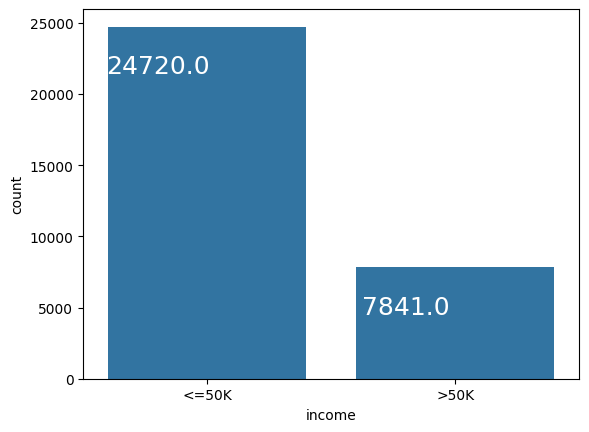

In [ ]:
#TODO
ax=sns.countplot(data=df_train, x='income');
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)

### Exploring Education Level Distribution


Now, let's check the distribution of education levels in the dataset. This gives us insight into the average persona or demographic represented in the data

---
Answer the following questions:
- What is the most earned degree among participants?
- Is there a connection between education level and income?


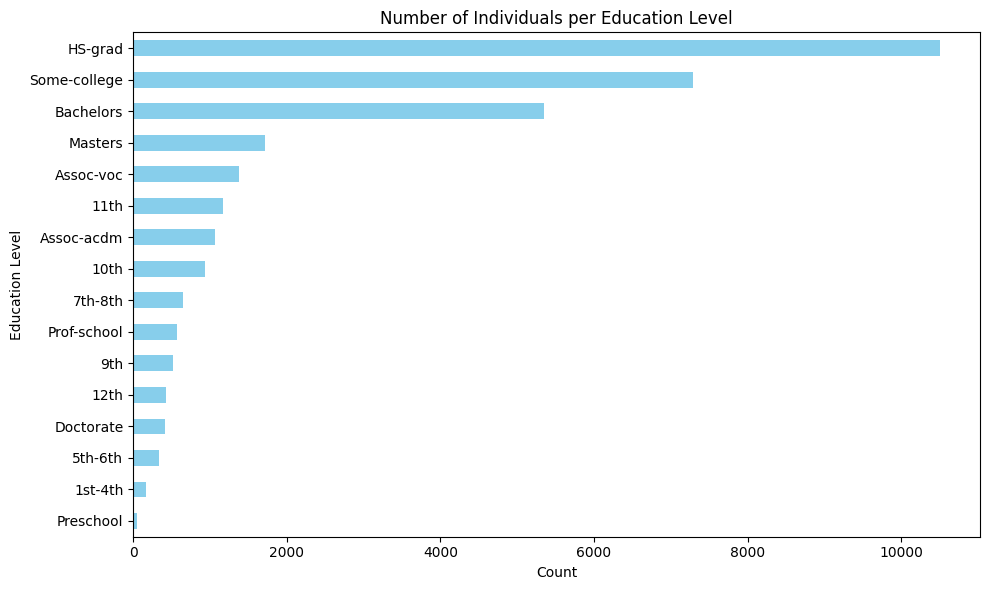

In [ ]:
#TODO
plt.figure(figsize=(10, 6))
df_train["education"].value_counts().sort_values().plot(kind="barh", color="skyblue")
plt.title("Number of Individuals per Education Level")
plt.xlabel("Count")
plt.ylabel("Education Level")
plt.tight_layout()
plt.show()

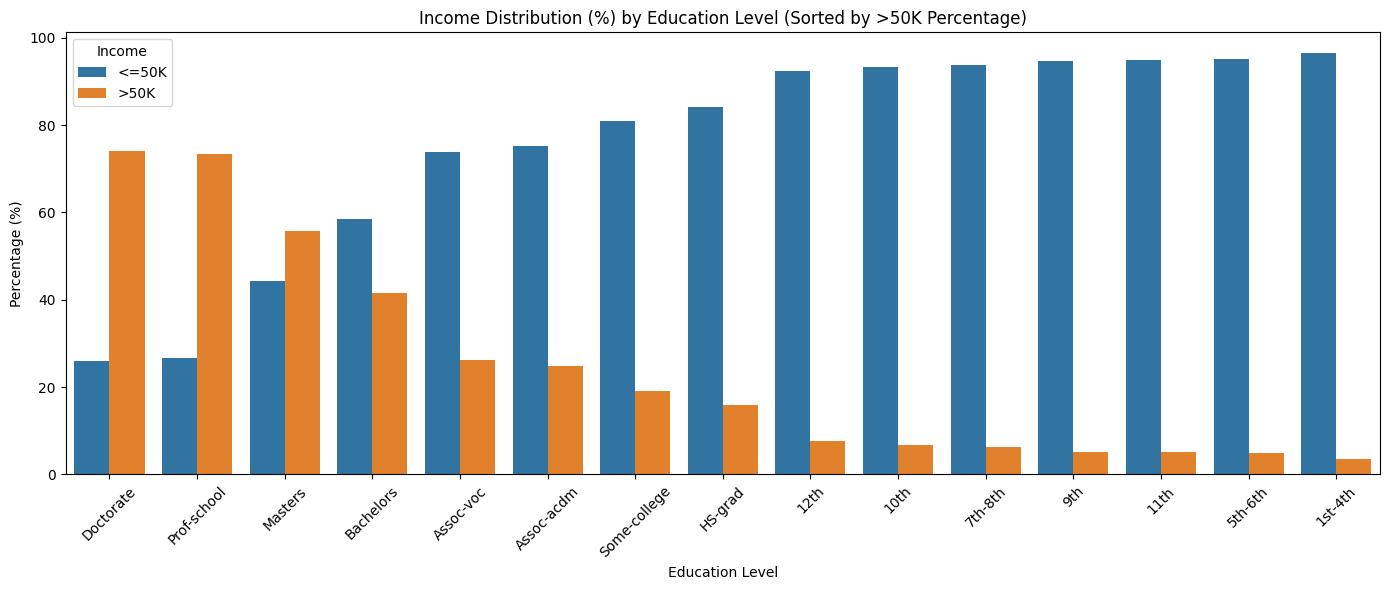

In [ ]:
edu_income_counts = df_train.groupby(['education', 'income']).size().reset_index(name='count')

edu_totals = df_train['education'].value_counts().to_dict()

edu_income_counts['percentage'] = edu_income_counts.apply(
    lambda row: row['count'] / edu_totals[row['education']] * 100, axis=1)

over_50k = edu_income_counts[edu_income_counts['income'] == '>50K']
sorted_edu = over_50k.sort_values(by='percentage', ascending=False)['education'].tolist()

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=edu_income_counts, x='education', y='percentage', hue='income', order=sorted_edu)
plt.xticks(rotation=45)
plt.title('Income Distribution (%) by Education Level (Sorted by >50K Percentage)')
plt.xlabel('Education Level')
plt.ylabel('Percentage (%)')
plt.legend(title='Income')
plt.tight_layout()
plt.show()

<p align="justify">
<font size=4>
<b> <font color='red'>Your Answer: </font></b><br>
<font color='white'>Question 1: The most earned degree among participants is HS-grad </font><br>
<font color='white'>Question 2: Three education levels of Doctorate, Prof-school ,and Master's have the biggest percentage of >50K income so as the education level gets higher the >50K income percentage also gets higher  </font><br>
</p>
</font>
<hr>

### Exploring the Relationship Between Nationality and Income

Exploring the income distribution across different nationalities reveals trends in earnings. This analysis can highlight which nationalities are more likely to earn higher income, providing insights into the potential socio-economic factors associated with nationality in the dataset

---

Tasks:
- Plot Nationality Distribution
- Compare Nationality vs. Income
- Identify Dominant Nationality with Highest Income Proportion

#### Task 1: Plot Nationality Distribution

Visualize the distribution of nationalities in the dataset to understand the representation of individuals from different countries. This will help in assessing the relative population of each nationality before comparing their income distributions

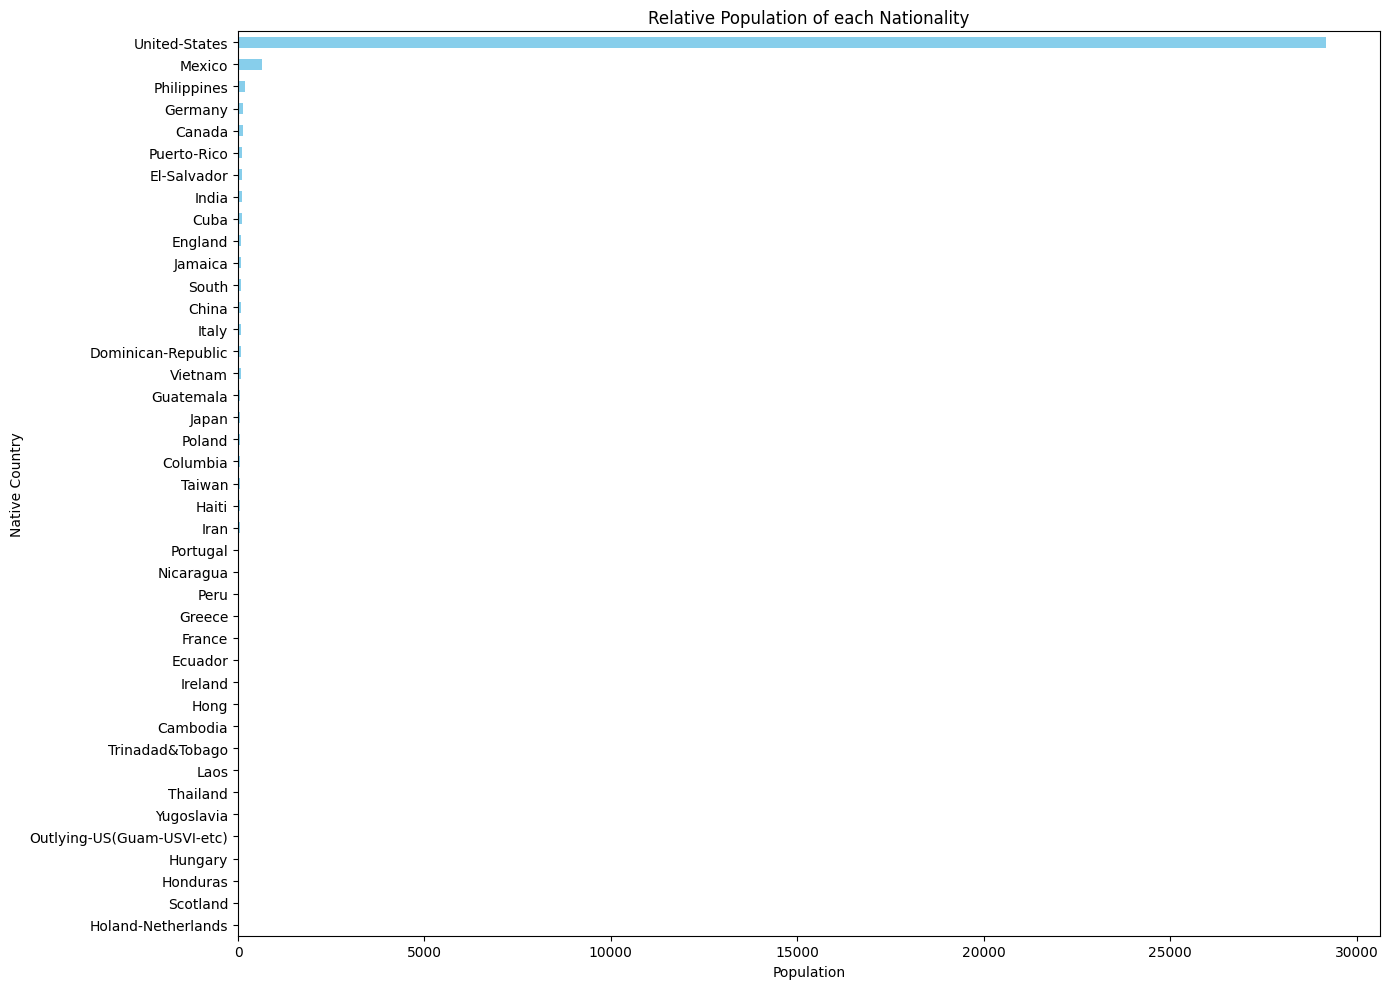

In [ ]:
#TODO
plt.figure(figsize=(14, 10))
df_train["native-country"].value_counts().sort_values().plot(kind="barh", color="skyblue")
plt.title("Relative Population of each Nationality")
plt.xlabel("Population")
plt.ylabel("Native Country")
plt.tight_layout()
plt.show()

#### Task 2: Compare Nationality vs. Income

Compare the income levels (`<=50K` and `>50K`) across different nationalities. This analysis will show how income distribution varies by nationality, helping to identify trends in income disparity among different nationalities.

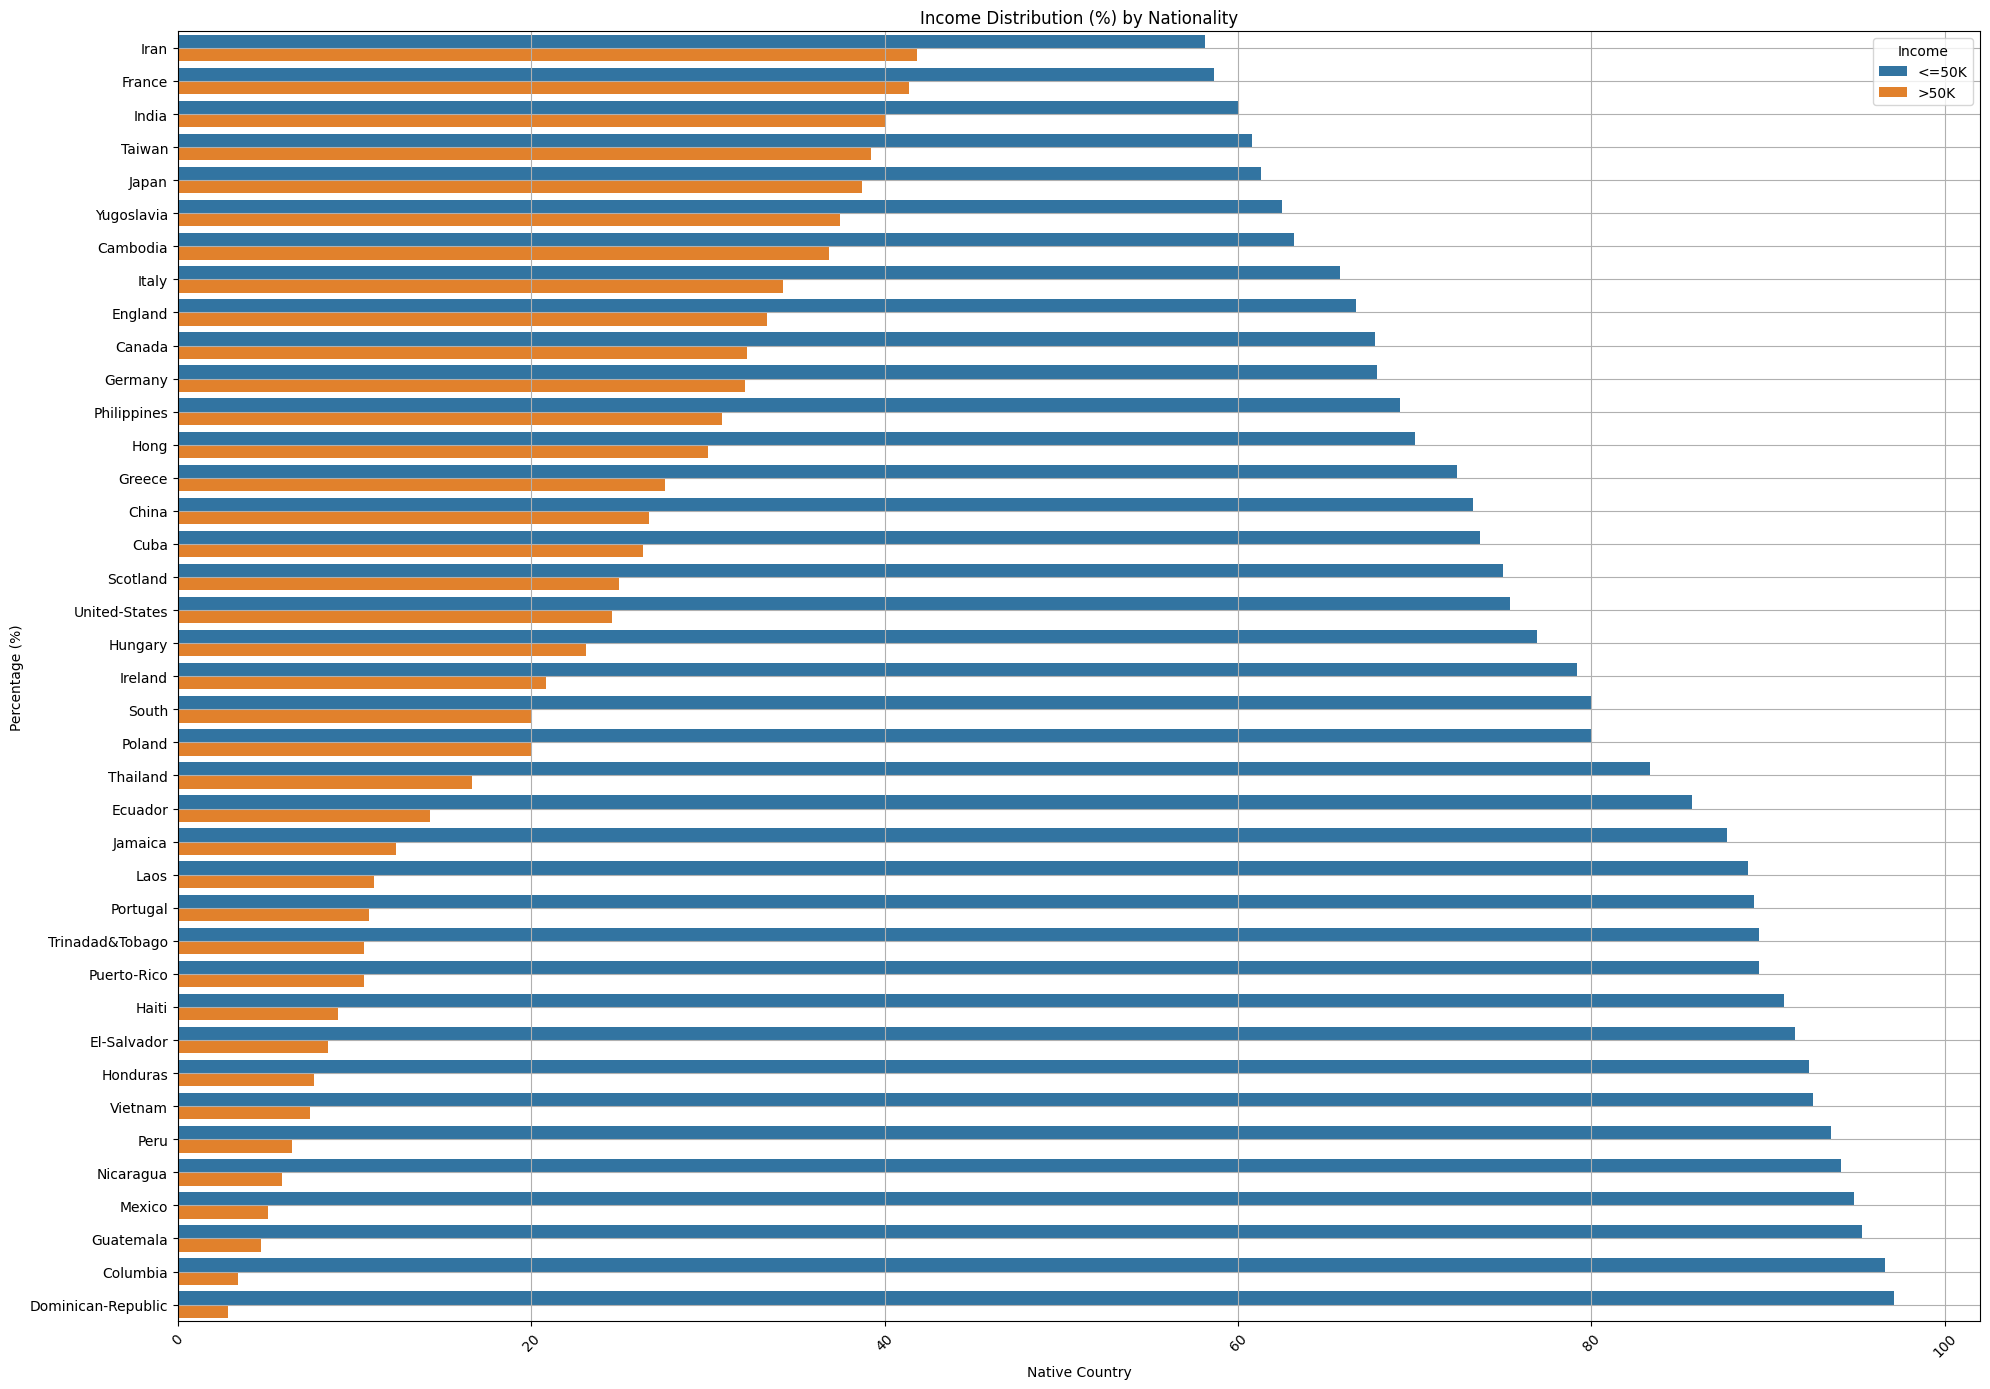

In [ ]:
#TODO
# Group by native-country and income
country_income = df_train.groupby(['native-country', 'income']).size().reset_index(name='count')

# Calculate total per country
country_totals = df_train['native-country'].value_counts().to_dict()
country_income['percentage'] = country_income.apply(
    lambda row: row['count'] / country_totals[row['native-country']] * 100, axis=1)


# Sort by >50K percentage
sorted_countries = (
    country_income[country_income['income'] == '>50K']
    .sort_values(by='percentage', ascending=False)['native-country']
    .tolist()
)

# Step 3: Plot
plt.figure(figsize=(20, 14))
sns.barplot(data=country_income, x='percentage', y='native-country', hue='income', order=sorted_countries)
plt.xticks(rotation=45)
plt.title('Income Distribution (%) by Nationality')
plt.xlabel('Native Country')
plt.ylabel('Percentage (%)')
plt.legend(title='Income')
plt.tight_layout()
plt.grid(True)
plt.show()

Filter out the dominant nationality (the one with the highest population proportion) and perform the analysis on the remaining nationalities. This will help focus on the income distribution across nationalities excluding the one with the most significant representation, offering a more nuanced view of the income distribution among less-represented nationalities.

---
Answer Following Question:
- Which nationality is the second most populous in America, and what is their income distribution? What factors might explain these income patterns?

Second most populous nationality: Mexico


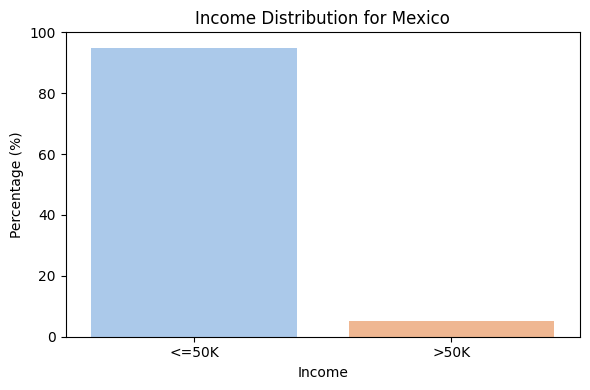

In [ ]:
#TODO
#  Count samples per nationality
country_counts = df_train['native-country'].value_counts()

# Get the 2nd most populous nationality
second_country = country_counts.index[1]
print("Second most populous nationality:", second_country)

# Filter data for that nationality
second_country_data = df_train[df_train['native-country'] == second_country]

# Count income distribution
income_dist = second_country_data['income'].value_counts(normalize=True) * 100

# Step 5: Plot income distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=income_dist.index, y=income_dist.values, palette="pastel")
plt.title(f"Income Distribution for {second_country}")
plt.ylabel("Percentage (%)")
plt.xlabel("Income")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


<p align="justify">
<font size=4>
<b> <font color='red'>Your Answer:</font></b><br>
Based on the ploted Bar , Mexico is the second most populous in America and its Income distribution shows that about 90% of its population earn <= 50K.
Factors like nationality, working hours end education can explain this income pattern

</p>
</font>
<hr>

#### Task 3: Identify Dominant Nationality with Highest Income Proportion

Identify the nationality with the highest proportion of individuals earning more than 50K. This analysis helps highlight nationalities that are more likely to achieve higher earnings, providing insight into socio-economic patterns

---

Answer the folloiwng Question:
- What is the nationality with the highest proportion of individuals earning more than 50K? can you explian that?

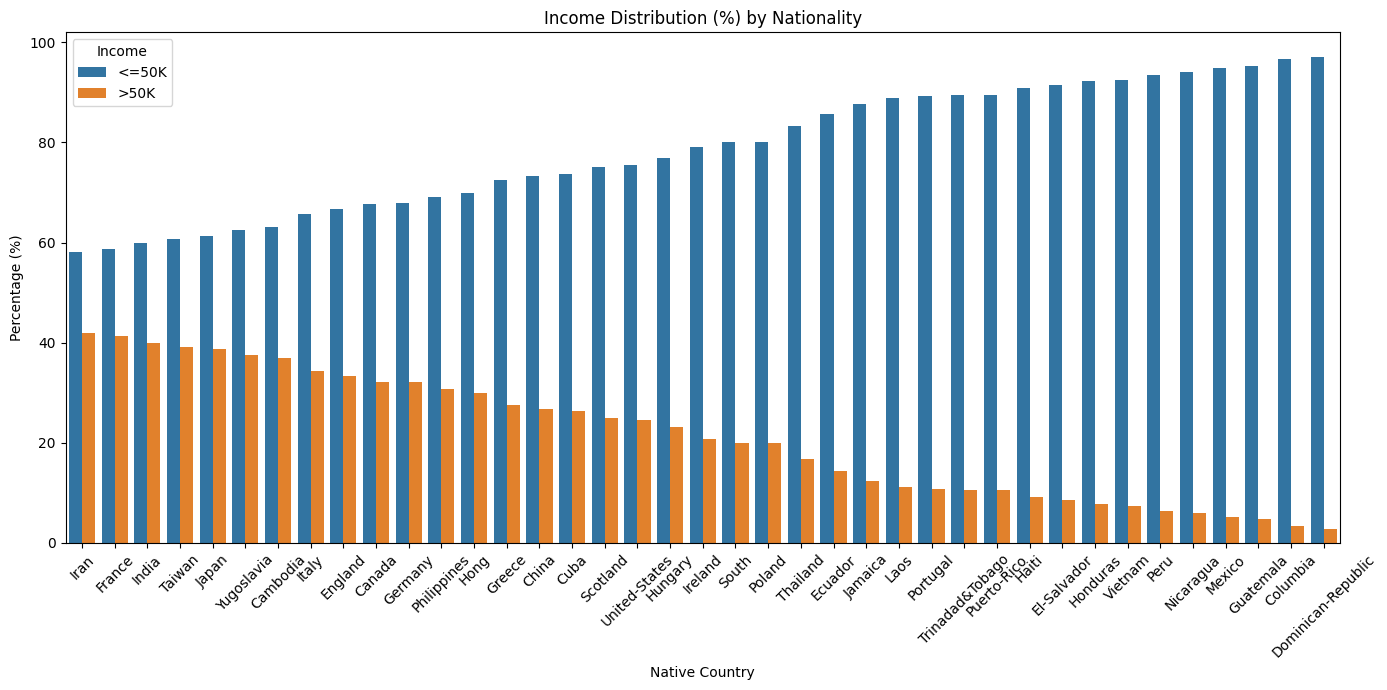

In [ ]:
#TODO
# Group by native-country and income
country_income = df_train.groupby(['native-country', 'income']).size().reset_index(name='count')

# Calculate total per country
country_totals = df_train['native-country'].value_counts().to_dict()
country_income['percentage'] = country_income.apply(
    lambda row: row['count'] / country_totals[row['native-country']] * 100, axis=1)



# Sort by >50K percentage
sorted_countries = (
    country_income[country_income['income'] == '>50K']
    .sort_values(by='percentage', ascending=False)['native-country']
    .tolist()
)

# Step 3: Plot
plt.figure(figsize=(14, 7))
sns.barplot(data=country_income, x='native-country', y='percentage', hue='income', order=sorted_countries)
plt.xticks(rotation=45)
plt.title('Income Distribution (%) by Nationality')
plt.xlabel('Native Country')
plt.ylabel('Percentage (%)')
plt.legend(title='Income')
plt.tight_layout()
plt.show()



<p align="justify">
<font size=4>
<b> <font color='red'>Your Answer:</font></b><br>
<b> <font color='white'>Iran has the highest proportion of individuals earning more than 50K (around 42% of its population)</font></b><br>

</p>
</font>
<hr>

### Exploring Hours per Week Distribution

#### Task 1: Plot hours-per-week distribution
Plot KDE and histogram of hours-per-week and determine typical work hours.


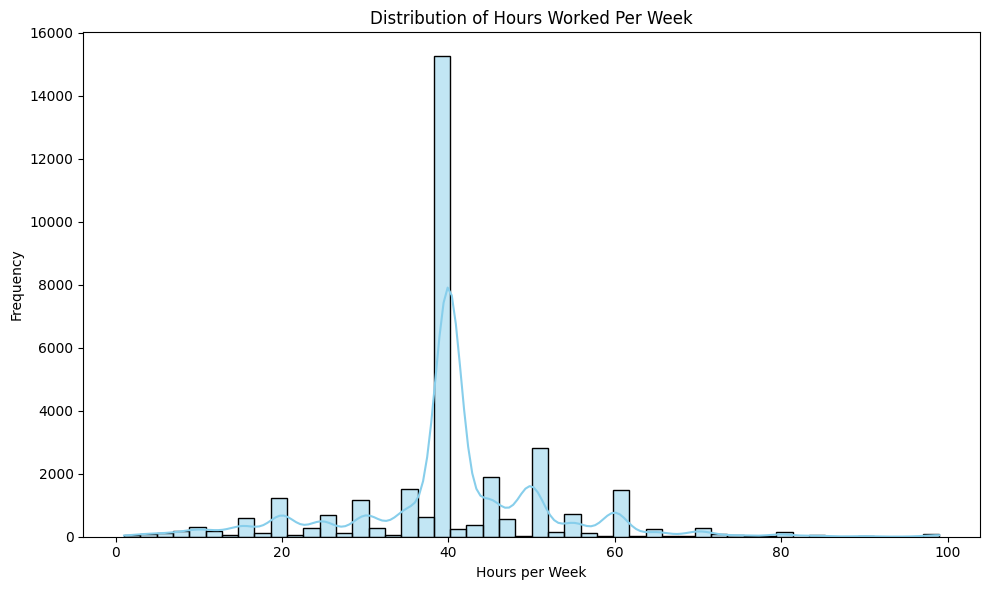

In [ ]:
#TODO
plt.figure(figsize=(10, 6))
sns.histplot(df_train['hours-per-week'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Hours Worked Per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

<p align="justify">
<font size=4>
<b> <font color='orange'>As we see the typical work hours is about 40 hours per week</font></b><br>

</p>
</font>
<hr>

### Exploring the Relationship Between Sex and Income

#### Task 1: Plot and Compare Sex in the Dataset

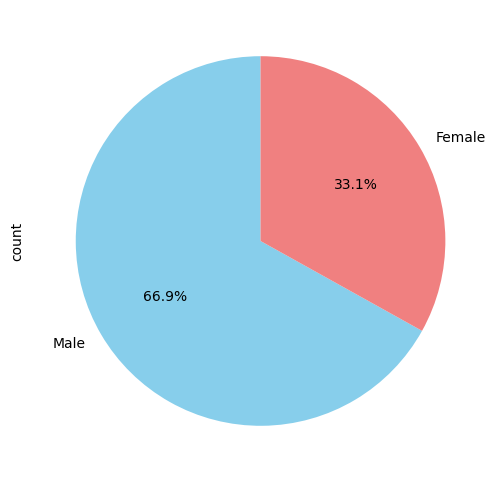

In [ ]:
#TODO
plt.figure(figsize=(6, 6))
df_train['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.show()

#### Task 2: Plot and Compare Income by Gender

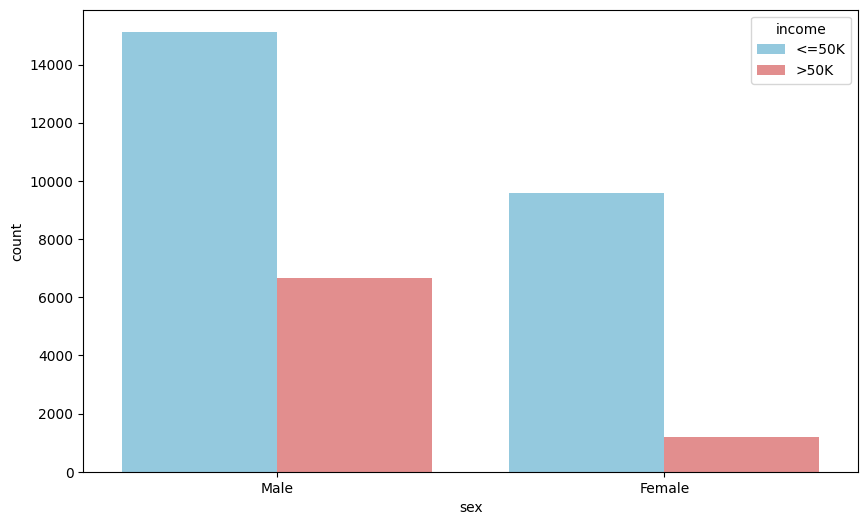

In [ ]:
#TODO
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='sex', hue='income', palette=['skyblue', 'lightcoral']);

### Exploring Relationship between Age and Income

#### Task 1: Visualize the Distribution of Age vs. Income using violinplot

Answer the following questions:

- What patterns can be observed in the age group with income above 50k?

- Is it common for younger individuals to have an income above 50k?

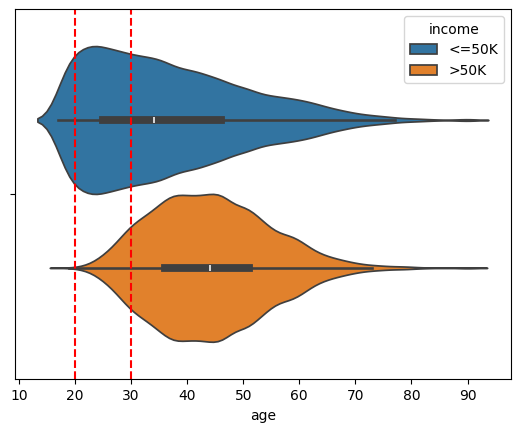

In [ ]:
#TODO
sns.violinplot(data=df_train, x='age', hue='income')
plt.axvline(x=20, color='red', linestyle='--')  # Line at age 20
plt.axvline(x=30, color='red', linestyle='--')  # Line at age 30
plt.show()

<p align="justify">
<font size=4>
<b> <font color='red'>Your Answer:</font></b><br>
<b> <font color='orange'>Patterns in the age group with income above 50k:
</font></b><br>


1.   **Higher Density in Middle Age**: The violin plot for the '>50K' income group shows a higher density (wider section) between the ages of approximately 35 and 50. This suggests that individuals in this age range are more likely to have an income above 50k.
2.   **Decreasing Density with Older Age**: As age increases beyond 50, the density of the violin plot for '>50K' income gradually decreases. This indicates that while individuals above 50 can still earn above 50k, the likelihood decreases with increasing age.
3. **Median Age**: The median age (white dot) for the '>50K' income group appears to be around 45. This further supports the observation that middle-aged individuals are more likely to earn above 50k.

<p align="justify">
<font size=4>
<b> <font color='orange'>Is it common for younger individuals to have an income above 50k?
</font></b><br>

Based on the violin plot, it is less common for younger individuals to have an income above 50k.
Here's why:
1.   **Lower Density in Younger Age**: The violin plot for the '>50K' income group is relatively narrow for individuals below 30. This indicates a lower density of data points, suggesting that fewer younger individuals earn above 50k.
2.   **Skewness**: The violin plot for the '>50K' income group appears to be right-skewed, meaning the tail extends more towards higher ages. This further reinforces that higher income is more prevalent among older individuals.
</font></b><br>


</p>
</font>
<hr>

#### Task 2: Visualize and Compare the Age Distribution Across Different Races using a Violin Plot

Answer the Following question:
- Which race has the highest concentration of middle-aged individuals?

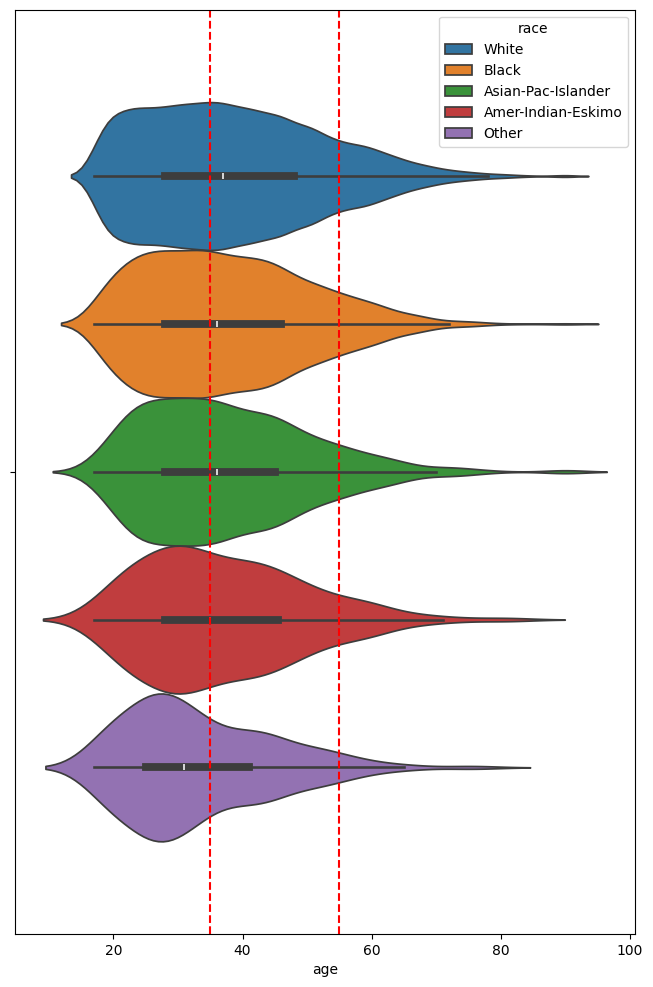

In [ ]:
#TODO
plt.figure(figsize=(8, 12))
sns.violinplot(data=df_train, x='age', hue='race')
# Add vertical lines for the middle-aged range (35-55)
plt.axvline(x=35, color='red', linestyle='--')  # Line at age 35
plt.axvline(x=55, color='red', linestyle='--')  # Line at age 55
plt.show()


<p align="justify">
<font size=4>
<b> <font color='red'>Your Answer:</font></b><br>
<b> <font color='White'>Based on the Violin plot White Race has the highest concentration of middle-aged individuals</font></b><br>

</p>
</font>
<hr>

### Exploring Relationship between Race and Income

#### Task 1: Visualize the Income Distribution Across Different Races

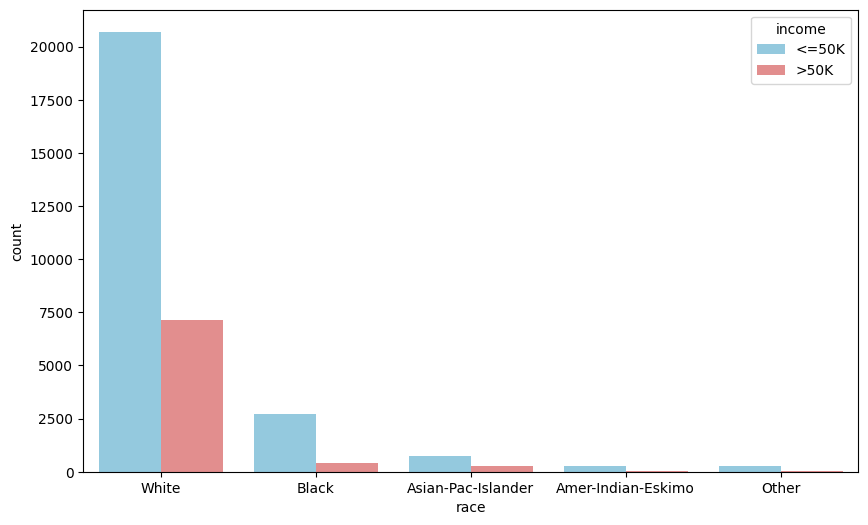

In [ ]:
#TODO
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='race', hue='income', palette=['skyblue', 'lightcoral']);

#### Task 2: Plot and Sort Races Based on the Highest Proportion of High-Income Individuals Across Races

Answer the following question:

- Which race has the highest proportion of high-income individuals?

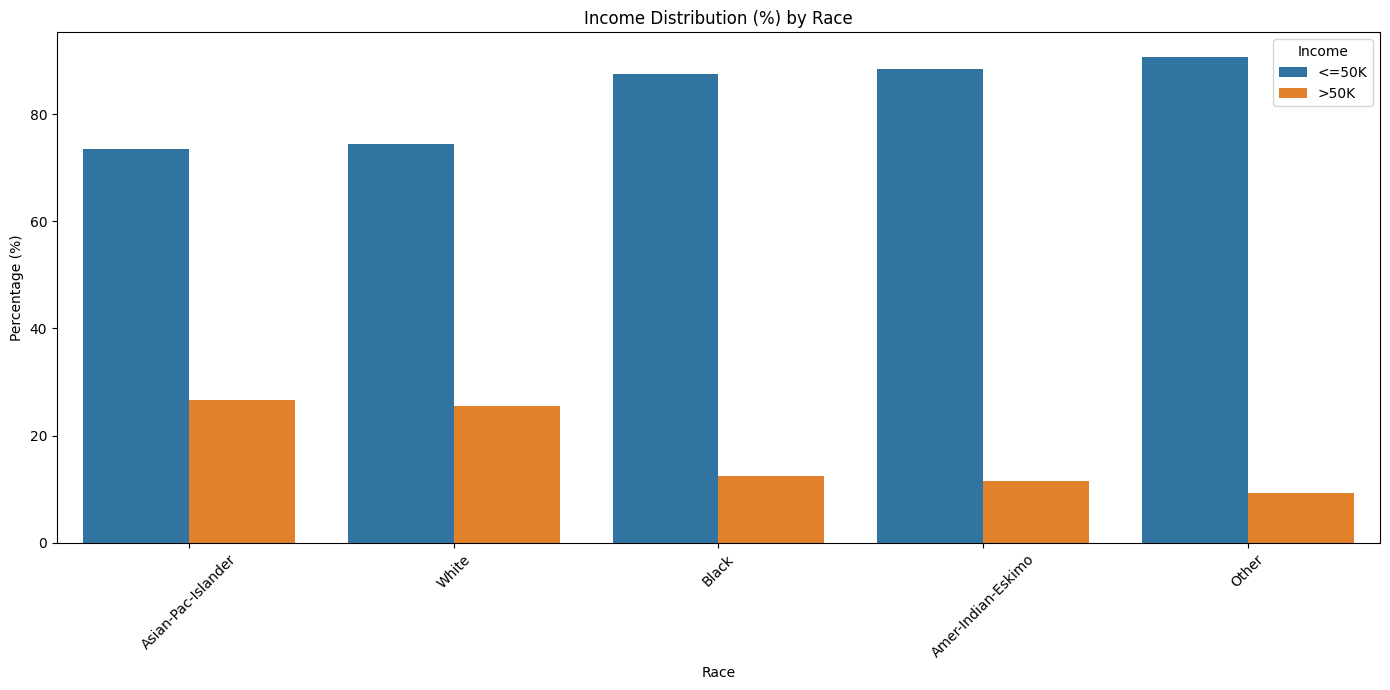

In [ ]:
#TODO
# Group by native-country and income
race_income = df_train.groupby(['race', 'income']).size().reset_index(name='count')

# Calculate total per race
race_totals = df_train['race'].value_counts().to_dict()
race_income['percentage'] = race_income.apply(
    lambda row: row['count'] / race_totals[row['race']] * 100, axis=1)

# Sort by >50K percentage
sorted_countries = (
    race_income[race_income['income'] == '>50K']
    .sort_values(by='percentage', ascending=False)['race']
    .tolist()
)

# Step 3: Plot
plt.figure(figsize=(14, 7))
sns.barplot(data=race_income, x='race', y='percentage', hue='income', order=sorted_countries)
plt.xticks(rotation=45)
plt.title('Income Distribution (%) by Race')
plt.xlabel('Race')
plt.ylabel('Percentage (%)')
plt.legend(title='Income')
plt.tight_layout()
plt.show()

<p align="justify">
<font size=4>
<b> <font color='red'>Your Answer:</font></b><br>
<b> <font color='White'>Asian-Pacific-Islander and White races have the highest proportion of high-income individuals</font></b><br>


</p>
</font>
<hr>

### Exploring the Relationship Between Marital Status and Income


- Similar to the previous sections, use various plots to explore and identify patterns between the `Relationship`, `Marital Status`, and `Income` features. You are free to choose any types of plots that you find suitable for the analysis.

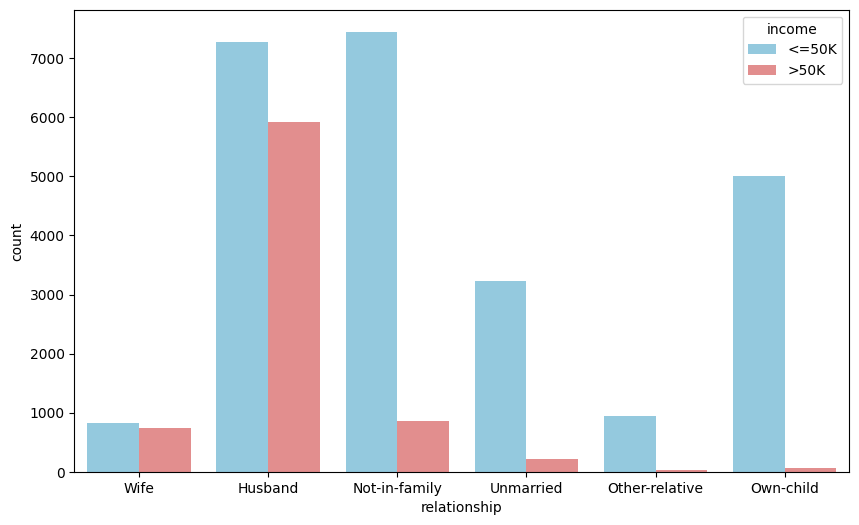

In [ ]:
# Calculate the percentage of income >50K for each relationship category
income_percentage = df_train[df_train['income'] == '>50K'].groupby('relationship').size() / df_train.groupby('relationship').size()

# Sort the relationship categories based on the percentage
sorted_relationships = income_percentage.sort_values(ascending=False).index

# Plotting the countplot with sorted relationship categories
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='relationship', hue='income', palette=['skyblue', 'lightcoral'], order=sorted_relationships)

# Show the plot
plt.show()

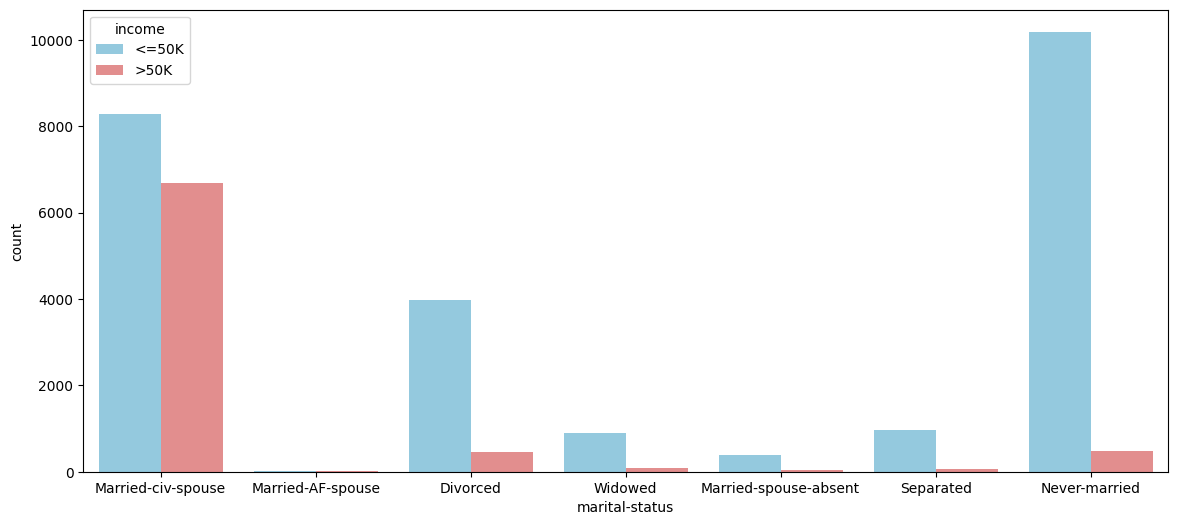

In [ ]:
# Calculate the percentage of income >50K for each marital-status category
income_percentage = df_train[df_train['income'] == '>50K'].groupby('marital-status').size() / df_train.groupby('marital-status').size()

# Sort marital-status categories based on the percentage
sorted_marital_status = income_percentage.sort_values(ascending=False).index

# Plotting the countplot with sorted marital-status
plt.figure(figsize=(14, 6))
sns.countplot(data=df_train, x='marital-status', hue='income', palette=['skyblue', 'lightcoral'], order=sorted_marital_status)

# Show the plot
plt.show()


### Exploring the Relationship Between Occupation, Workclass and Income

- Similar to the previous sections, use various plots to explore and identify patterns between the `Occupation`, `Workclass`, and `Income` features. You are free to choose any types of plots that you find suitable for the analysis.

#### Workclass

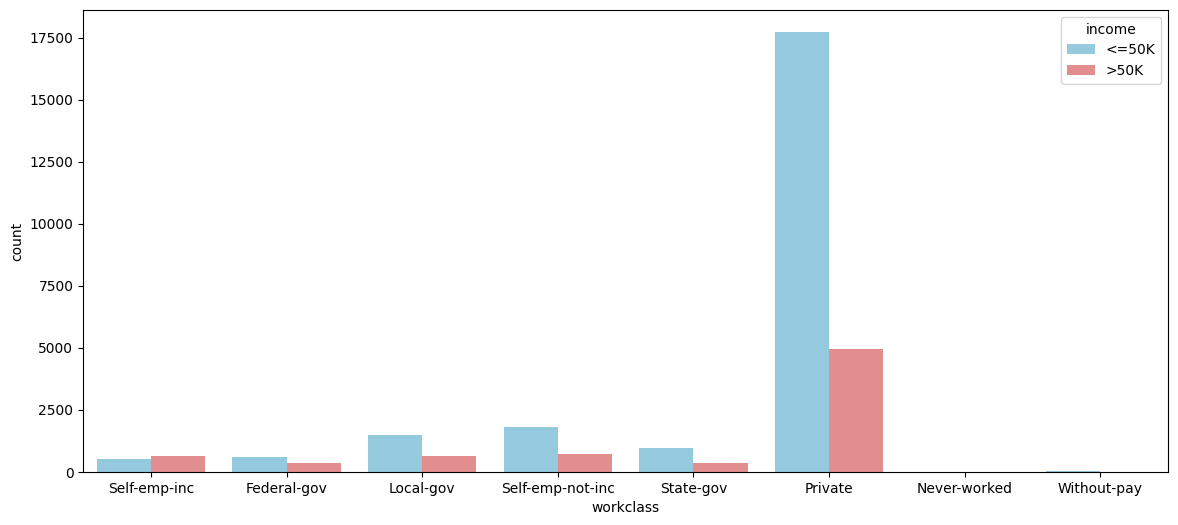

In [ ]:
# Calculate the percentage of income >50K for each workclass category
income_percentage = df_train[df_train['income'] == '>50K'].groupby('workclass').size() / df_train.groupby('workclass').size()

# Sort the workclass categories based on the percentage
sorted_workclass = income_percentage.sort_values(ascending=False).index

# Plotting the countplot with sorted workclass categories
plt.figure(figsize=(14, 6))
sns.countplot(data=df_train, x='workclass', hue='income', palette=['skyblue', 'lightcoral'], order=sorted_workclass)

# Show the plot
plt.show()

#### Occupation

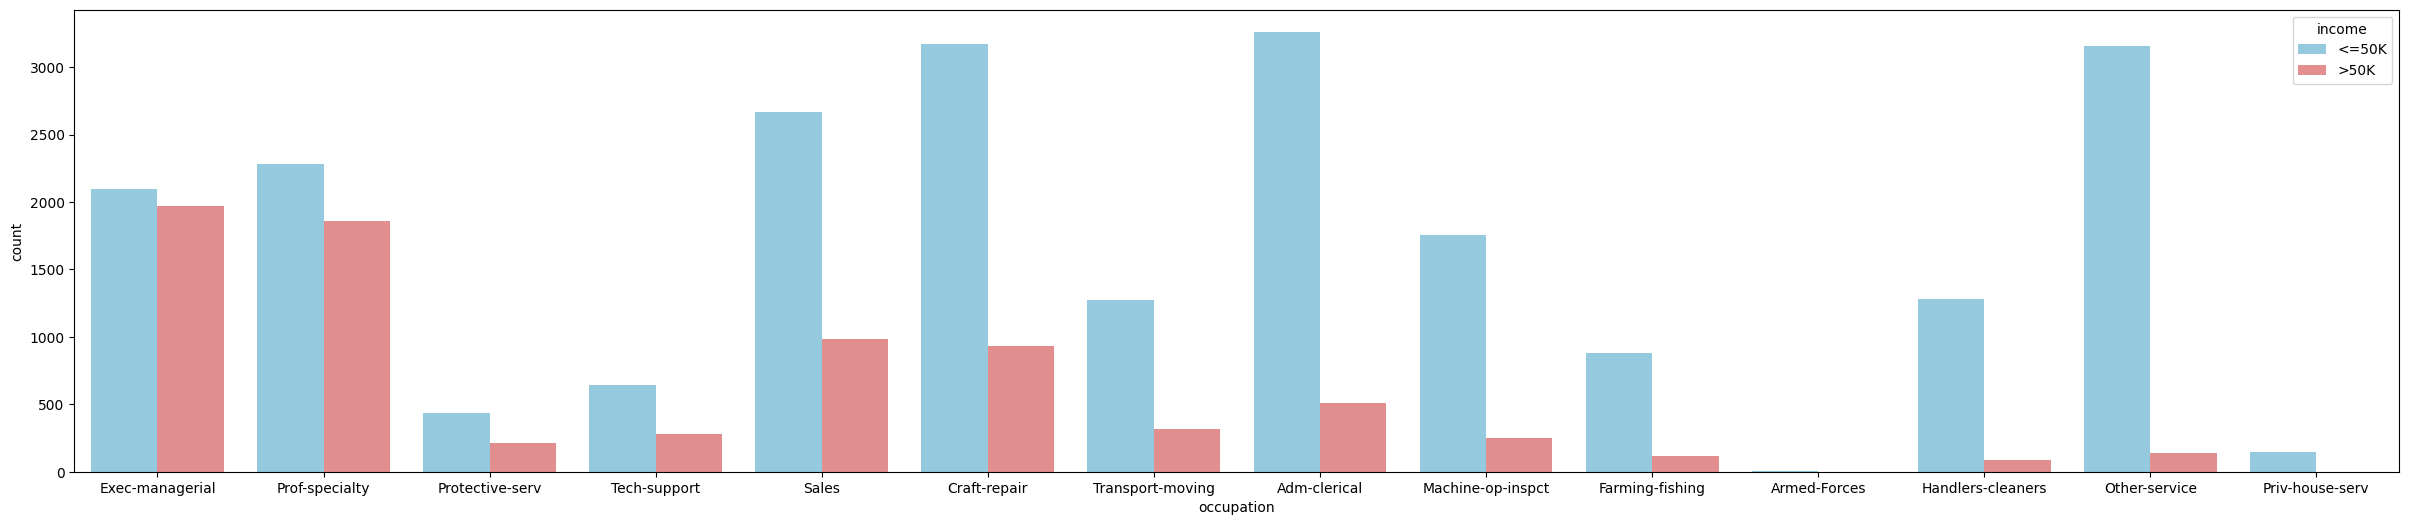

In [ ]:
# Calculate the percentage of income >50K for each occupation category
income_percentage = df_train[df_train['income'] == '>50K'].groupby('occupation').size() / df_train.groupby('occupation').size()

# Sort the occupation categories based on the percentage
sorted_occupation = income_percentage.sort_values(ascending=False).index

# Plotting the countplot with sorted occupation categories
plt.figure(figsize=(30, 6))
sns.countplot(data=df_train, x='occupation', hue='income', palette=['skyblue', 'lightcoral'], order=sorted_occupation)

# Show the plot
plt.show()

### Describing the Final Persona

Based on the insights from the previous sections, describe a persona that has a high likelihood of earning above 50k in a year. Consider factors such as age, race, marital status, and relationship status to outline the characteristics of this individual.

<p align="justify">
<font size=4>
<b> <font color='red'>Your Answer:</font></b><br>
A person with the characteristics below has a high chance of earning above 50k in a year :

Age: Middle-aged person (40-50)

Degree level: Doctorate

Native country: Iran

race: Asian-Pac-Islander

Martial Status: married-civ-spouse

Work Class: Self-emp-inc

Sex: Male

Relationship: Wife or Husband

Occupation : Exec-managerial

</p>
</font>
<hr>

# Step 4: Handle Missing Values


There are several ways to deal with missing values. Below are some common strategies:

### Missing Value Strategies

#### For **numerical features**:
- `Drop rows` that have missing values
- `Fill with mean`
- `Fill with median`
- `Use KNN or regression imputation`

#### For **categorical features**:
- `Drop rows` with missing categories
- `Fill with the most frequent value` (mode)
- `Fill with a new category` like "Unknown"
- `Use model-based imputation`

---

 **Task**:  
1. **Which method(s) do you think are best for this dataset?**  
2. **Why?** Consider the number of missing values, the type of features, and how it may affect modeling.  
3. Implement your chosen strategy below.


In [ ]:
# Filter columns with missing values percentage greater than 0
missing_columns_percntages = pd.DataFrame(df_train.isnull().sum() / len(df_train) * 100).sort_values(by=0,ascending=False)
missing_columns_percntages[missing_columns_percntages[0] > 0]

0
occupation      5.660146
workclass       5.638647
native-country  1.790486

In [ ]:
missing_coulmns_list = missing_columns_percntages[missing_columns_percntages[0] > 0].index.to_list()
missing_coulmns_list

['occupation', 'workclass', 'native-country']

In [ ]:
# Printing the type of missing values columns
for column in missing_coulmns_list:
  print(df_train[column].describe().dtype)

object
object
object


<p align="justify">
<font size=4>
<b> <font color='Orange'>All missing values are in categorical features.</font></b><br>

</p>
</font>
<hr>



In [ ]:
for column in missing_coulmns_list:
  print(df_train[column].value_counts())
  print("-----------------------------------")

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64
-----------------------------------
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
-----------------------------------
native-country
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India           

In [ ]:
most_frequent_occupation =  df_train['occupation'].mode()[0]
most_frequent_workclass =  df_train['workclass'].mode()[0]
most_frequent_native_country =  df_train['native-country'].mode()[0]

print(most_frequent_occupation)
print(most_frequent_workclass)
print(most_frequent_native_country)

Prof-specialty
Private
United-States


In [ ]:
# Fill the null values of occupation , workclass and native_country columns  with a new category like "Missing"
df_train['occupation'] = df_train['occupation'].fillna('Missing')
df_train['workclass'] = df_train['workclass'].fillna('Missing')
df_train['native-country'] = df_train['native-country'].fillna('Missing')

In [ ]:
df_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [ ]:
df_test.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [ ]:
df_test['occupation'] = df_test['occupation'].fillna('Missing')
df_test['workclass'] = df_test['workclass'].fillna('Missing')
df_test['native-country'] = df_test['native-country'].fillna('Missing')

In [ ]:
df_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

<p align="justify">
<font size=4>
<b> <font color='red'>Your Answer:</font></b><br>
<b> <font color='White'>I Impute the null values with a new category name like "Missing" because all three occupation , workclass , native-country columns are categorical and replacing missing values with a new label like "Missing" allows the model to learn if the absence itself is predictive and since occupation and workclass have >5% missing, filling them with mode could distort the feature distribution</font></b><br>


</p>
</font>
<hr>

# Step 7: Identify Categorical Features


Most machine learning models require numerical input. We must convert **categorical columns** to numbers.

There are several encoding methods. Each method has strengths and weaknesses depending on the dataset and the type of model you're using.

---

### Common Encoding Techniques

1. **One-Hot Encoding**  
2. **Label Encoding**  
3. **Frequency Encoding**  
4. **Target / Mean Encoding**  
5. **Binary Encoding**  
6. **Hash Encoding**

---

 **Your Task**:

1. Research the methods above (or based on what we've discussed in class).
2. For each method, briefly write down:
   - When you might use it
   - Its potential pros and cons
3. Choose the one(s) you think work best for this dataset.
4. Explain **why** your choice is appropriate.
5. Implement your encoding method(s) in the code cell below.




In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
cat_cols = df_train.select_dtypes(include='object').columns.tolist()
num_cols = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(cat_cols)
print(num_cols)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [ ]:
for column in df_train.columns:
  column_type = df_train[column].describe().dtype
  if column_type == 'object':
    print(column + ":")
    cardinallity = df_train[column].value_counts().index.to_list()
    print(cardinallity)
    print("Cardinality : " + str(len(cardinallity)))
    print()


workclass:
['Private', 'Self-emp-not-inc', 'Local-gov', 'Missing', 'State-gov', 'Self-emp-inc', 'Federal-gov', 'Without-pay', 'Never-worked']
Cardinality : 9

education:
['HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Assoc-voc', '11th', 'Assoc-acdm', '10th', '7th-8th', 'Prof-school', '9th', '12th', 'Doctorate', '5th-6th', '1st-4th', 'Preschool']
Cardinality : 16

marital-status:
['Married-civ-spouse', 'Never-married', 'Divorced', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse']
Cardinality : 7

occupation:
['Prof-specialty', 'Craft-repair', 'Exec-managerial', 'Adm-clerical', 'Sales', 'Other-service', 'Machine-op-inspct', 'Missing', 'Transport-moving', 'Handlers-cleaners', 'Farming-fishing', 'Tech-support', 'Protective-serv', 'Priv-house-serv', 'Armed-Forces']
Cardinality : 15

relationship:
['Husband', 'Not-in-family', 'Own-child', 'Unmarried', 'Wife', 'Other-relative']
Cardinality : 6

race:
['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Oth

In [ ]:
# TODO: Encode categorical columns using the method you chose
# Train set
from sklearn.preprocessing import LabelEncoder

# 1. Binary columns (Binary Encoding)
df_train['sex'] = df_train['sex'].map({'Male': 1, 'Female': 0})
df_train['income'] = df_train['income'].map({'<=50K': 0, '>50K': 1})

# 2. low-cardinality columns (One-hot Encoding)
df_train = pd.get_dummies(df_train, columns=[
    'workclass', 'marital-status', 'relationship', 'race'
], drop_first=True)

# 3. Label Encoding education column
edu_order = [
    'Preschool', '1st-4th', '5th-6th', '7th-8th', '9th',
    '10th', '11th', '12th', 'HS-grad', 'Some-college',
    'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters',
    'Prof-school', 'Doctorate']
df_train['education'] = df_train['education'].apply(lambda x: edu_order.index(x))

# 4. Label encode for medium-high cardinality columns
le_occ = LabelEncoder()
df_train['occupation'] = le_occ.fit_transform(df_train['occupation'])

le_country = LabelEncoder()
df_train['native-country'] = le_country.fit_transform(df_train['native-country'])


In [ ]:
# 1. Binary columns (Binary Encoding)
# Test set
df_test['sex'] = df_test['sex'].map({'Male': 1, 'Female': 0})
df_test['income'] = df_test['income'].map({'<=50K': 0, '>50K': 1})

# 2. low-cardinality columns (One-hot Encoding)
df_test = pd.get_dummies(df_test, columns=[
    'workclass', 'marital-status', 'relationship', 'race'
], drop_first=True)

# Align columns with training set (in case test set misses some dummies)
df_test = df_test.reindex(columns=df_train.columns, fill_value=0)

# 3. Label Encoding education column
edu_order = [
    'Preschool', '1st-4th', '5th-6th', '7th-8th', '9th',
    '10th', '11th', '12th', 'HS-grad', 'Some-college',
    'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters',
    'Prof-school', 'Doctorate']
df_test['education'] = df_test['education'].apply(lambda x: edu_order.index(x))

# 4. Label encode for medium-high cardinality columns
df_test['occupation'] = le_occ.transform(df_test['occupation'])
df_test['native-country'] = le_country.transform(df_test['native-country'])

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 34 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   age                                   32561 non-null  int64
 1   fnlwgt                                32561 non-null  int64
 2   education                             32561 non-null  int64
 3   education-num                         32561 non-null  int64
 4   occupation                            32561 non-null  int64
 5   sex                                   32561 non-null  int64
 6   capital-gain                          32561 non-null  int64
 7   capital-loss                          32561 non-null  int64
 8   hours-per-week                        32561 non-null  int64
 9   native-country                        32561 non-null  int64
 10  income                                32561 non-null  int64
 11  workclass_Local-gov                   325

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 34 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   age                                   16281 non-null  int64
 1   fnlwgt                                16281 non-null  int64
 2   education                             16281 non-null  int64
 3   education-num                         16281 non-null  int64
 4   occupation                            16281 non-null  int64
 5   sex                                   16281 non-null  int64
 6   capital-gain                          16281 non-null  int64
 7   capital-loss                          16281 non-null  int64
 8   hours-per-week                        16281 non-null  int64
 9   native-country                        16281 non-null  int64
 10  income                                16281 non-null  int64
 11  workclass_Local-gov                   162

#### Research the methods above

1. **One-Hot Encoding** : This method creates a new binary column for each unique category in a feature and only one of the columns is marked as "1" for each observation, the rest are "0". It also preserves all category information without imposing any order However, it can greatly increase the number of features if categories are numerou

📌 When to use:

* When the number of unique categories is small.

* Especially good for tree-based models (Random Forest, XGBoost).

✅ Pros:

* Doesn’t assume any order in categories.

* Preserves category independence.

❌ Cons:

* Increases dimensionality (many new columns).

* Not suitable when the column has many unique values (e.g., 50+ countries).

------------------------------------------------------------

2. **Label Encoding** : Each category is converted to a unique integer value.

📌 When to use:

* When categories have a natural order (e.g., low < medium < high).

* Acceptable for tree-based models even without order.

✅ Pros:

* Simple and efficient (just one column).

* Works well with tree-based models that don't rely on numeric distances.

❌ Cons:

* Implies an artificial order if not careful (bad for linear models).

* Can confuse distance-based models like KNN or SVM.

------------------------------------------------------------

3. **Frequency Encoding** : Replaces each category with its frequency (number of occurrences in the dataset).

📌 When to use:

* When you want to keep encoding compact and capture category importance.

* Works with both tree and linear models.

✅ Pros:

* Compact (single column).

* Captures some useful information (popularity of a category).

❌ Cons:

* Loses individual category identity.

* Can lead to overfitting if categories leak information.

------------------------------------------------------------

4. **Target / Mean Encoding** : Each category is replaced with the mean value of the target variable for that category.

📌 When to use:

* When you have a target variable (like income level).

* Works well with high-cardinality features.

✅ Pros:

* Can improve performance by encoding category impact directly.

❌ Cons:

* Risk of target leakage if not done with cross-validation.

* Can overfit if dataset is small or imbalanced.

------------------------------------------------------------

5. **Binary Encoding** : Categories are label encoded into integers, then those integers are converted to binary format.
Each binary digit becomes a separate feature column, reducing the total number of columns.

📌 When to use:

* When the number of categories is medium to high (e.g., 15–50).

* Good alternative to One-Hot when you want to save memory.

✅ Pros:

* Low dimensionality.

* Less overfitting than target encoding.

❌ Cons:

* Hard to interpret.

* Less effective than one-hot on small cardinality columns.

------------------------------------------------------------

6. **Hash Encoding** : Each category is transformed using a hash function into a fixed number of columns.

📌 When to use:

* Very high-cardinality features (e.g., 100+ categories).

* When you don’t care about interpretability.

✅ Pros:

* Very compact and fast.

* No need to store category mapping.

❌ Cons:

* Risk of hash collisions.

* Not interpretable.

<p align="justify">
<font size=4>
<b> <font color='red'>Your Answer:</font></b><br>

| Column           | Unique Values | Best Encoding    | Why? |
|------------------|-------------------------|------------------------|------|
| `workclass`      | ~9                      | One-Hot                | Low cardinality; categories independent |
| `education`      | ~16                     | Label Encoding       | Ordered (if grouped), but One-Hot is safer |
| `marital-status` | ~7                      | One-Hot                | Clear categories; |
| `occupation`     | ~15                     | Label Encoding     | Medium cardinality; save space |
| `relationship`   | ~6                      | One-Hot                | Low cardinality |
| `race`           | ~5                      | One-Hot                | Low cardinality |
| `sex`            | 2                       | Binary (0/1)           | Simplest case |
| `native-country` | ~42                     |  Label Encoding     | High cardinality; one-hot too large |
| `income`         | 2                       | Binary (0/1)           | Target variable, already binary |


</p>
</font>
<hr>

# Step 8: Correlation Matrix (Numerical Features)

Correlation helps us understand how strongly features are related to each other.  
This is useful for:
- Detecting multicollinearity (when features are too similar)
- Spotting features that might be predictive of the target variable

We'll compute the correlation matrix and visualize it with a heatmap.


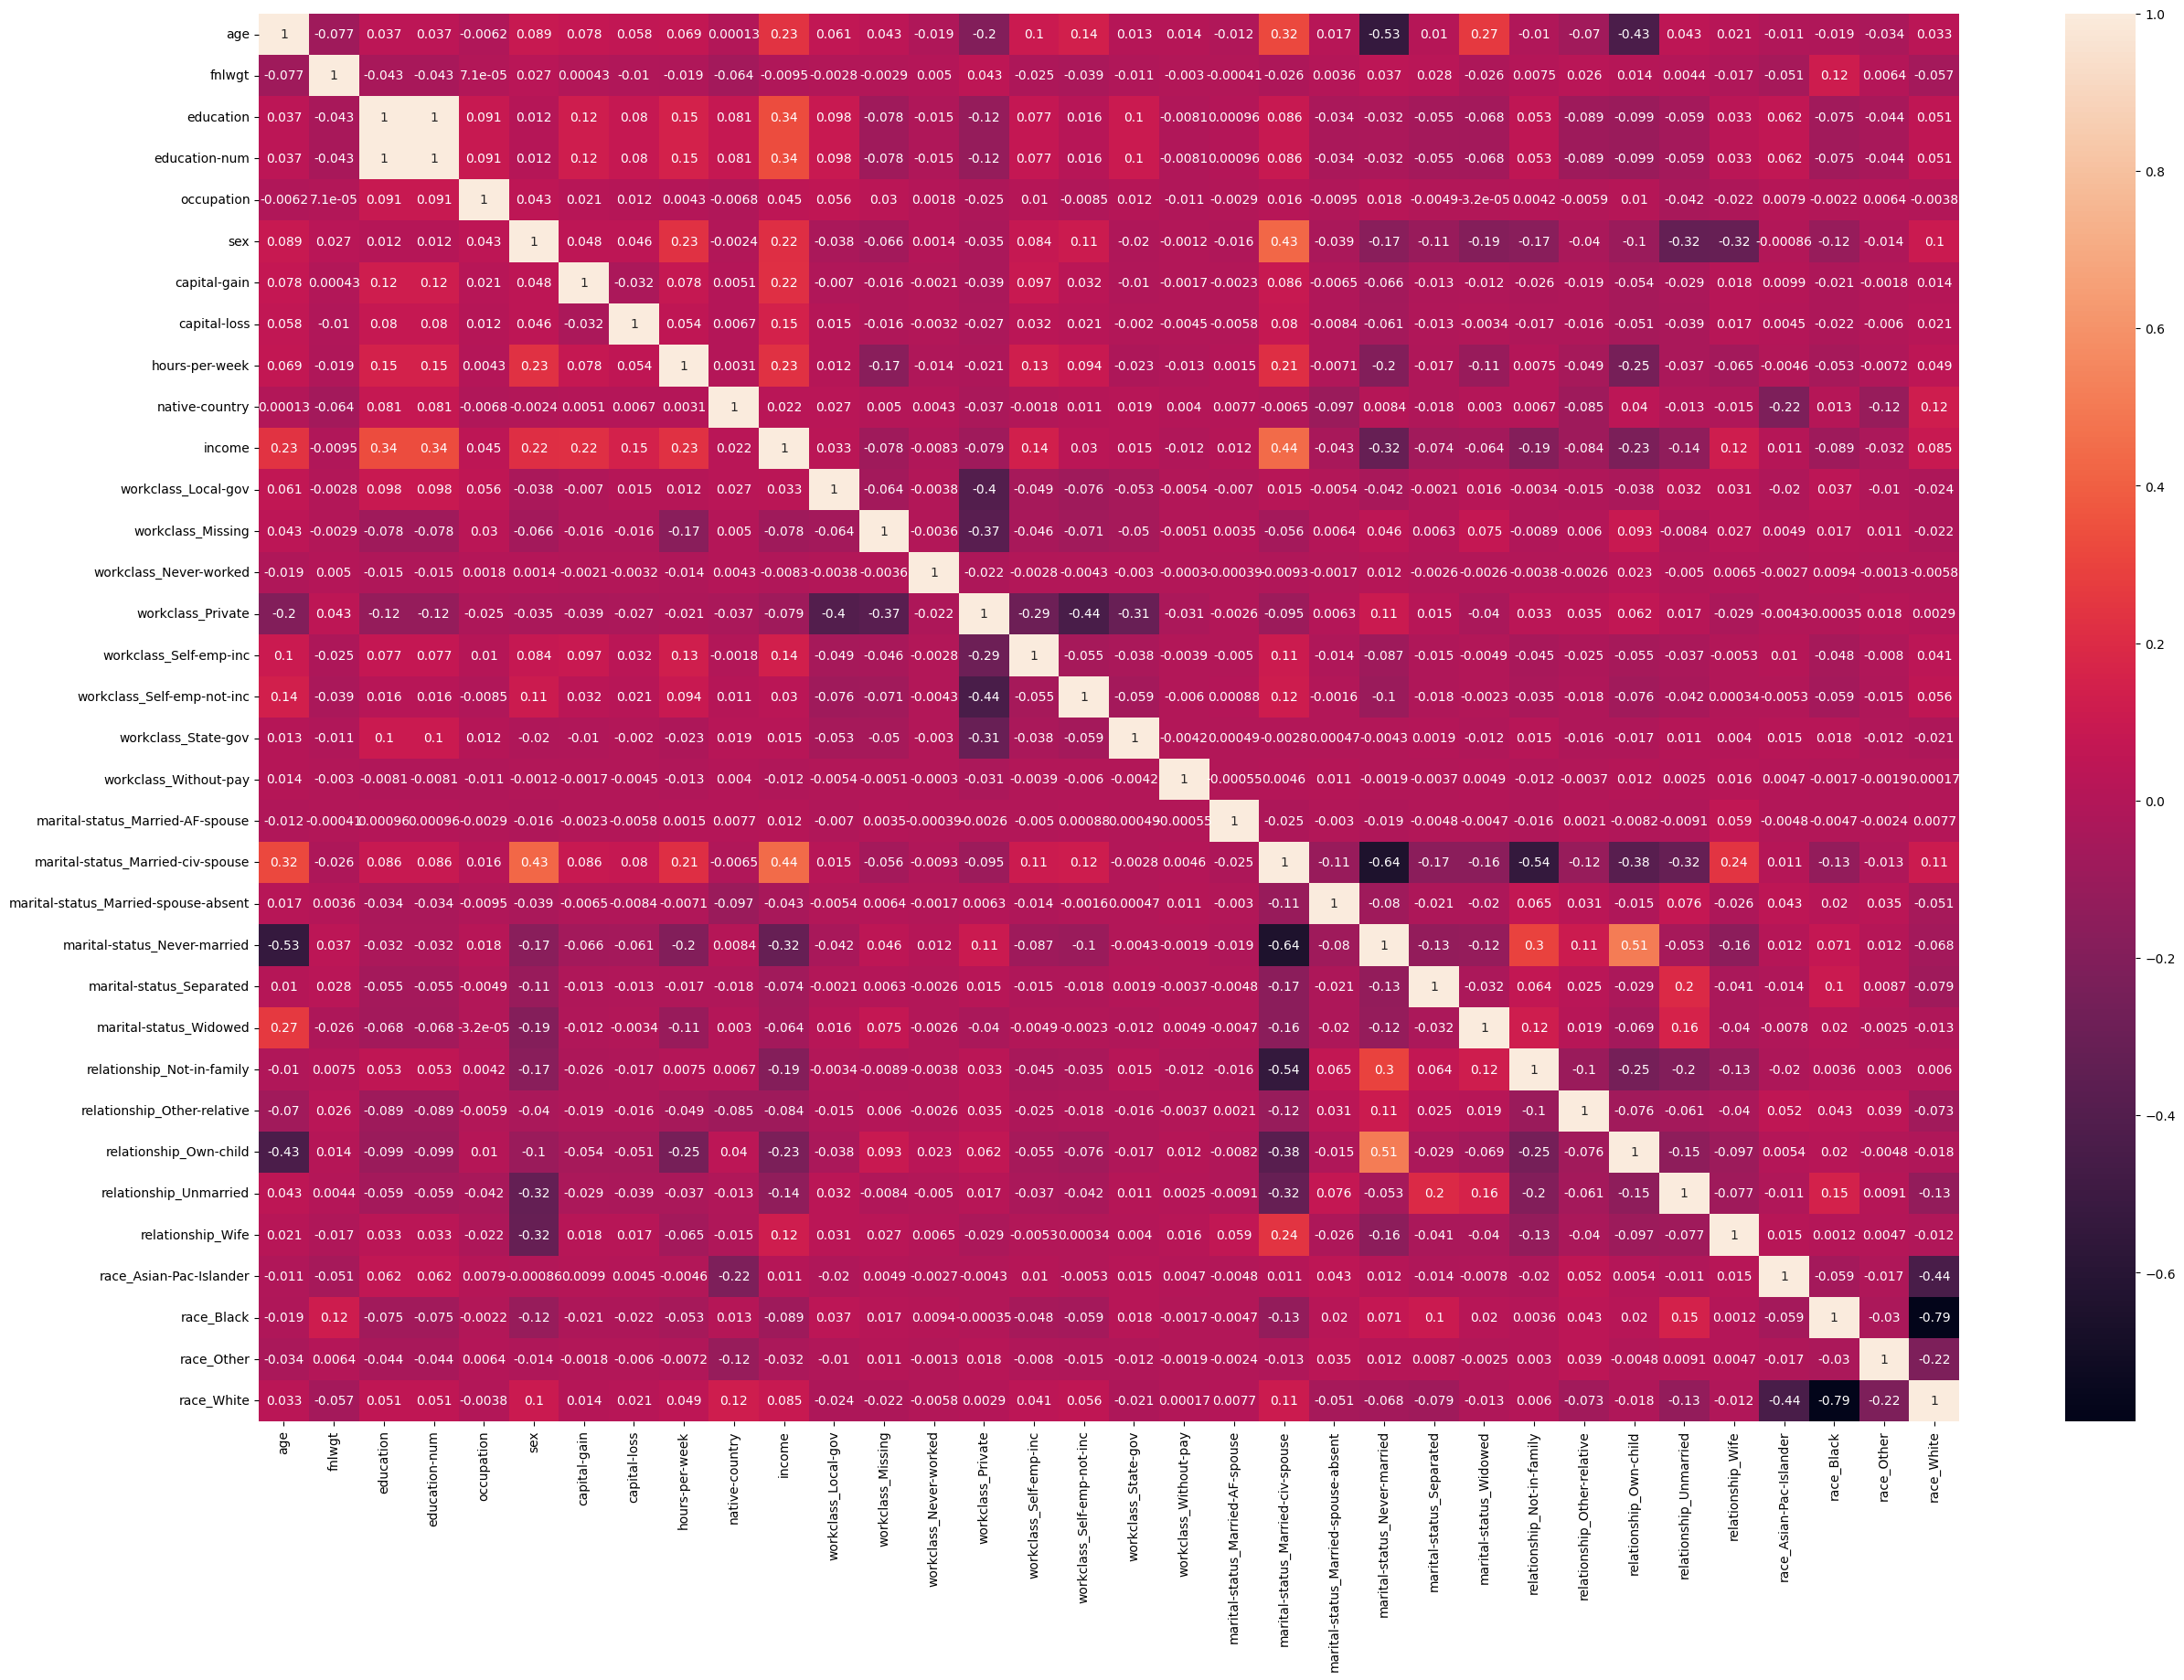

In [ ]:
#TODO
plt.figure(figsize=(30, 20))
ax = sns.heatmap(df_train.corr(numeric_only=True), annot=True)

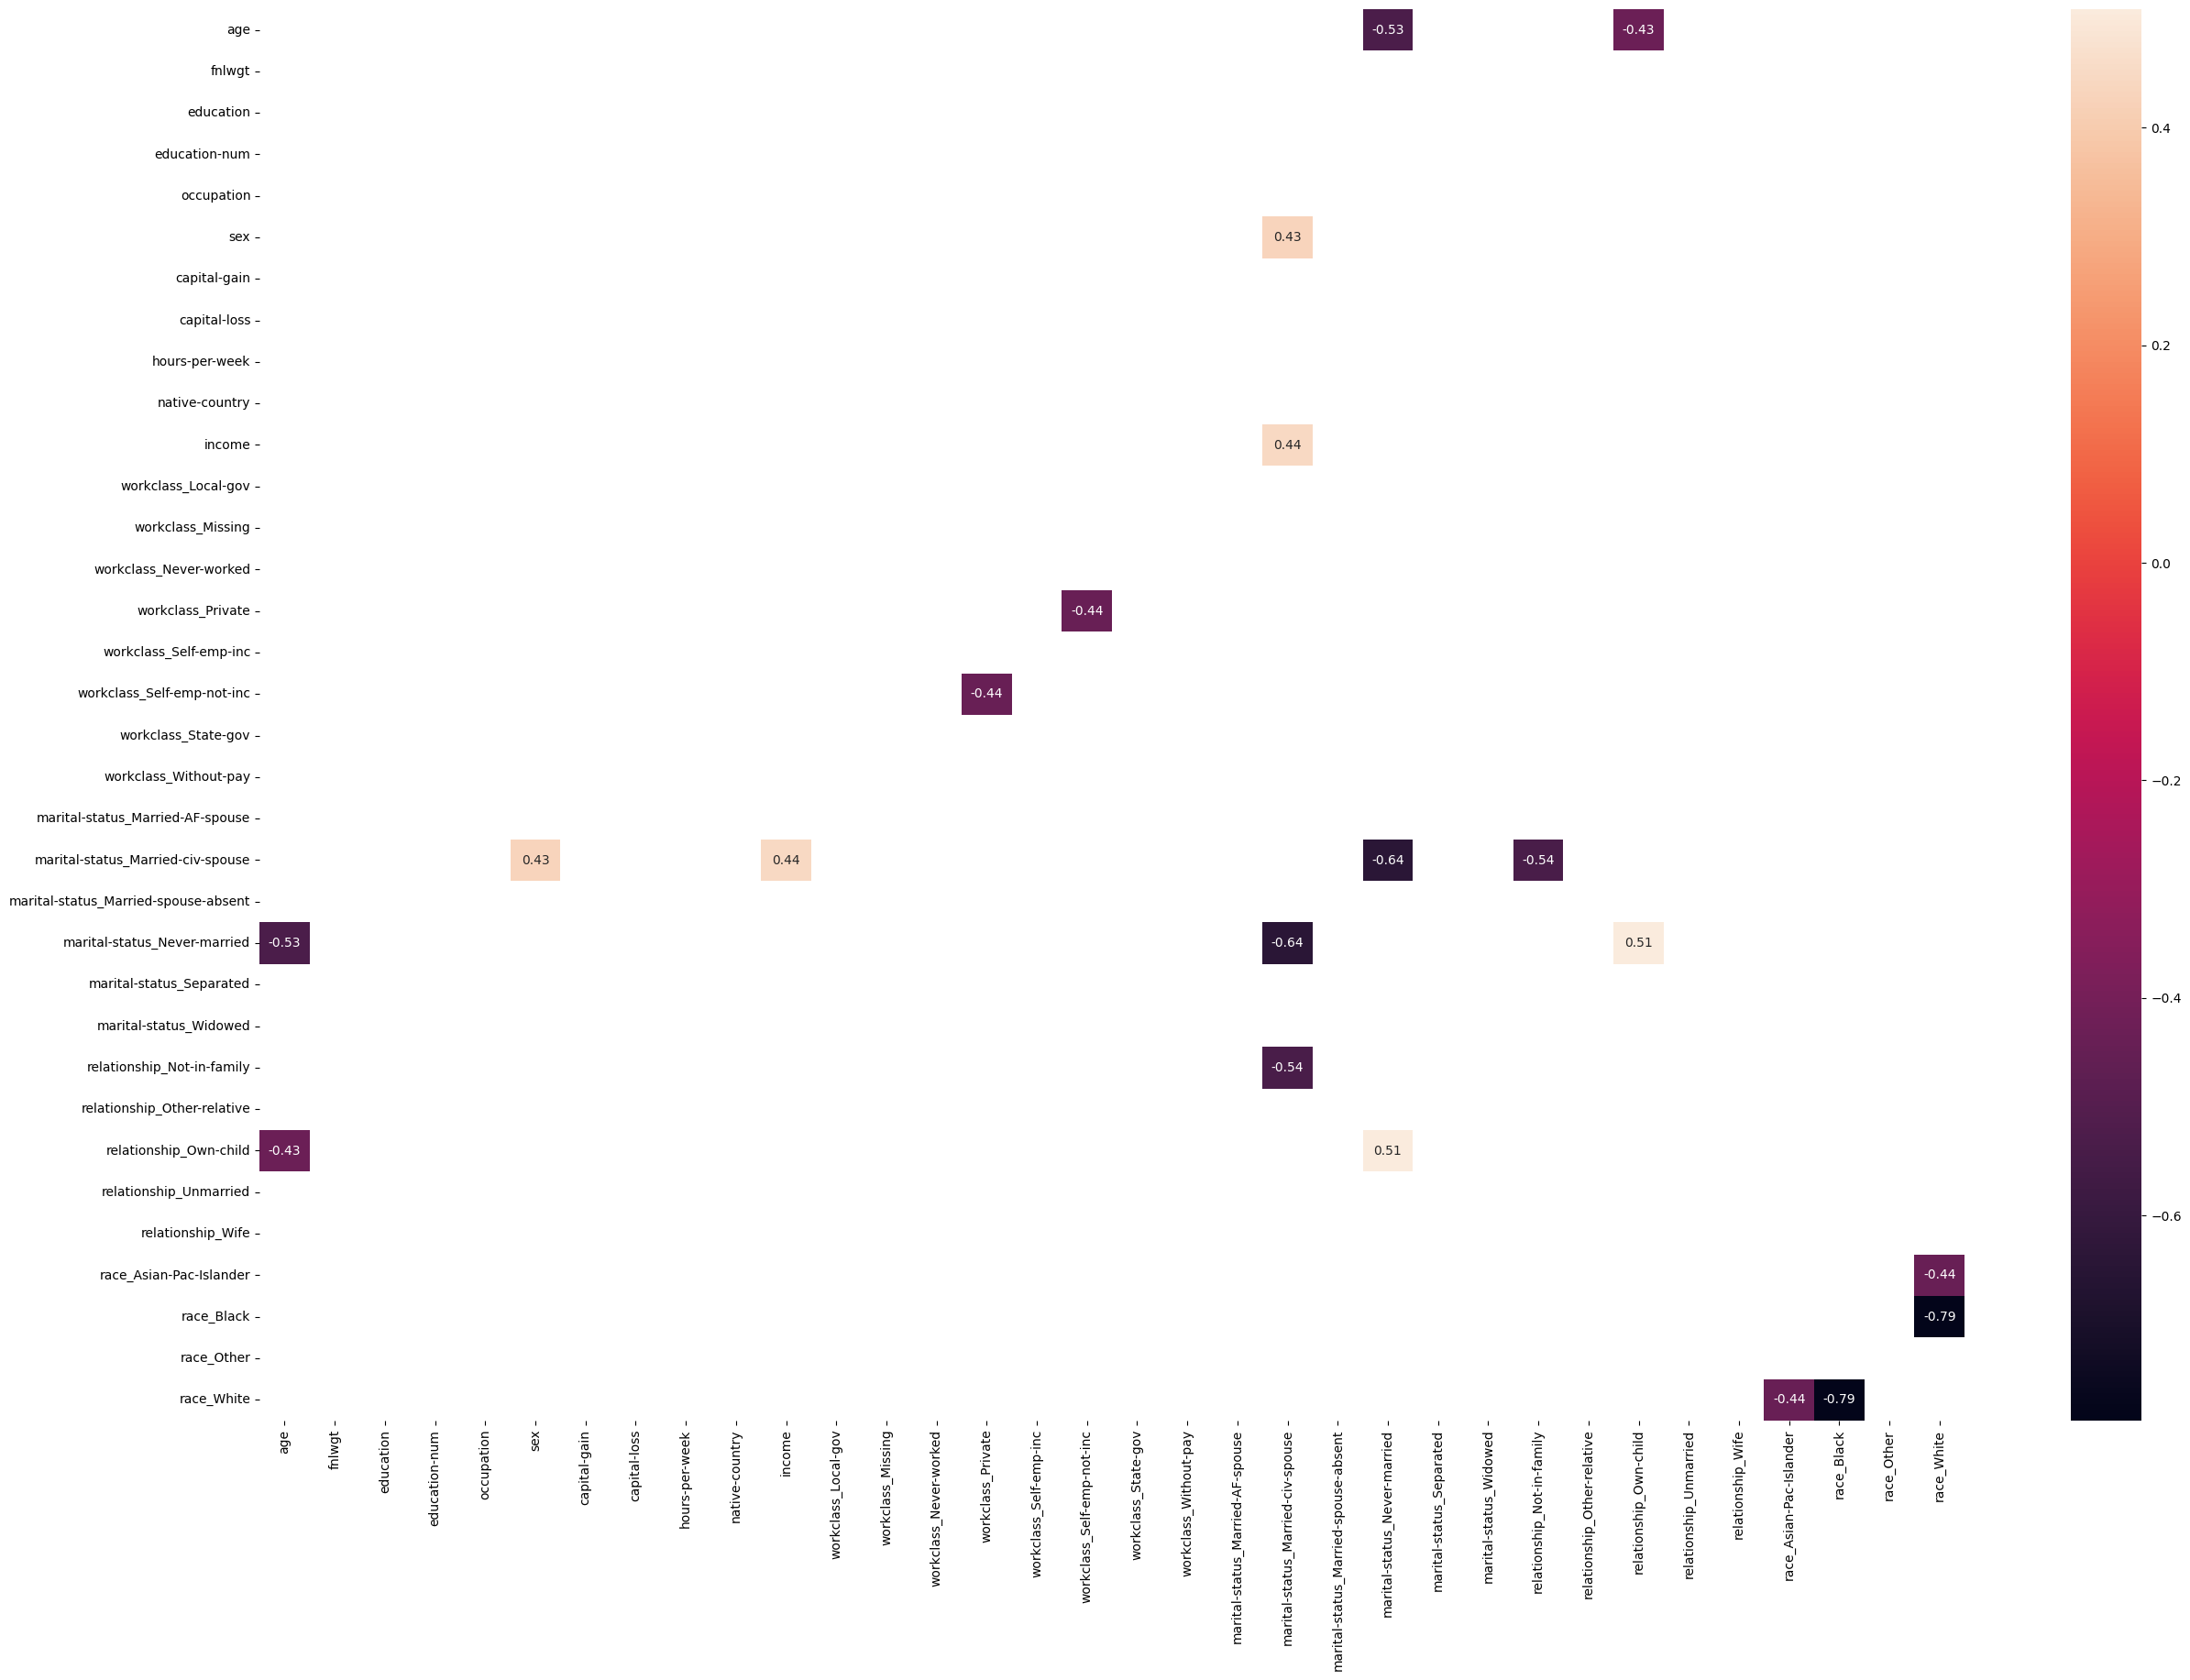

In [ ]:
corr = df_train.corr(numeric_only=True)

# Filter: Keep only strong correlations (e.g., abs(corr) > 0.5)
filtered_corr = corr[(corr.abs() >= 0.4) & (corr.abs() != 1.0)]
plt.figure(figsize=(30, 20))
ax = sns.heatmap(filtered_corr, annot=True)

# Step 9: Feature Scaling

Before addressing class imbalance, we apply feature scaling to the numerical features.
Scaling ensures that features contribute equally to the model training process and improves convergence for many machine learning algorithms.

### Scaling Methods:

#### 1. StandardScaler
- standardizes features by removing the mean and scaling to unit variance.

#### 2. MinMaxScaler
- scales features to a given range (usually [0, 1]).

#### 3. MaxAbsScaler

- scales features by their maximum absolute value.

#### 4. RobustScaler
- scales features using statistics that are robust to outliers.

#### 5. Normalizer
- scales individual samples to have unit norm.

---
 **Your Task**:
1. Choose a scaling method and explain your reasoning.
2. Implement your chosen method below.



In [ ]:
num_cols

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [ ]:
#TODO
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])
df_test[num_cols] = scaler.transform(df_test[num_cols])

In [ ]:
df_train.head()

age    fnlwgt  education  education-num  occupation  sex  \
0  0.030671 -1.063611         12       1.134739           0    1   
1  0.837109 -1.008707         12       1.134739           3    1   
2 -0.042642  0.245079          8      -0.420060           5    1   
3  1.057047  0.425801          6      -1.197459           5    1   
4 -0.775768  1.408176         12       1.134739          10    0   

   capital-gain  capital-loss  hours-per-week  native-country  ...  \
0      0.148453      -0.21666       -0.035429              39  ...   
1     -0.145920      -0.21666       -2.222153              39  ...   
2     -0.145920      -0.21666       -0.035429              39  ...   
3     -0.145920      -0.21666       -0.035429              39  ...   
4     -0.145920      -0.21666       -0.035429               4  ...   

   marital-status_Widowed  relationship_Not-in-family  \
0                   False                        True   
1                   False                       False   
2                   False                        True   
3                   False                       False   
4                   False                       False   

   relationship_Other-relative  relationship_Own-child  \
0                        False                   False   
1                        False                   False   
2                        False                   False   
3                        False                   False   
4                        False                   False   

   relationship_Unmarried  relationship_Wife  race_Asian-Pac-Islander  \
0                   False              False                    False   
1                   False              False                    False   
2                   False              False                    False   
3                   False              False                    False   
4                   False               True                    False   

   race_Black  race_Other  race_White  
0       False       False        True  
1       False       False        True  
2       False       False        True  
3        True       False       False  
4        True       False       False  

[5 rows x 34 columns]

In [ ]:
df_test.head()

age    fnlwgt  education  education-num  occupation  sex  \
0 -0.995706  0.350774          6      -1.197459           6    1   
1 -0.042642 -0.947095          8      -0.420060           4    1   
2 -0.775768  1.394362         11       0.746039          11    1   
3  0.397233 -0.279070          9      -0.031360           6    1   
4 -1.508894 -0.817458          9      -0.031360           7    0   

   capital-gain  capital-loss  hours-per-week  native-country  ...  \
0     -0.145920      -0.21666       -0.035429              39  ...   
1     -0.145920      -0.21666        0.774468              39  ...   
2     -0.145920      -0.21666       -0.035429              39  ...   
3      0.895083      -0.21666       -0.035429              39  ...   
4     -0.145920      -0.21666       -0.845327              39  ...   

   marital-status_Widowed  relationship_Not-in-family  \
0                   False                       False   
1                   False                       False   
2                   False                       False   
3                   False                       False   
4                   False                       False   

   relationship_Other-relative  relationship_Own-child  \
0                        False                    True   
1                        False                   False   
2                        False                   False   
3                        False                   False   
4                        False                    True   

   relationship_Unmarried  relationship_Wife  race_Asian-Pac-Islander  \
0                   False              False                    False   
1                   False              False                    False   
2                   False              False                    False   
3                   False              False                    False   
4                   False              False                    False   

   race_Black  race_Other  race_White  
0        True       False       False  
1       False       False        True  
2       False       False        True  
3        True       False       False  
4       False       False        True  

[5 rows x 34 columns]

<p align="justify">
<font size=4>
<b> <font color='red'>Your Answer:</font></b><br>
I used Standard Scaler for scaling the features, because we have a few numeric features, and most of the numeric features have a normal distribution, so it's better to use Standard Scaler
</p>
</font>
<hr>

# Step 10: Dealing with Class Imbalance

### Identifying Class Imbalance
In classification problems, it is common to have **imbalanced** classes, where one class has far more examples than the other. This can negatively impact model performance since many standard algorithms assume a balanced dataset.

**Question**: Where do we use resampling?

Our target variable `income` is imbalanced — most people earn `<=50K`.

This imbalance can cause models to:
- Be biased toward the majority class
- Fail to learn patterns of the minority class

### Resampling Techniques

#### 1. Random OverSampling
- Duplicate samples from the minority class

#### 2. Random UnderSampling
- Remove samples from the majority class

#### 3. SMOTE (Synthetic Minority Over-sampling Technique)
- Generate new synthetic samples from the minority class

---

 **Your Task**:
1. Inspect the class distribution.
2. Choose a resampling strategy and explain your reasoning.
3. Implement your strategy below.


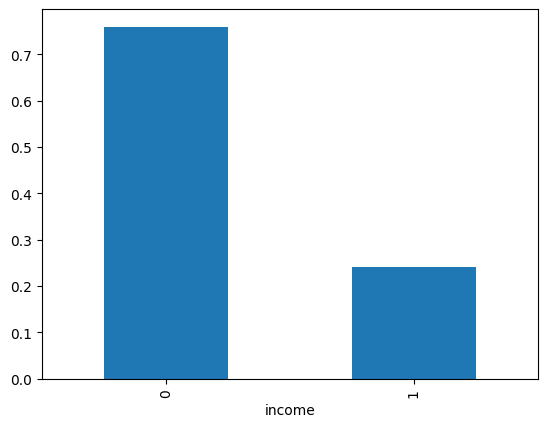

In [ ]:
#TODO
df_train['income'].value_counts(normalize=True).plot(kind="bar")
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

X_train = df_train.drop('income', axis=1)
y_train = df_train['income']

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


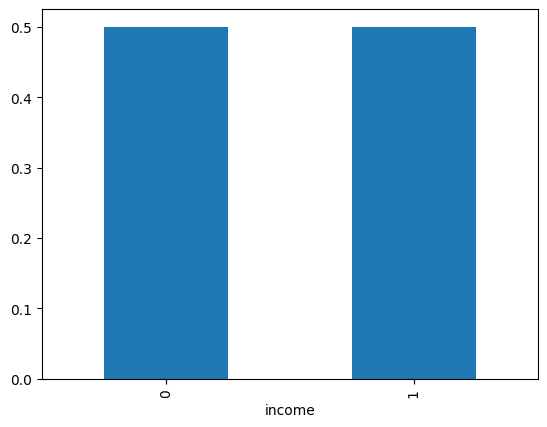

In [ ]:
y_train_resampled.value_counts(normalize=True).plot(kind="bar")
plt.show()

<p align="justify">
<font size=4>
<b> <font color='red'>Your Answer:</font></b><br>

Chosen Strategy: SMOTE (Synthetic Minority Over-sampling Technique)

**Reasoning**:

1. **Random Oversampling**: May overfit by duplicating real data points.

2. **Random Undersampling**: Discards valuable data from the majority class.

3. **SMOTE**: Creates synthetic new examples from the minority class by interpolating between nearby instances — helping the model generalize better.

Thus, SMOTE is generally preferred over basic resampling when you have enough data and want to preserve the full majority class distribution.


</p>
</font>
<hr>

### Re-evaluating the Need for Resampling:  
<b> <font color='red'>Question:</font></b> In this case, should we use resampling or not, and why?  

<p align="justify">
<font size=4>
<b> <font color='red'>Your Answer:</font></b><br>
<b> <font color='White'>Yes, because the number of person with <= 50k income is much bigger than the number of person with >50k income</font></b><br>

</p>
</font>
<hr>

# Step 11: Modeling and Evaluation

In this part of the project, you will apply and compare several machine learning models on the training dataset. Each model uses a different mathematical approach to learn from the data and make predictions. Your goal is to identify the most effective model based on the evaluation metrics and determine which model provides the best generalization to unseen data.

## 11.1 Overview of the Modeling Section
You need to implement a range of classifiers that represent different types of machine learning algorithms, including:

- **K-Nearest Neighbors (KNN):** A simple, non-parametric method that makes predictions based on the majority class of the nearest neighbors in the feature space.
- **Decision Trees:** A tree-like model where decisions are made based on feature values, with each branch representing a feature condition and each leaf representing a class label.
- **Random Forest:** An ensemble of decision trees that improves prediction accuracy by averaging multiple models to reduce overfitting.
- **Gradient Boosting Methods (XGBoost, LightGBM):** Advanced ensemble techniques that build trees sequentially, where each new tree attempts to correct the errors of the previous one.
- **Logistic Regression:** A linear model used for binary or multi-class classification that predicts the probability of class membership.
- **Support Vector Machines (SVM):** A classifier that finds the hyperplane that best separates data points of different classes.
- **Neural Networks:** A class of models inspired by biological neural networks, capable of learning complex patterns in large datasets.

**Write a function that:**

- **Takes** `y_test` (true labels) and `y_pred` (predicted labels),
- **Computes**: Accuracy, Precision, Recall, F1,
- **Plots**: ROC Curve + AUC and Precision-Recall curve,
- **Displays**: Confusion Matrix.

**Note: You may need to read Part 13 before implementing this function.**

In [ ]:
X_test = df_test.drop("income",axis = 1)
y_test = df_test["income"]

In [ ]:
results = {}
X_test = df_test.drop("income",axis = 1)
y_test = df_test["income"]

In [ ]:
#TODO
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, precision_recall_curve

def evaluate_model(y_test, y_pred):

  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  metrics_df = pd.DataFrame({
      'Accuracy': [accuracy],
      'Precision': [precision],
      'Recall': [recall],
      'F1 Score': [f1]
  })

  print(metrics_df)
  print()


  print("Confusion Matrix:")
  cm  = confusion_matrix(y_test, y_pred)
  # Plot heatmap
  plt.figure(figsize=(6, 4))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix Heatmap')
  plt.show()
  print()

  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  roc_auc = auc(fpr, tpr)
  plt.figure(figsize=(6, 4))
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()
  print()

  precision_plot, recall_plot, thresholds_plot = precision_recall_curve(y_test, y_pred)
  plt.figure(figsize=(6, 4))
  plt.plot(recall_plot, precision_plot, label=f'Precision-Recall Curve (AUC = {roc_auc:.2f})')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision-Recall Curve')
  plt.legend()
  plt.show()

  return accuracy,precision,recall,f1


###1)K-Nearest Neighbors (KNN)

KNN is a simple algorithm that makes predictions based on the closest data points in the training set. It looks at the ‘K’ nearest neighbors (based on distance) to a new point and assigns the most common class among those neighbors.

 **Your Task**:
1.  Implement and train the KNN classifier on the training dataset.(and then evaluate it on the test dataset)

#### Train

   Accuracy  Precision   Recall  F1 Score
0  0.891687   0.845791  0.95805  0.898428

Confusion Matrix:


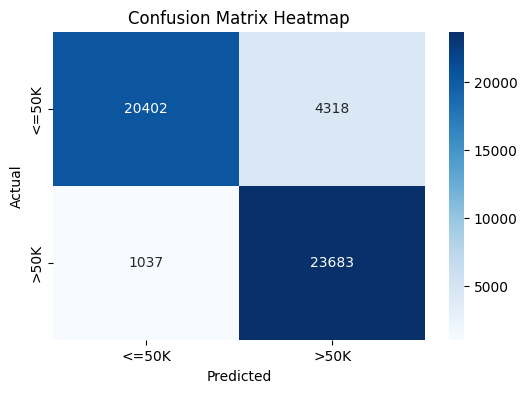

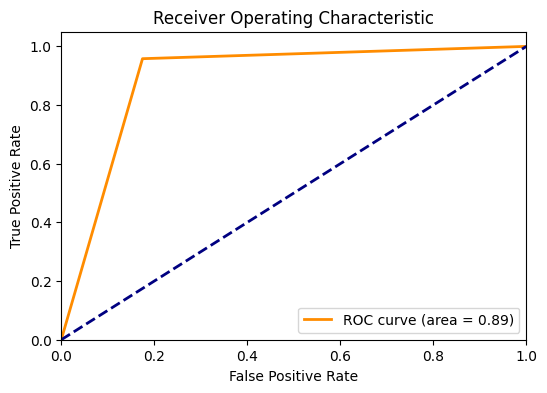

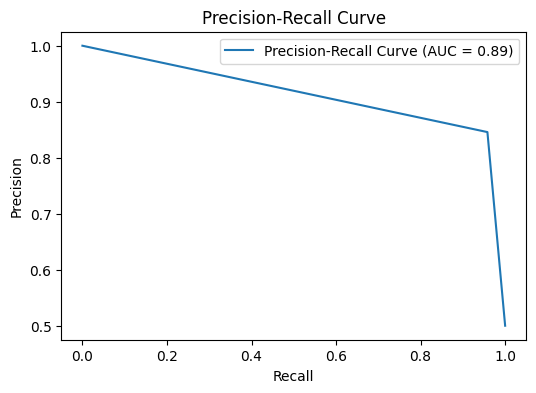

In [ ]:
#TODO
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_resampled, y_train_resampled)
y_pred_train = knn.predict(X_train_resampled)
y_pred_test = knn.predict(X_test)

accuracy,precision,recall,f1 = evaluate_model(y_train_resampled, y_pred_train)

#### Test

   Accuracy  Precision    Recall  F1 Score
0  0.786991   0.533546  0.781591  0.634177

Confusion Matrix:


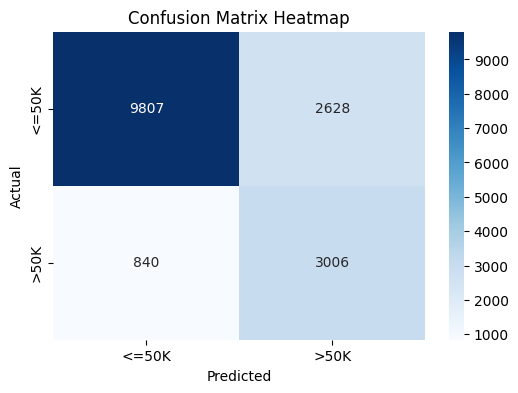

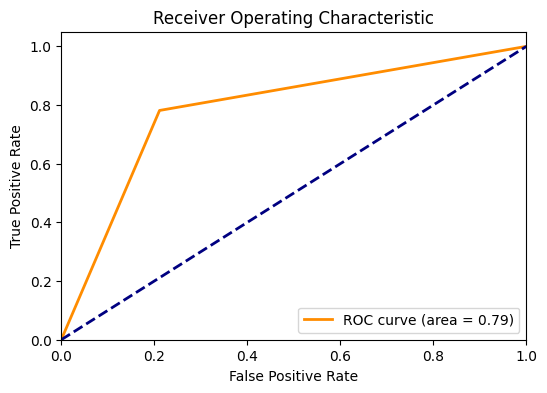

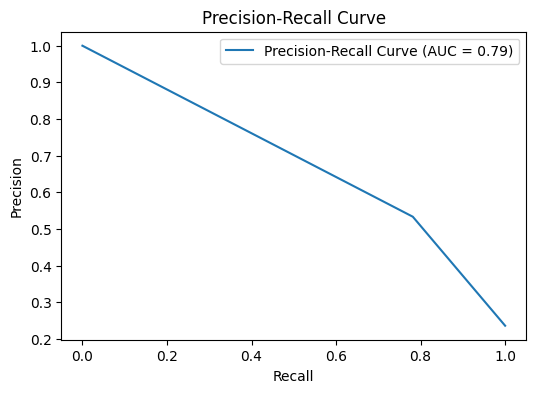

In [ ]:
accuracy,precision,recall,f1 = evaluate_model(y_test, y_pred_test)


if "KNN" not in results:

  results["KNN"] = {
          "Model": "KNN",
          "Train-Type" : "Normal",
          "Accuracy": accuracy,
          "Precision": precision,
          "Recall": recall,
          "F1-score": f1
      }

2. Answer this question:How does  'K' in KNN  affect the model's performance?

<b> <font color='red'>Your Answer:</font></b><br>
</font></b><br>

The 'K' in K-Nearest Neighbors (KNN) controls how many neighbors are considered when making a prediction, and it has a significant impact on the model's bias-variance tradeoff and performance:


1. **Small K (e.g., K=1 or 3)**:
Low bias, high variance.

The model is very flexible and can capture complex patterns.

However, it's sensitive to noise and may overfit the training data.

Predictions are based on very few nearby points, which can lead to unstable results.


2. **Large K (e.g., K=15 or 50)**:
High bias, low variance.

The model becomes more stable and smooth.

It generalizes better but may underfit by ignoring local patterns.

Outliers have less influence, but important local trends might be missed.


3. **Very Large K** (approaching the size of the dataset):
The model may just predict the majority class (in classification) or average of all points (in regression), reducing predictive power.

###2)Decision Tree

A decision tree makes predictions by splitting the data into smaller groups based on feature values. At each step (node), it chooses the best condition to separate the data, leading to a tree-like structure where each leaf gives a prediction.

 **Your Task**:
1. Implement and train the Decision Tree classifier on the training dataset.(and then evaluate it on the test dataset)

#### Train

   Accuracy  Precision   Recall  F1 Score
0   0.99998        1.0  0.99996   0.99998

Confusion Matrix:


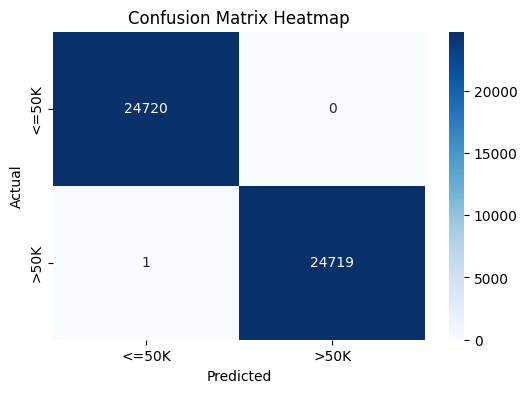

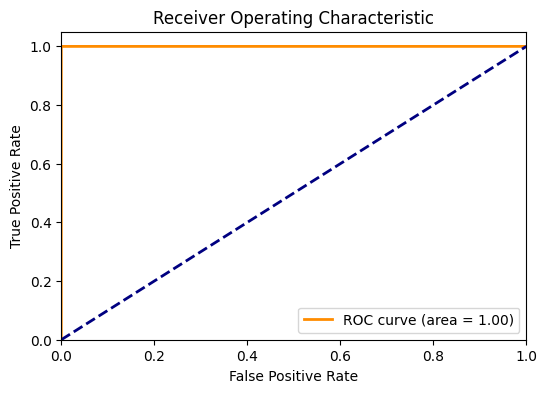

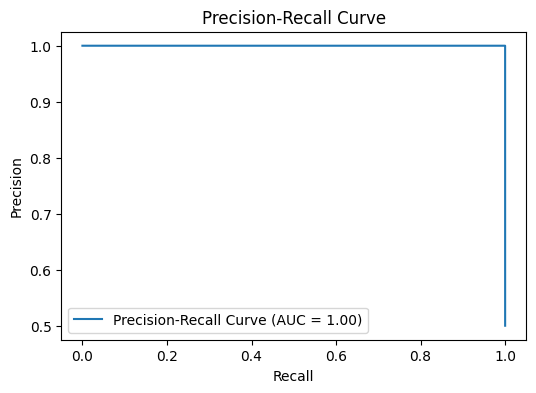

In [ ]:
#TODO
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train_resampled, y_train_resampled)
y_pred_train = clf.predict(X_train_resampled)
y_pred_test = clf.predict(X_test)

accuracy,precision,recall,f1 = evaluate_model(y_train_resampled, y_pred_train)


#### Test

   Accuracy  Precision    Recall  F1 Score
0  0.801486   0.572133  0.633125  0.601086

Confusion Matrix:


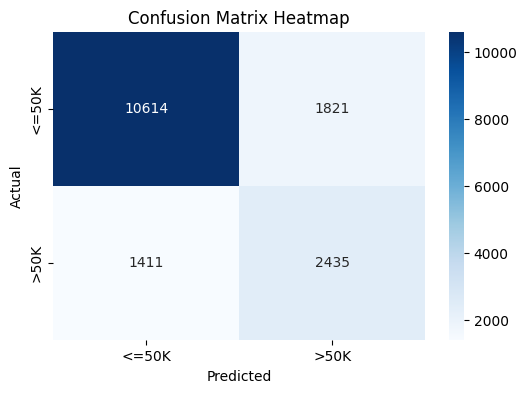

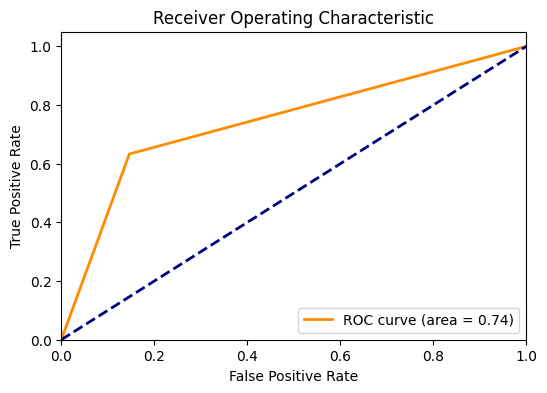

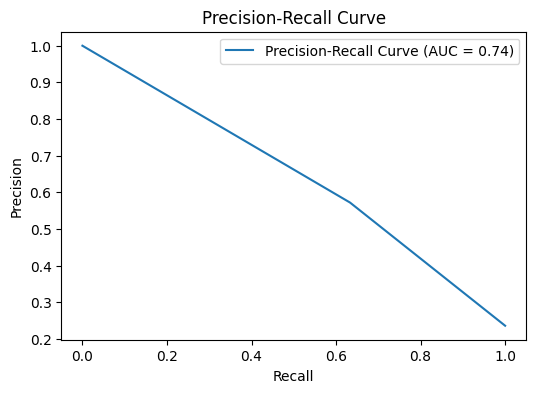

In [ ]:
accuracy,precision,recall,f1 = evaluate_model(y_test, y_pred_test)

if "DT" not in results:

  results["DT"] = {
          "Model": "DT",
          "Train-Type" : "Normal",
          "Accuracy": accuracy,
          "Precision": precision,
          "Recall": recall,
          "F1-score": f1
      }

2. Answer this question:How does a decision tree decide where to split the data?

<b> <font color='red'>Your Answer:</font></b><br>
A decision tree decides where to split the data by selecting the feature and threshold that best separates the data into distinct groups based on the target variable. It does this by:

**Evaluating Features and Thresholds**: For each feature, the algorithm considers possible split points (e.g., for numerical features, it might test values between data points; for categorical features, it tests subsets of categories).

**Measuring Impurity**: It calculates an impurity metric for each potential split, commonly:

**Gini Impurity**: Measures the probability of misclassifying a randomly chosen element (lower is better).

**Entropy/Information Gain**: Measures the reduction in uncertainty about the target variable after the split (higher gain is better).
Variance Reduction: Used for regression, minimizes the variance of the target variable in child nodes.

**Choosing the Best Split** The algorithm selects the feature and threshold that minimizes impurity (or maximizes information gain) across the resulting child nodes.

**Recursive Application**: The process repeats for each child node until a stopping criterion is met (e.g., max depth, minimum samples per node, or no further improvement).

The goal is to create splits that produce the most homogeneous child nodes with respect to the target variable, improving the tree's predictive power.

###3)Random Forest (Ensemble of Decision Trees)

Random Forest is an ensemble method that builds many decision trees on different parts of the data and combines their results. Each tree votes on the prediction, and the majority vote is taken as the final output.

 **Your Task**:
1. Implement and train the Random Forest classifier on the training dataset.(and then evaluate it on the test dataset)

#### Train

   Accuracy  Precision  Recall  F1 Score
0   0.99996   0.999919     1.0   0.99996

Confusion Matrix:


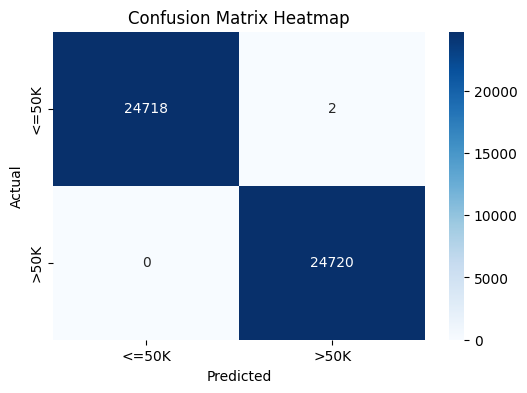

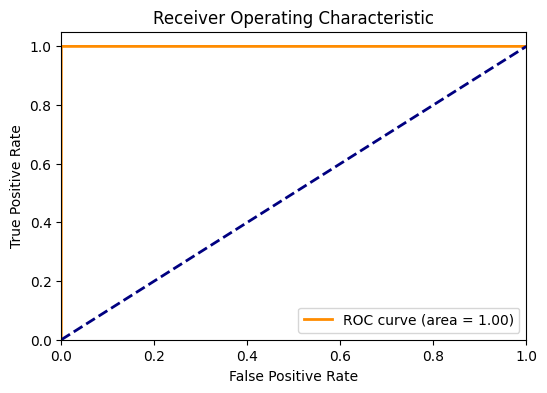

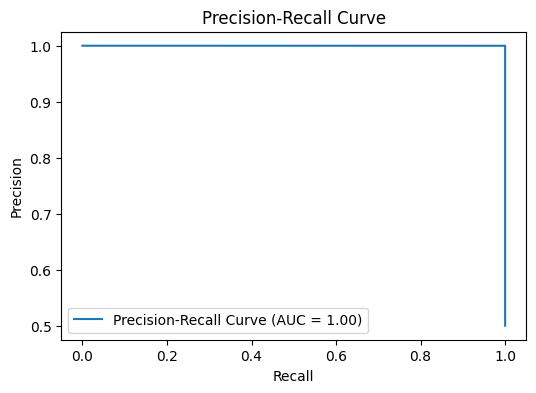

In [ ]:
#TODO
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_resampled,y_train_resampled)
y_pred_train = rf.predict(X_train_resampled)
y_pred_test = rf.predict(X_test)

accuracy,precision,recall,f1 = evaluate_model(y_train_resampled, y_pred_train)


#### Test

   Accuracy  Precision    Recall  F1 Score
0  0.840919   0.651398  0.702548  0.676007

Confusion Matrix:


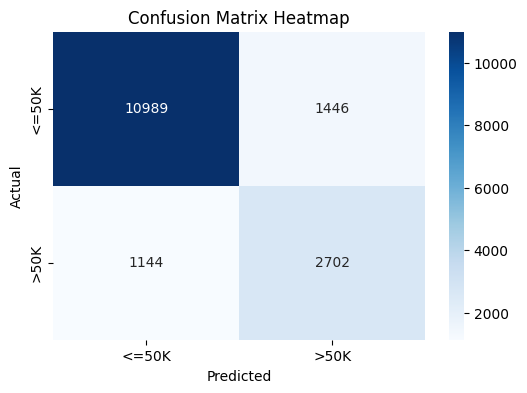

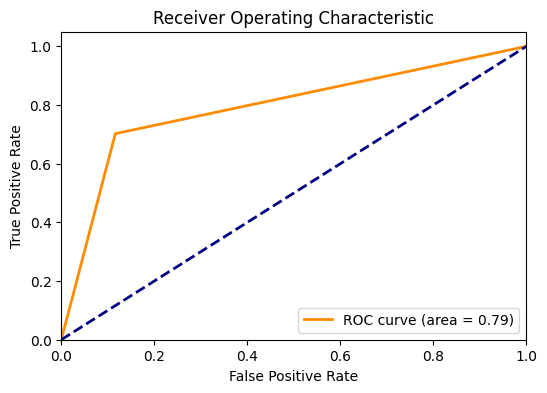

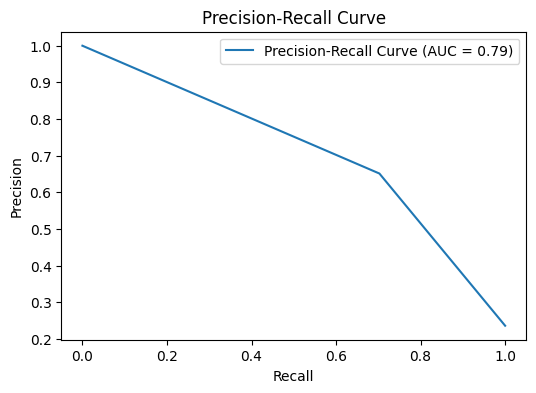

In [ ]:
accuracy,precision,recall,f1 = evaluate_model(y_test, y_pred_test)

if "RF" not in results:

  results["RF"] = {
          "Model": "RF",
          "Train-Type" : "Normal",
          "Accuracy": accuracy,
          "Precision": precision,
          "Recall": recall,
          "F1-score": f1
      }

2. Answer this question:Why does Random Forest use more than one decision tree?

<b> <font color='red'>Your Answer:</font></b><br>

Random Forest uses multiple decision trees to improve predictive accuracy and reduce overfitting. Here's why:

1. **Reducing Variance**: Individual decision trees are prone to overfitting, as they can capture noise in the data. By averaging predictions from multiple trees (ensemble method), Random Forest reduces variance, leading to more stable and generalizable results.

2. **Diversity Through Randomization**: Each tree is trained on a random subset of the data (via bootstrapping) and a random subset of features at each split. This diversity ensures that trees capture different patterns, reducing correlation between them and improving overall performance.

3. **Robustness**: Combining multiple trees makes the model less sensitive to outliers or noise in any single tree, as errors tend to cancel out when aggregating predictions (e.g., via majority voting for classification or averaging for regression).

4. **Better Generalization**: Collective predictions of many trees are typically more accurate than any single tree, especially on complex datasets


###4)Gradient Boosting Models (XGBoost, LightGBM, CatBoost)

These models build decision trees one at a time, where each new tree focuses on fixing the errors made by the previous ones. This process is called “boosting.” They add up the results of many trees to improve accuracy step-by-step.

###4-1)XGBoost

XGBoost builds decision trees sequentially, where each new tree focuses on correcting the errors of the previous ones. It uses a special technique called “gradient boosting” to minimize the overall loss function efficiently.

 **Your Task**:
1. implement and train the XGBoost classifier on the training dataset.(and then evaluate it on the test dataset)

#### Train

   Accuracy  Precision    Recall  F1 Score
0  0.917051    0.91059  0.924919  0.917699

Confusion Matrix:


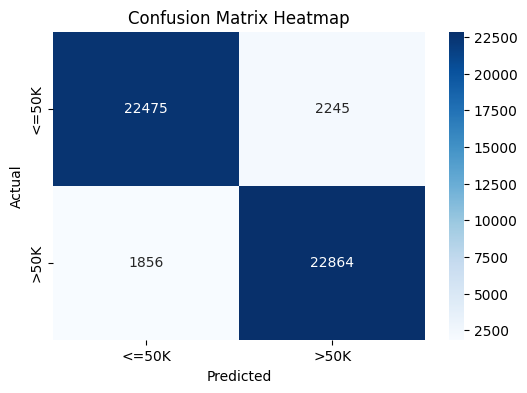

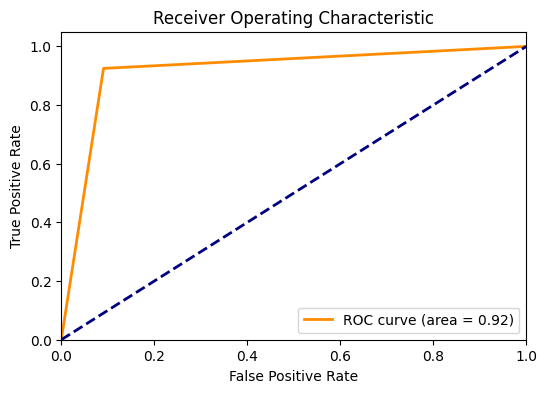

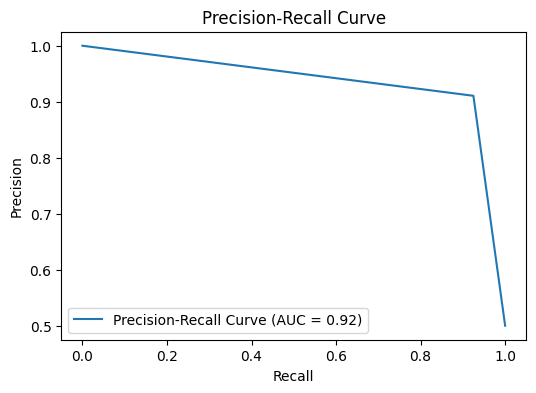

In [ ]:
#TODO
import xgboost as xgb
xgb = xgb.XGBClassifier()
xgb.fit(X_train_resampled,y_train_resampled)
y_pred_train = xgb.predict(X_train_resampled)
y_pred_test = xgb.predict(X_test)

accuracy,precision,recall,f1 = evaluate_model(y_train_resampled, y_pred_train)


#### Test

   Accuracy  Precision   Recall  F1 Score
0    0.8548   0.671369  0.75481  0.710649

Confusion Matrix:


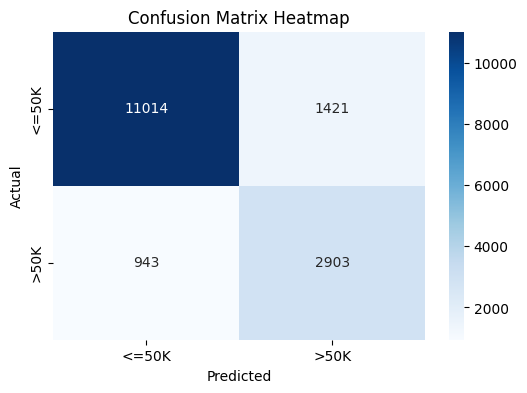

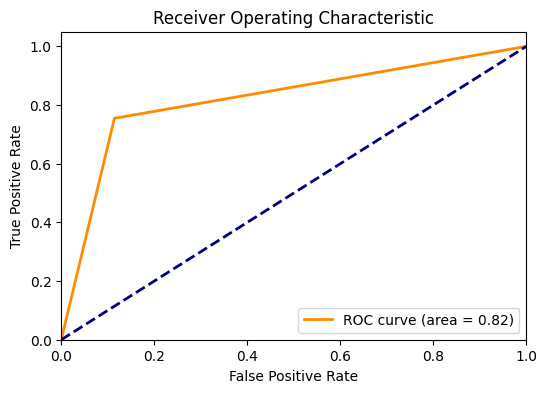

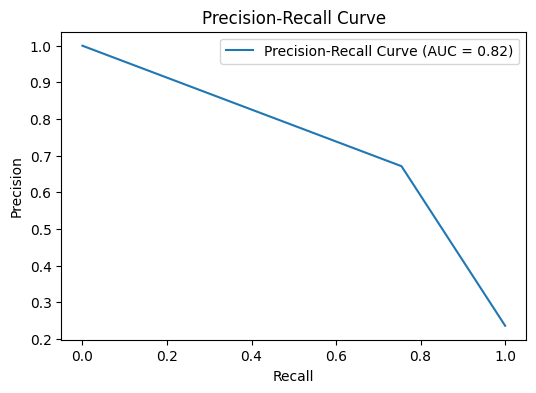

In [ ]:
accuracy,precision,recall,f1 = evaluate_model(y_test, y_pred_test)

if "XGBoost" not in results:

  results["XGBoost"] = {
          "Model": "XGBoost",
          "Train-Type" : "Normal",
          "Accuracy": accuracy,
          "Precision": precision,
          "Recall": recall,
          "F1-score": f1
      }

2. Answer this question:Why does XGBoost build trees in sequence?

<b> <font color='red'>Your Answer:</font></b><br>

XGBoost builds trees in sequence to iteratively improve the model by focusing on correcting errors made by previous trees. Here's why:

1. **Gradient Boosting Framework**: XGBoost is based on gradient boosting, where each tree is trained to predict the residuals (errors) of the previous ensemble. By adding trees sequentially, the model gradually reduces the overall error, optimizing a loss function (e.g., mean squared error for regression or log loss for classification).

2. **Error Correction**: Each new tree is built to address the weaknesses of the current model by fitting to the negative gradient of the loss function. This allows XGBoost to focus on misclassified or poorly predicted instances, improving accuracy with each step.

3. **Additive Learning**: The predictions of all trees are combined additively, with each tree contributing a weighted improvement to the final prediction. Sequential building ensures that later trees refine the model rather than starting from scratch.

4. **Regularization and Optimization**: XGBoost incorporates regularization (e.g., L1/L2 penalties) and uses second-order gradient information (Hessian) to make precise updates, which benefits from sequential tree construction to fine-tune the model effectively.


By building trees in sequence, XGBoost creates a strong learner from weak learners (trees), achieving high accuracy and robustness, especially on complex datasets.

###4-2)LightGBM

LightGBM (Light Gradient Boosting Machine) is a fast, efficient gradient LightGBM is a gradient boosting algorithm that grows trees leaf-wise instead of level-wise, meaning it chooses the leaf with the highest error to grow, which leads to faster and potentially more accurate learning.

 **Your Task**:
1. Implement and train the LightGBM classifier on the training dataset.(and then evaluate it on the test dataset)

#### Train

[LightGBM] [Info] Number of positive: 24720, number of negative: 24720
[LightGBM] [Info] Total Bins 1644
[LightGBM] [Info] Number of data points in the train set: 49440, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
   Accuracy  Precision   Recall  F1 Score
0  0.906351   0.900742  0.91335  0.907002

Confusion Matrix:


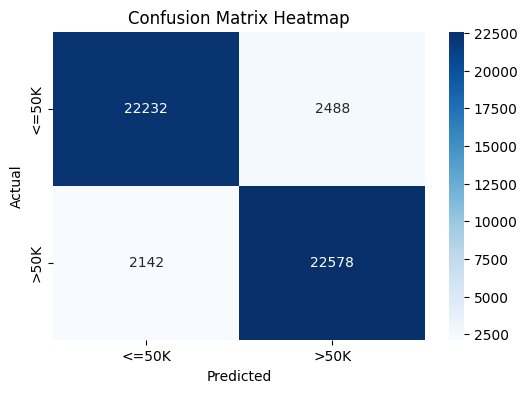

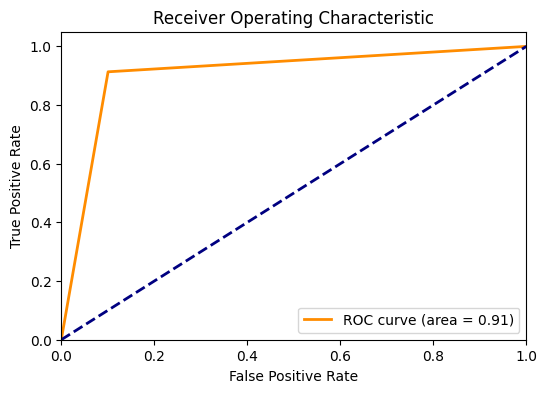

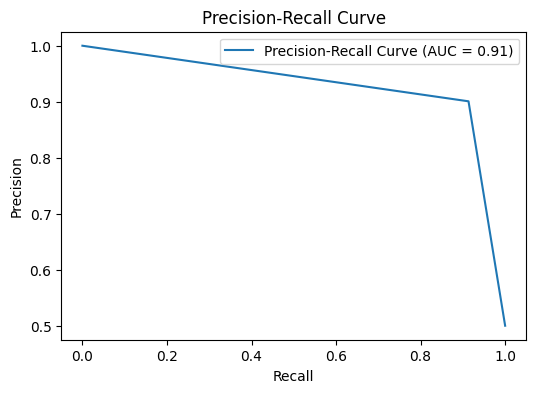

In [ ]:
#TODO
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(force_row_wise=True)
lgbm.fit(X_train_resampled,y_train_resampled)
y_pred_train = lgbm.predict(X_train_resampled)
y_pred_test = lgbm.predict(X_test)

accuracy,precision,recall,f1 =  evaluate_model(y_train_resampled, y_pred_train)

#### Test

   Accuracy  Precision   Recall  F1 Score
0  0.856643   0.679572  0.74389  0.710278

Confusion Matrix:


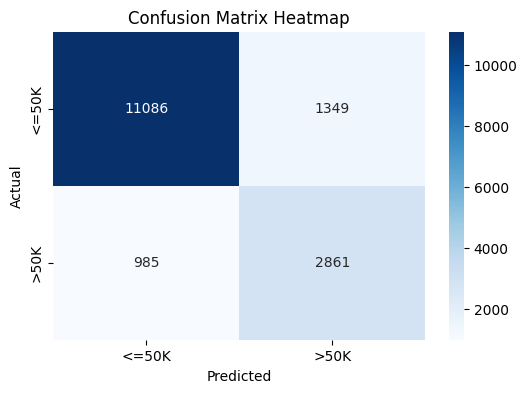

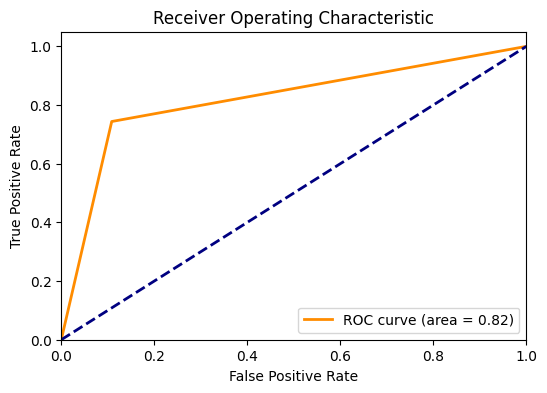

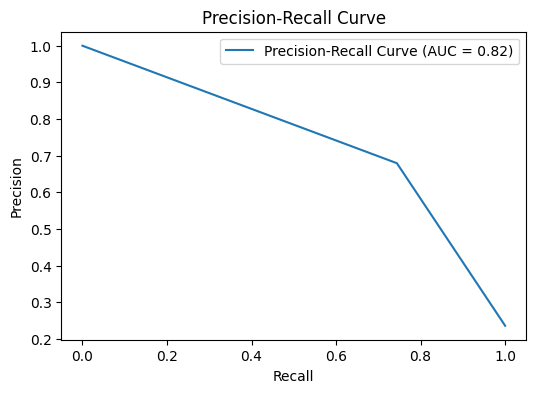

In [ ]:
accuracy,precision,recall,f1 =  evaluate_model(y_test, y_pred_test)

if "LightGBM" not in results:

  results["LightGBM"] = {
          "Model": "LightGBM",
          "Train-Type" : "Normal",
          "Accuracy": accuracy,
          "Precision": precision,
          "Recall": recall,
          "F1-score": f1
      }

2. Answer this question:How does LightGBM grow trees differently?

<b> <font color='red'>Your Answer:</font></b><br>

LightGBM grows trees leaf-wise (best-first), splitting the leaf with the highest loss reduction, unlike traditional methods that grow trees level-wise. This makes it faster and more accurate but can lead to overfitting if not controlled.
It also uses histogram-based splitting to speed up training and reduce memory usage.

###5)Logistic Regression

Logistic Regression is a model that calculates the probability of a data point belonging to a class. It uses a linear combination of input features and passes the result through a function that outputs values between 0 and 1 (called the sigmoid function).

 **Your Task**:
1. Implement and train the Logistic Regression classifier on the training dataset.(and then evaluate it on the test dataset)

#### Train

   Accuracy  Precision    Recall  F1 Score
0  0.834486   0.811748  0.870955   0.84031

Confusion Matrix:


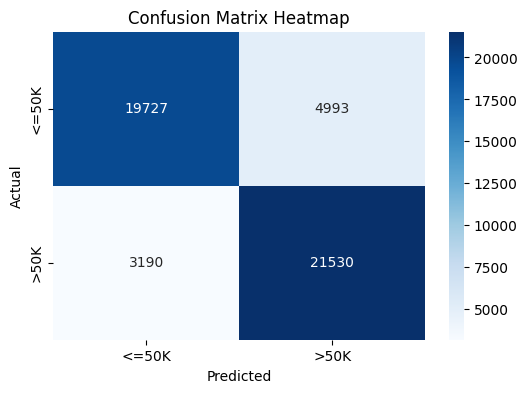

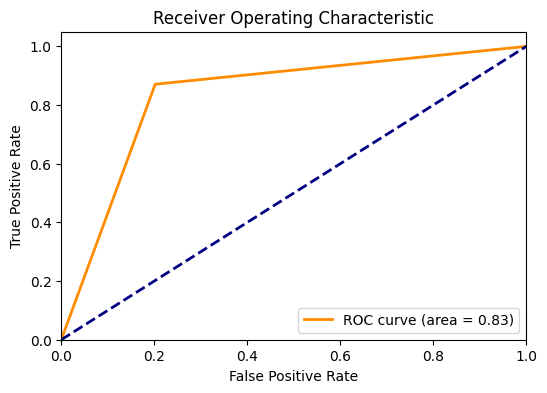

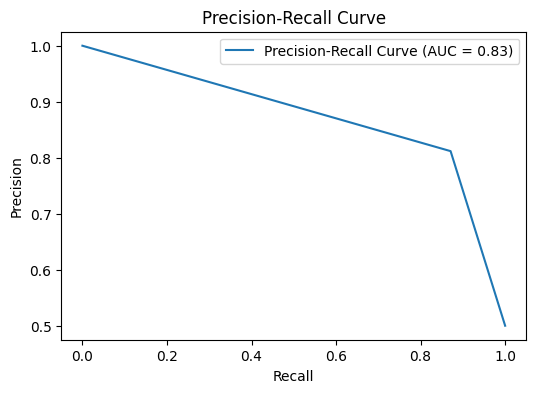

In [ ]:
#TODO
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_resampled,y_train_resampled)
y_pred_train = lr.predict(X_train_resampled)
y_pred_test = lr.predict(X_test)

accuracy,precision,recall,f1 = evaluate_model(y_train_resampled, y_pred_train)

#### Test

   Accuracy  Precision    Recall  F1 Score
0  0.801179   0.553713  0.816173    0.6598

Confusion Matrix:


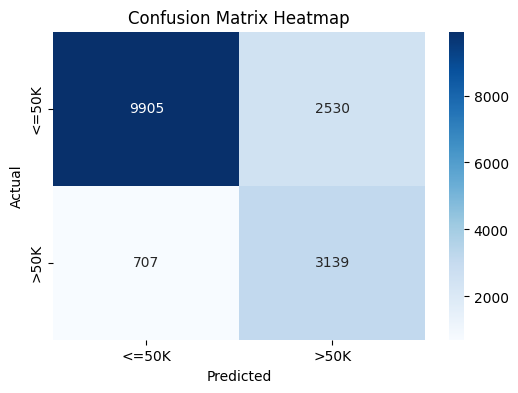

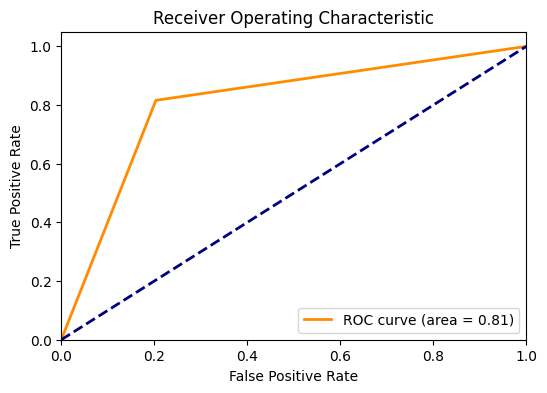

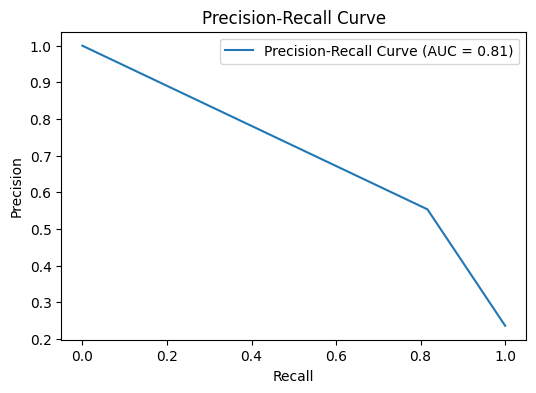

In [ ]:
accuracy,precision,recall,f1 =  evaluate_model(y_test, y_pred_test)

if "Logistic" not in results:

  results["Logistic"] = {
          "Model": "Logistic",
          "Train-Type" : "Normal",
          "Accuracy": accuracy,
          "Precision": precision,
          "Recall": recall,
          "F1-score": f1
      }

2. Answer this question:How is the linear formula used in this logistic regression?

<b> <font color='red'>Your Answer:</font></b><br>


In logistic regression, the linear formula is used to model the relationship between the input features and the log-odds of the outcome, which is then transformed to predict probabilities. Here's how it works:

1. **Linear Combination**: The input features $$ x_1, x_2,\dots, x_n$$ are combined linearly with weights (coefficients) $$( \beta_0, \beta_1, \dots, \beta_n )$$ and the linear formula is:
$$
   z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n  
$$
   where $$( \beta_0 )$$ is the intercept, and $$( z )$$ represents the linear predictor or log-odds.


2. **Log-Odds**: The value $$( z)$$ represents the log-odds, which is the logarithm of the odds of the positive outcome (e.g., class 1). Odds are defined as $$(\frac{p}{1-p})$$, where $$( p )$$ is the probability of the positive outcome. Thus:
   $$
   z = \ln\left(\frac{p}{1-p}\right)
   $$

3. **Sigmoid Transformation**: To convert the log-odds \( z \) into a probability \( p \) (between 0 and 1), the sigmoid function is applied:
   $$
   p = \frac{1}{1 + e^{-z}} = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \dots + \beta_n x_n)}}
   $$
   This maps the linear combination \( z \) to a probability.

4. **Prediction**: For binary classification, a threshold (often 0.5) is applied to \( p \):
   - If $$( p \geq 0.5 )$$, predict class 1.
   - If $$( p < 0.5 )$$, predict class 0.

###6)SVM with different kernels (e.g., linear, RBF)

SVM finds a line (or a plane in higher dimensions) that best separates the classes in the data. It tries to place this line as far as possible from the nearest points of each class. With different kernels (like linear or RBF), it can also handle non-linear data.

 **Your Task**:
1. Implement and train the SVM classifier on the training dataset.(and then evaluate it on the test dataset)

#### Train

   Accuracy  Precision    Recall  F1 Score
0  0.809486   0.761439  0.901375  0.825519

Confusion Matrix:


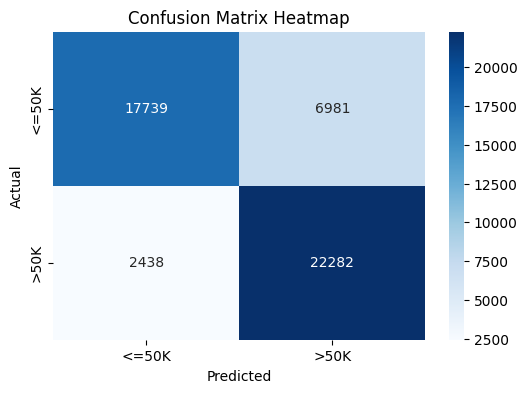

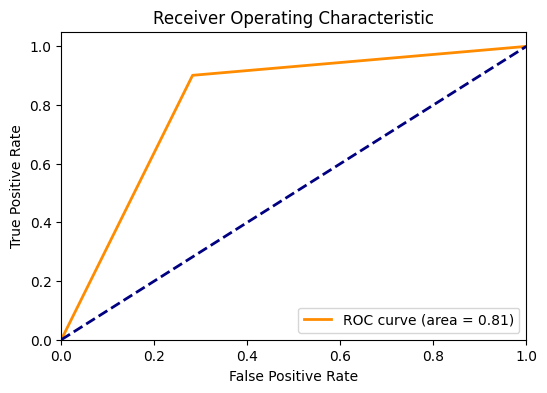

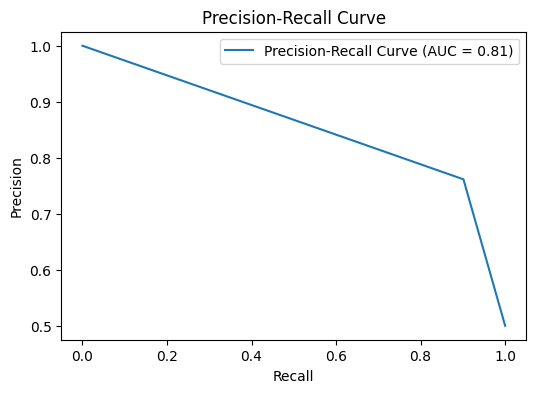

In [ ]:
#TODO
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train_resampled,y_train_resampled)
y_pred_train = svm.predict(X_train_resampled)
y_pred_test = svm.predict(X_test)

accuracy,precision,recall,f1 = evaluate_model(y_train_resampled, y_pred_train)

#### Test


   Accuracy  Precision    Recall  F1 Score
0  0.761563   0.497358  0.881175  0.635835

Confusion Matrix:


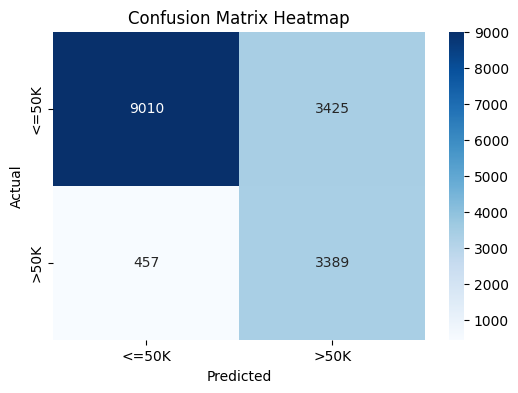

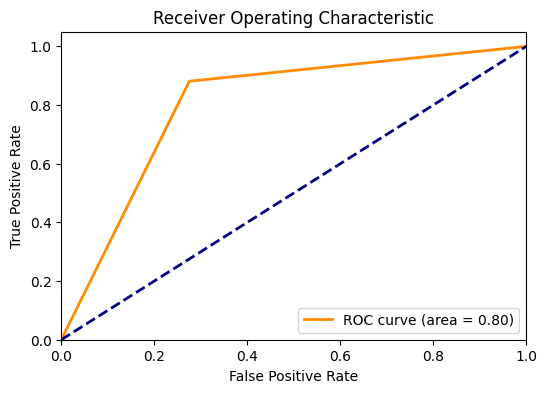

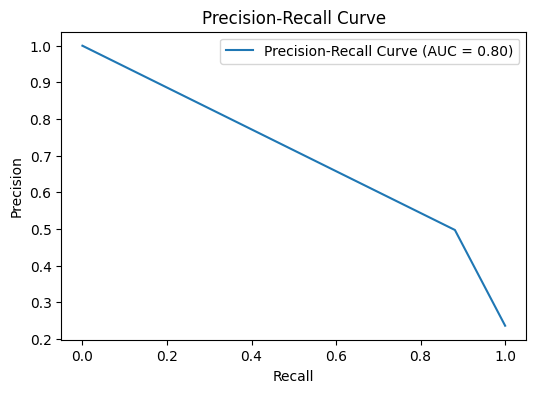

In [ ]:
accuracy,precision,recall,f1 = evaluate_model(y_test, y_pred_test)

if "SVM" not in results:

  results["SVM"] = {
          "Model": "SVM",
          "Train-Type" : "Normal",
          "Accuracy": accuracy,
          "Precision": precision,
          "Recall": recall,
          "F1-score": f1
      }

2. Answer this question:How does SVM handle data that can’t be separated by a straight line?

<b> <font color='red'>Your Answer:</font></b><br>


When data can’t be separated by a straight line (i.e., it's not linearly separable), Support Vector Machines (SVMs) use two main strategies to handle this:

1. **Kernel Trick**

    This is the most powerful and common method.

    SVM uses a kernel function to transform the original data into a higher-dimensional space where a linear separator can exist.

    This transformation is done implicitly, meaning SVM doesn’t actually compute the new coordinates — it just computes dot products in the new space efficiently.

    Popular Kernels:

      * RBF (Radial Basis Function) / Gaussian – great for complex patterns.

      * Polynomial – captures interactions between features.

      * Sigmoid – behaves like a neural network activation.

    Example:
    If the data looks like a circle in 2D and can't be separated linearly, a kernel can project it to 3D where a flat plane can separate the classes.


2. **Soft Margin (Slack Variables)**

    Even after applying a kernel, perfect separation might not be possible due to:

    * Noise

    * Overlapping classes

    SVM allows for some misclassifications by introducing a soft margin, controlled by the C parameter:

    * Low C → allows more misclassification (better generalization).

    * High C → forces strict separation (risk of overfitting).



### 7)Neural Networks (simple MLP for classification)

A Multi-Layer Perceptron (MLP) is a neural network made of layers of connected nodes (neurons). Each neuron takes inputs, applies weights and an activation function, and passes the result to the next layer. It learns by adjusting the weights to reduce prediction error.

 **Your Task**:
1. Implement and train the Neural Networks classifier (simple MLP for classification) on the training dataset.(and then evaluate it on the test dataset)

#### Train

   Accuracy  Precision    Recall  F1 Score
0  0.881513   0.860182  0.911125  0.884921

Confusion Matrix:


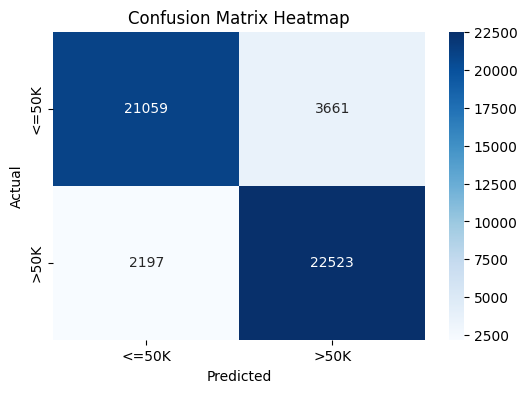

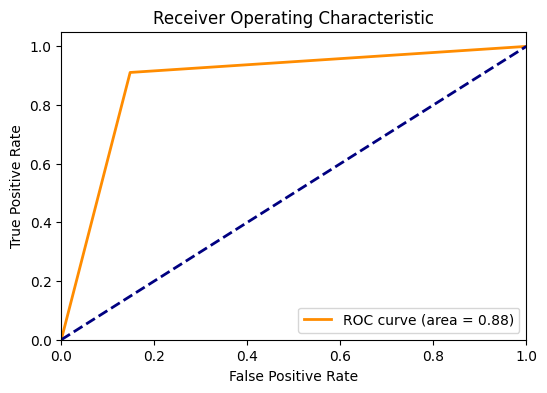

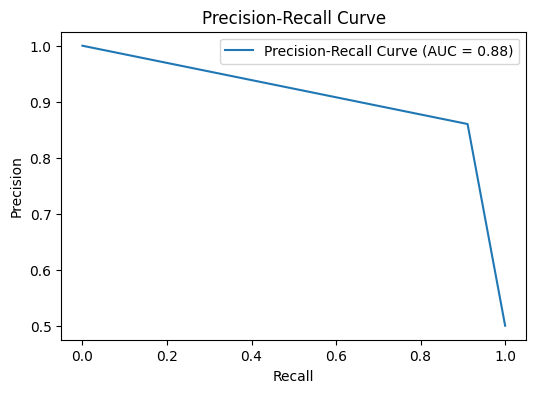

In [ ]:
from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(hidden_layer_sizes=(64, 32),
                    max_iter=1000, random_state=42)

mlp.fit(X_train_resampled, y_train_resampled)
y_pred_train = mlp.predict(X_train_resampled)
y_pred_test = mlp.predict(X_test)

accuracy,precision,recall,f1 = evaluate_model(y_train_resampled, y_pred_train)

#### Test

   Accuracy  Precision    Recall  F1 Score
0  0.819667   0.588971  0.783151  0.672321

Confusion Matrix:


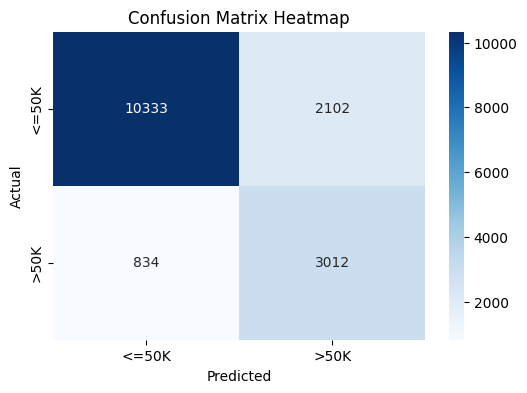

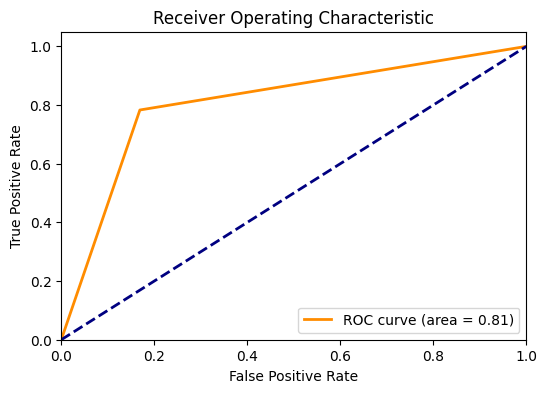

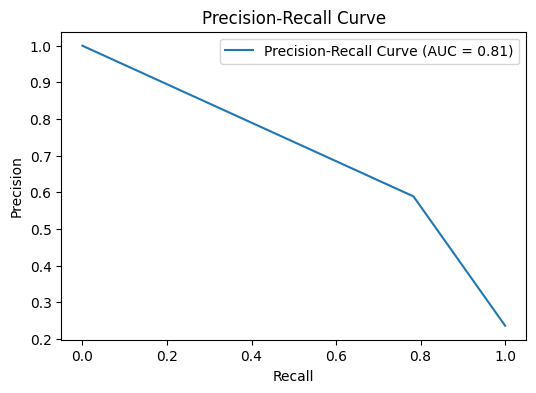

In [ ]:
accuracy,precision,recall,f1 = evaluate_model(y_test, y_pred_test)

if "MLP" not in results:

  results["MLP"] = {
          "Model": "MLP",
          "Train-Type" : "Normal",
          "Accuracy": accuracy,
          "Precision": precision,
          "Recall": recall,
          "F1-score": f1
      }

2. Answer this question:What happens during the learning process in a neural network?

<b> <font color='red'>Your Answer:</font></b><br>


During the learning process in a neural network, the model iteratively adjusts its parameters to minimize the error in its predictions. This process, known as training, involves the following key steps:

1. **Initialization:**

  * The network's weights and biases (parameters) are initialized, typically
    with small random values or using specific initialization techniques (e.g., Xavier or He initialization) to ensure stable learning.


2. **Forward Propagation:**

  * Input data is fed through the network, passing through layers of neurons. Each neuron computes a weighted sum of its inputs, adds a bias, and applies an activation function (e.g., ReLU, sigmoid, or tanh) to introduce non-linearity.

  * The output of the final layer is the model's prediction (e.g., class probabilities for classification or a continuous value for regression).


3. **Loss Calculation:**

  * The difference between the predicted output and the actual target is quantified using a loss function (e.g., mean squared error for regression, cross-entropy for classification).

  * The loss measures how far the model's predictions are from the true values.

4. **Backpropagation:**

  * The error (loss) is propagated backward through the network to compute gradients of the loss function with respect to each weight and bias.

  * This is done using the chain rule to determine how much each parameter contributed to the error.


5. **Parameter Update (Optimization):**

  * An optimization algorithm, typically gradient descent or its variants (e.g., Adam, RMSprop), updates the weights and biases in the direction that reduces the loss.

  * The update rule is: weight = weight - learning_rate * gradient, where the learning rate controls the step size of updates.

  * This step fine-tunes the network to make better predictions.


6. **Iteration:**

  * The process (forward propagation, loss calculation, backpropagation, and parameter update) is repeated for multiple epochs (full passes through the training dataset).

  * Each epoch processes the data in smaller chunks called batches to balance computational efficiency and stable updates.


# Step 12: Hyperparameter Tuning
Once you have selected the models, you will perform **hyperparameter tuning** to optimize their performance. Hyperparameters are settings that are not learned directly from the data and must be set before training. Examples include the number of neighbors in KNN or the depth of trees in decision tree models.

**Overview:**

You are required to implement the following methods for tuning:

- **Grid Search:** Use Grid Search to search for the best combination of hyperparameters by exhaustively trying all possible combinations in the predefined grid.
- **Randomized Search:** This method performs a randomized search over hyperparameters, sampling from specified distributions. It is more efficient than Grid Search when the search space is large.
- **Bayesian Optimization (optional):** Implement Bayesian optimization using libraries like **Optuna** or **Hyperopt**. This method optimizes hyperparameters by considering prior knowledge of the search space and efficiently explores the most promising configurations.


### 1) Grid Search

Grid Search is a method used to find the best combination of hyperparameters by trying out every possible combination from a predefined set of values. For each combination, the model is trained and evaluated, and the one that gives the best result on a validation set is chosen. It helps you systematically explore which settings work best for your model.

**Your Task**:

1.Perform Grid Search on the models.

#### KNN

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters found: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
   Accuracy  Precision    Recall  F1 Score
0  0.789018   0.540334  0.715809  0.615815

Confusion Matrix:


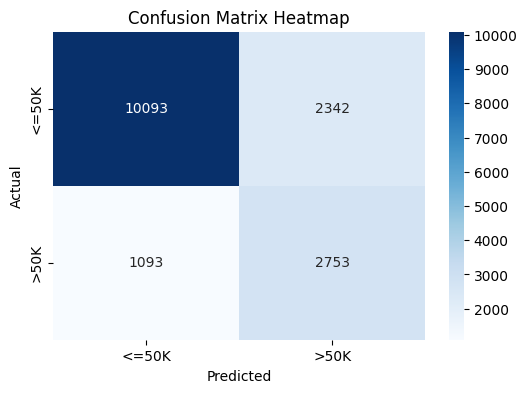

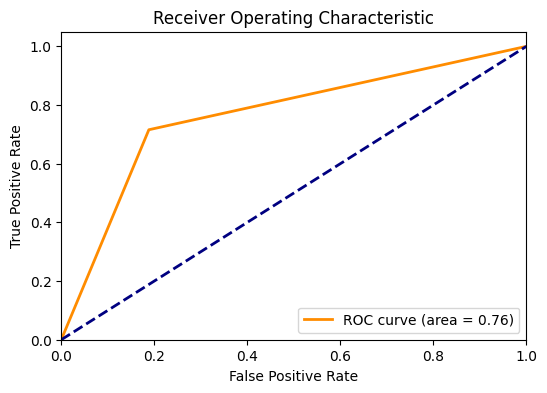

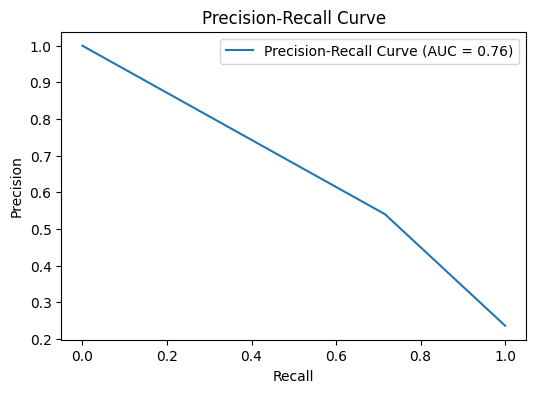

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

## Define the hyperparameter grid

param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform'],
    'metric': ['euclidean']
}

grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,                    # 5-fold cross-validation
    scoring='f1',
    n_jobs=-1,
    verbose=1
)


grid_search.fit(X_train_resampled, y_train_resampled)

best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

print("Best parameters found:", grid_search.best_params_)

accuracy,precision,recall,f1 = evaluate_model(y_test, y_pred)

if "KNN-Grid" not in results:

  results["KNN-Grid"] = {
          "Model": "KNN-Grid",
          "Train-Type" : "Grid-Search",
          "Accuracy": accuracy,
          "Precision": precision,
          "Recall": recall,
          "F1-score": f1
      }



#### Decision Tree

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameters found: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
   Accuracy  Precision    Recall  F1 Score
0  0.804803   0.558067  0.834633  0.668889

Confusion Matrix:


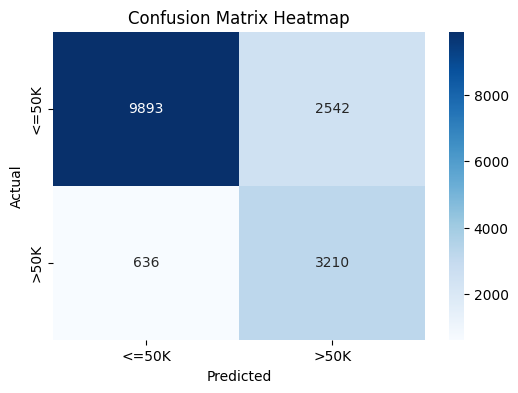

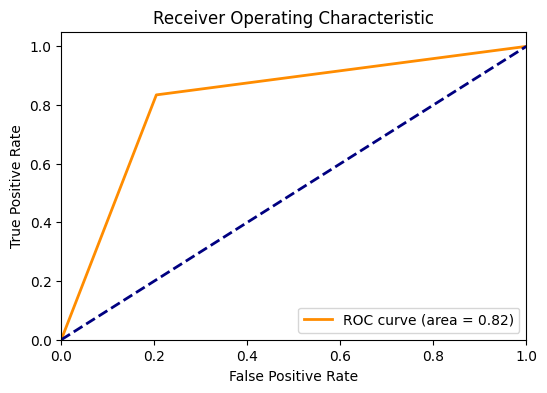

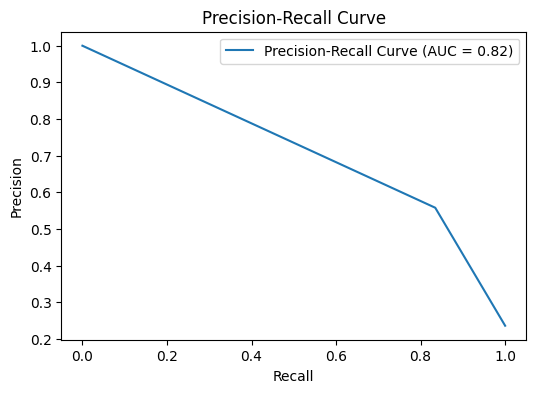

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

## Define the hyperparameter grid
param_grid = {
    "max_depth": [3, 5, 10,20,30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    "criterion": ["gini", "entropy"]
}

dt_grid = GridSearchCV(dt, param_grid, cv=5, scoring='f1', n_jobs=-1,verbose = 2)

dt_grid.fit(X_train_resampled, y_train_resampled)

best_dt = dt_grid.best_estimator_
y_pred = best_dt.predict(X_test)

print("Best parameters found:", dt_grid.best_params_)

accuracy,precision,recall,f1 = evaluate_model(y_test, y_pred)

if "DT-Grid" not in results:

  results["DT-Grid"] = {
          "Model": "DT-Grid",
          "Train-Type" : "Grid-Search",
          "Accuracy": accuracy,
          "Precision": precision,
          "Recall": recall,
          "F1-score": f1
      }


#### Random Forest

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters found: {'max_depth': 10, 'n_estimators': 100}
   Accuracy  Precision    Recall  F1 Score
0  0.800197   0.548742  0.867915  0.672374

Confusion Matrix:


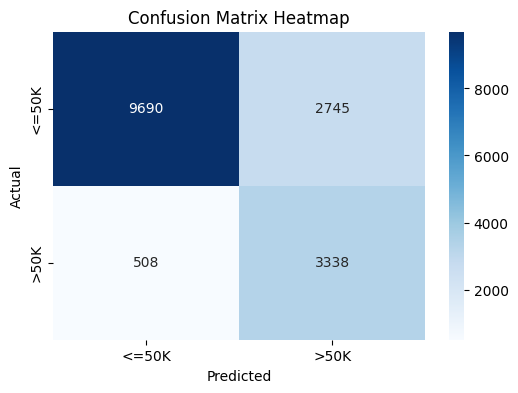

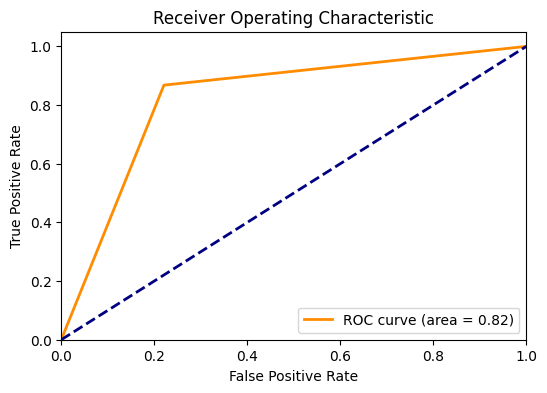

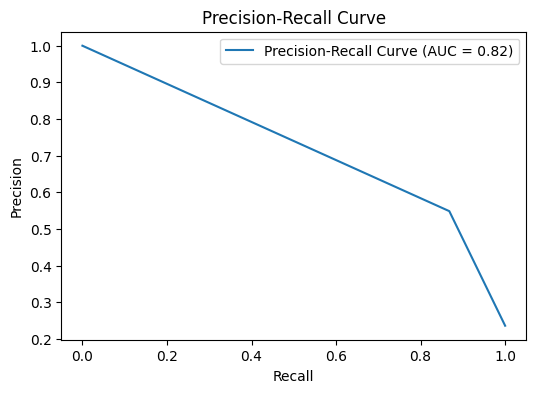

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_grid = RandomForestClassifier()

param_grid = {
    "n_estimators": [20 , 50, 100 , 200],
    "max_depth": [5, 10],

}

grid = GridSearchCV(rf_grid, param_grid, cv = 3, scoring='f1', verbose = 1)
model_grid = grid.fit(X_train_resampled, y_train_resampled)

best_rf = model_grid.best_estimator_
y_pred = best_rf.predict(X_test)

print("Best parameters found:", model_grid.best_params_)

accuracy,precision,recall,f1 = evaluate_model(y_test, y_pred)

if "RF-Grid" not in results:

  results["RF-Grid"] = {
          "Model": "RF-Grid",
          "Train-Type" : "Grid-Search",
          "Accuracy": accuracy,
          "Precision": precision,
          "Recall": recall,
          "F1-score": f1
      }



#### XGBoost

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
   Accuracy  Precision    Recall  F1 Score
0   0.84657   0.640769  0.797712  0.710679

Confusion Matrix:


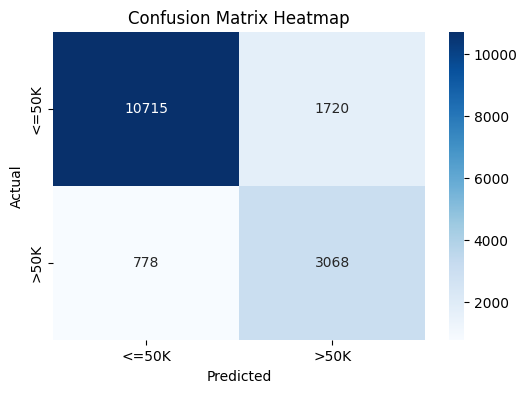

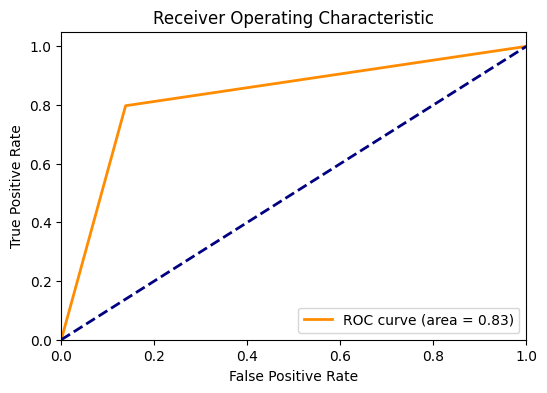

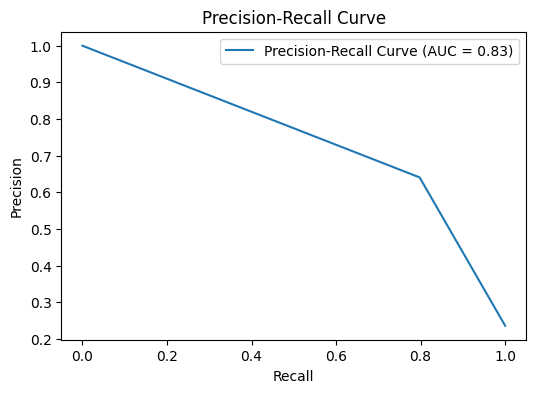

In [ ]:
#TODO
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from xgboost import XGBClassifier


xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train_resampled, y_train_resampled)
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)

# Evaluate on test set
accuracy,precision,recall,f1 = evaluate_model(y_test, y_pred)

if "XGBoost-Grid" not in results:

  results["XGBoost-Grid"] = {
          "Model": "XGBoost-Grid",
          "Train-Type" : "Grid-Search",
          "Accuracy": accuracy,
          "Precision": precision,
          "Recall": recall,
          "F1-score": f1
      }


#### LightGBM

[LightGBM] [Info] Number of positive: 24720, number of negative: 24720
[LightGBM] [Info] Total Bins 1644
[LightGBM] [Info] Number of data points in the train set: 49440, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

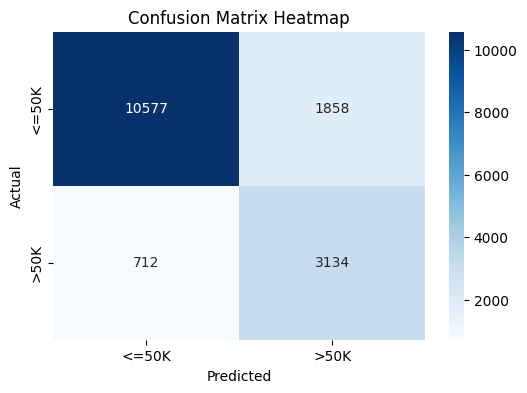

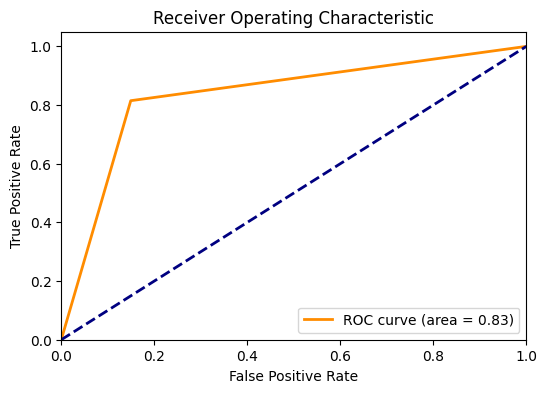

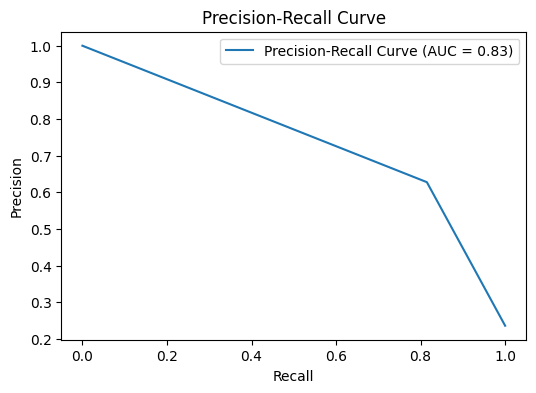

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

lgbm = LGBMClassifier(is_unbalance=True,force_col_wise=True)

param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [3, 5],
    "learning_rate": [0.1, 0.01]
}

lgbm_grid = GridSearchCV(lgbm, param_grid, cv=5, scoring='f1', n_jobs=-1)
lgbm_grid.fit(X_train_resampled, y_train_resampled)

best_lgbm = lgbm_grid.best_estimator_
y_pred = best_lgbm.predict(X_test)

# Best parameters and score
print("Best parameters:", lgbm_grid.best_params_)

# Evaluate on test set
accuracy,precision,recall,f1 = evaluate_model(y_test, y_pred)

if "LightGBM-Grid" not in results:

  results["LightGBM-Grid"] = {
          "Model": "LightGBM-Grid",
          "Train-Type" : "Grid-Search",
          "Accuracy": accuracy,
          "Precision": precision,
          "Recall": recall,
          "F1-score": f1
      }

#### Logistic Regression

Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
   Accuracy  Precision    Recall  F1 Score
0  0.804557    0.55982  0.807852  0.661345

Confusion Matrix:


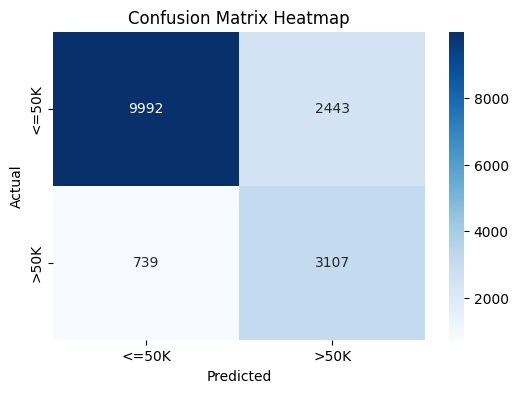

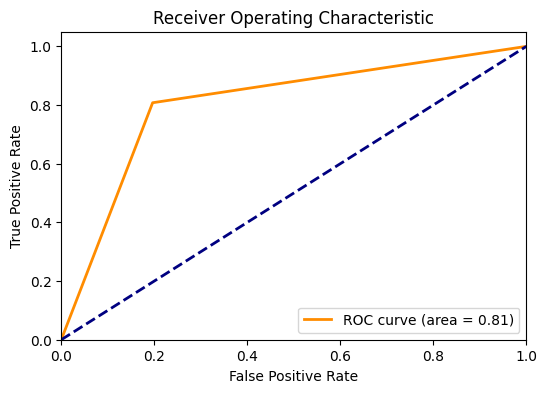

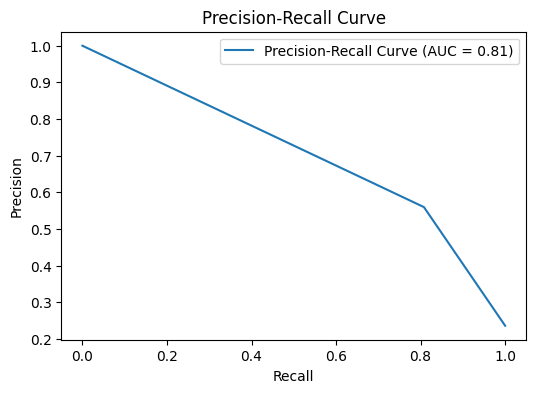

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(max_iter=1000)
param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l2"],
    "solver": ["lbfgs"]
}

lr_grid = GridSearchCV(lr, param_grid, cv=3, scoring='f1', n_jobs=-1)
lr_grid.fit(X_train_resampled, y_train_resampled)

best_lr = lr_grid.best_estimator_
y_pred = best_lr.predict(X_test)

# Best parameters and score
print("Best parameters:", lr_grid.best_params_)

accuracy,precision,recall,f1 = evaluate_model(y_test, y_pred)

if "Logistic-Grid" not in results:

  results["Logistic-Grid"] = {
          "Model": "Logistic-Grid",
          "Train-Type" : "Grid-Search",
          "Accuracy": accuracy,
          "Precision": precision,
          "Recall": recall,
          "F1-score": f1
      }


#### SVM

Best parameters: {'C': 0.1, 'kernel': 'linear'}
   Accuracy  Precision    Recall  F1 Score
0  0.787974   0.532465  0.840094  0.651806

Confusion Matrix:


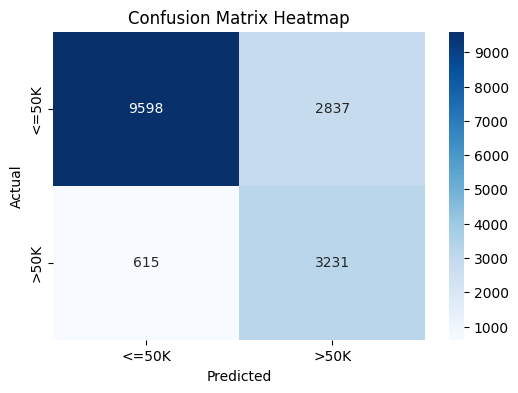

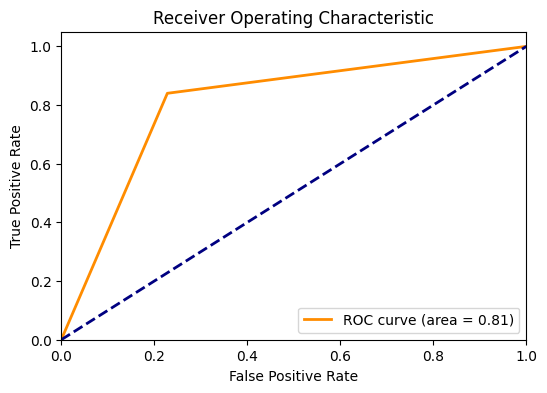

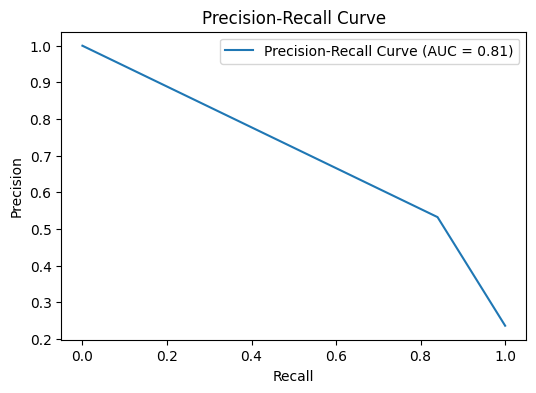

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm = SVC()
param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"]
}

svm_grid = GridSearchCV(svm, param_grid, cv=3, scoring='f1', n_jobs=-1)
svm_grid.fit(X_train_resampled, y_train_resampled)

best_svm = svm_grid.best_estimator_
y_pred = best_svm.predict(X_test)

# Best parameters and score
print("Best parameters:", svm_grid.best_params_)

# Evaluate on test set
accuracy,precision,recall,f1 = evaluate_model(y_test, y_pred)

if "SVM-Grid" not in results:

  results["SVM-Grid"] = {
          "Model": "SVM-Grid",
          "Train-Type" : "Grid-Search",
          "Accuracy": accuracy,
          "Precision": precision,
          "Recall": recall,
          "F1-score": f1
      }


#### MLP

In [ ]:
# MLP Grid search hyperparameter tuning

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

mlp = MLPClassifier(max_iter=1000,random_state=42)

param_grid = {
            'hidden_layer_sizes': [(50,), (100,), (50, 30)],
            'activation': ['relu', 'tanh']
}

grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)

best_mlp = grid_search.best_estimator_
y_pred = best_mlp.predict(X_test)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)

accuracy,precision,recall,f1 = evaluate_model(y_test, y_pred)

if "MLP-Grid" not in results:

  results["MLP-Grid"] = {
          "Model": "MLP-Grid",
          "Train-Type" : "Grid-Search",
          "Accuracy": accuracy,
          "Precision": precision,
          "Recall": recall,
          "F1-score": f1
      }

Fitting 3 folds for each of 6 candidates, totalling 18 fits


KeyboardInterrupt: 

2. Answer this question:Is Grid Search efficient for large search spaces?

<b> <font color='red'>Your Answer:</font></b><br>

Grid Search is not efficient for large search spaces due to its exhaustive nature. Here's why:

1. **Exhaustive Enumeration**:

  * Grid Search evaluates every possible combination of hyperparameters in the specified grid. This scales exponentially with the number of parameters and values, making it computationally expensive for large search spaces.


2. **Computational Cost:**

  * Each combination requires training and evaluating the model (often with cross-validation), which can be time-consuming, especially for complex models (e.g., neural networks) or large datasets. For large search spaces, this can take hours, days, or longer.

3. **Diminishing Returns:**

  * In large search spaces, many hyperparameter combinations may yield similar performance, but Grid Search evaluates them all regardless, wasting resources on marginally different configurations.

4. **Lack of Adaptivity:**

  * Grid Search does not adapt based on intermediate results. It blindly tests all combinations without prioritizing promising regions of the search space

### 2) Randomized Search

Randomized Search selects random combinations of hyperparameters from specified distributions instead of testing every single one. You choose how many random combinations to try, and the best one is picked based on performance. It's useful when you want to sample from a wide space without checking everything.

**Your Task**:

1.Perform Randomized Search on the models.

#### KNN

Best parameters: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
   Accuracy  Precision    Recall  F1 Score
0  0.787544   0.543927  0.622985  0.580778

Confusion Matrix:


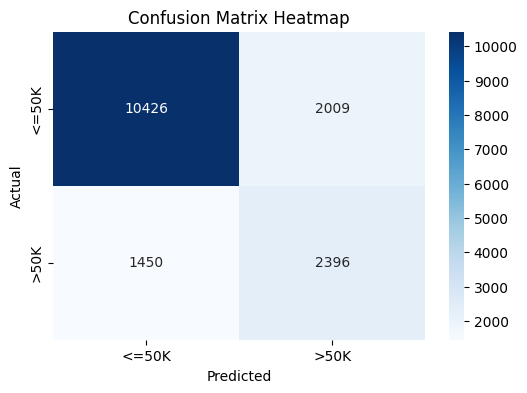

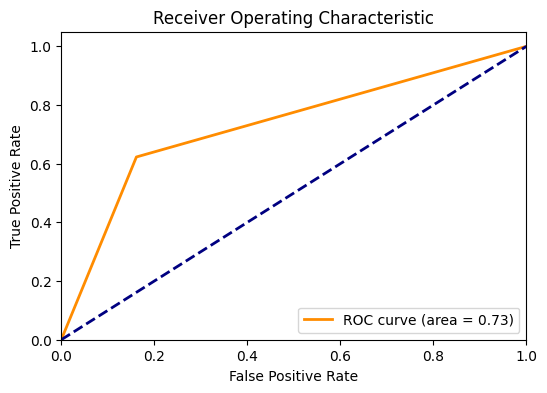

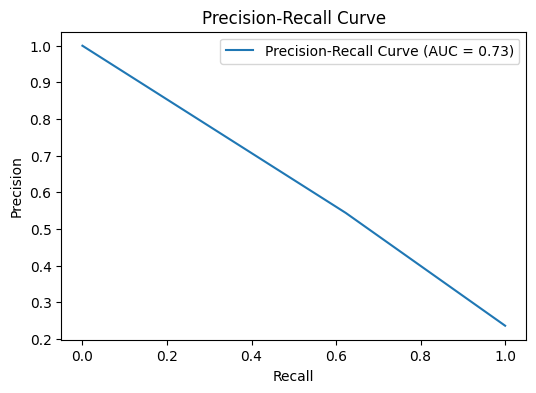

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import classification_report

knn_params = {
    'n_neighbors': randint(1, 30),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_model = KNeighborsClassifier()

knn_random  = RandomizedSearchCV(knn_model, knn_params, n_iter=10, scoring='f1', cv=5, random_state=42)
knn_random.fit(X_train_resampled, y_train_resampled)

best_knn_random = knn_random.best_estimator_
y_pred = best_knn_random.predict(X_test)

# Best parameters and score
print("Best parameters:", knn_random.best_params_)

accuracy,precision,recall,f1 = evaluate_model(y_test, y_pred)

if "KNN-Randomized" not in results:

  results["KNN-Randomized"] = {
          "Model": "KNN-Randomized",
          "Train-Type" : "Randomized-Search",
          "Accuracy": accuracy,
          "Precision": precision,
          "Recall": recall,
          "F1-score": f1
      }



#### Decision Tree

Best parameters: {'criterion': 'gini', 'max_depth': 12, 'min_samples_split': 9}
   Accuracy  Precision    Recall  F1 Score
0  0.813648   0.576633  0.794332  0.668198

Confusion Matrix:


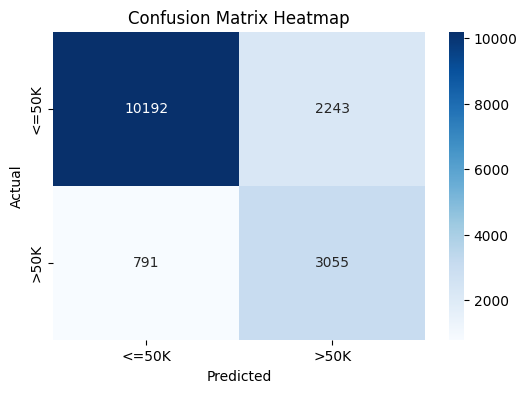

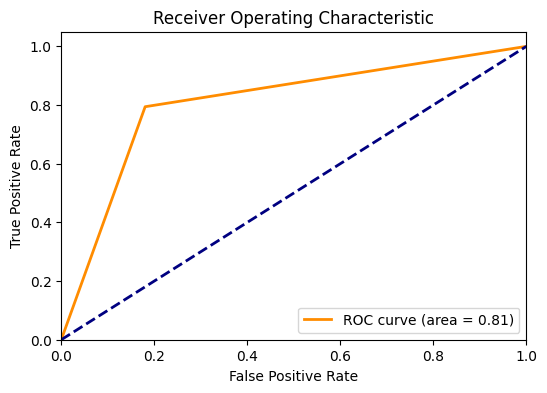

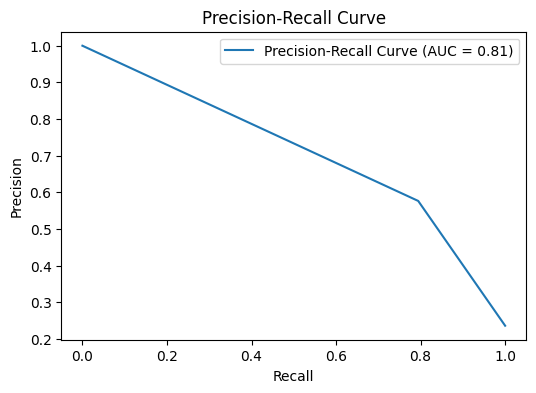

In [ ]:


dt_params = {
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 10),
    'criterion': ['gini', 'entropy'],
}

dt_model = DecisionTreeClassifier()
dt_random_search = RandomizedSearchCV(dt_model, dt_params, n_iter=10, scoring='f1', cv=5, random_state=42)

dt_random_search.fit(X_train_resampled, y_train_resampled)

best_dt_random = dt_random_search.best_estimator_
y_pred = best_dt_random.predict(X_test)

# Best parameters and score
print("Best parameters:", dt_random_search.best_params_)


accuracy,precision,recall,f1 = evaluate_model(y_test, y_pred)

if "DT-Randomized" not in results:

  results["DT-Randomized"] = {
          "Model": "DT-Randomized",
          "Train-Type" : "Randomized-Search",
          "Accuracy": accuracy,
          "Precision": precision,
          "Recall": recall,
          "F1-score": f1
      }


#### Random Forest

Best parameters: {'max_depth': 17, 'min_samples_split': 4, 'n_estimators': 121}
   Accuracy  Precision    Recall  F1 Score
0  0.825195   0.593563  0.824753  0.690316

Confusion Matrix:


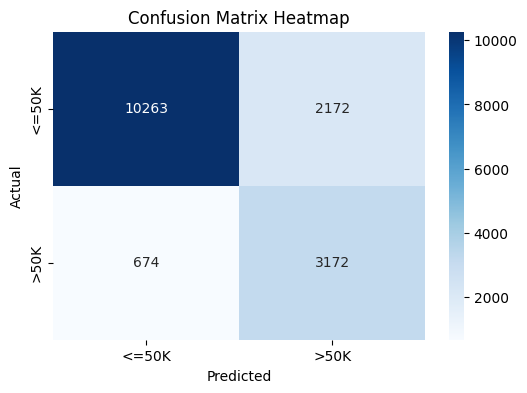

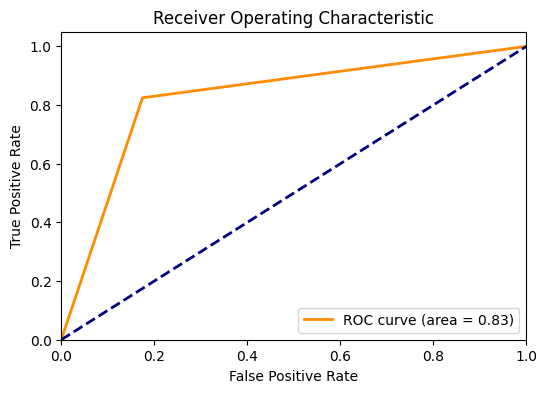

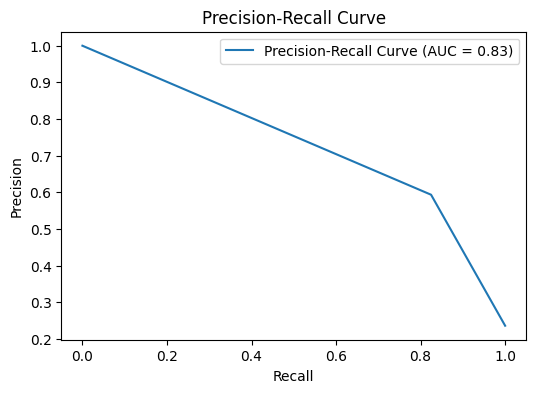

In [ ]:
rf_params = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 10),
}

rf_model = RandomForestClassifier()
rf_random_search = RandomizedSearchCV(rf_model, rf_params, n_iter=10, scoring='f1', cv=5, random_state=42)

rf_random_search.fit(X_train_resampled, y_train_resampled)

best_rf_random = rf_random_search.best_estimator_
y_pred = best_rf_random.predict(X_test)

# Best parameters and score
print("Best parameters:", rf_random_search.best_params_)

accuracy,precision,recall,f1 = evaluate_model(y_test, y_pred)

if "RF-Randomized" not in results:

  results["RF-Randomized"] = {
          "Model": "RF-Randomized",
          "Train-Type" : "Randomized-Search",
          "Accuracy": accuracy,
          "Precision": precision,
          "Recall": recall,
          "F1-score": f1
      }


#### XGBoost

Best parameters: {'learning_rate': np.float64(0.12236203565420874), 'max_depth': 13, 'n_estimators': 121, 'subsample': np.float64(0.7993292420985183)}
   Accuracy  Precision    Recall  F1 Score
0  0.854739   0.682885  0.718929  0.700443

Confusion Matrix:


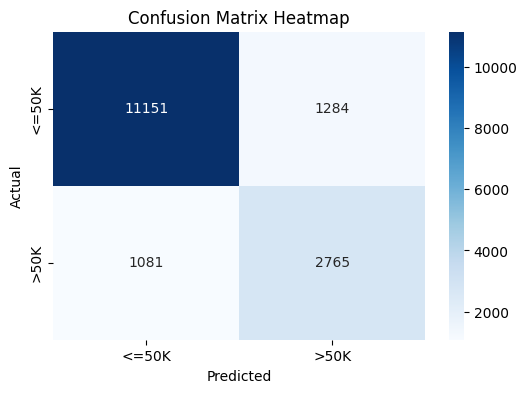

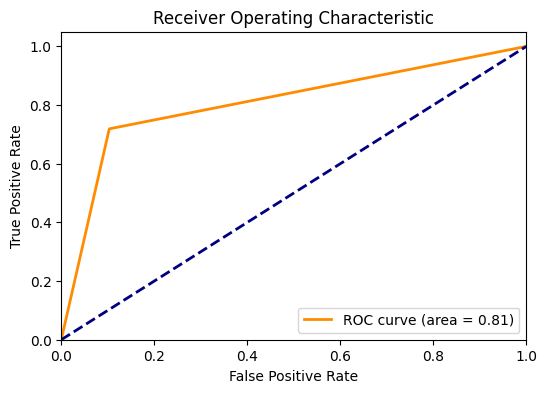

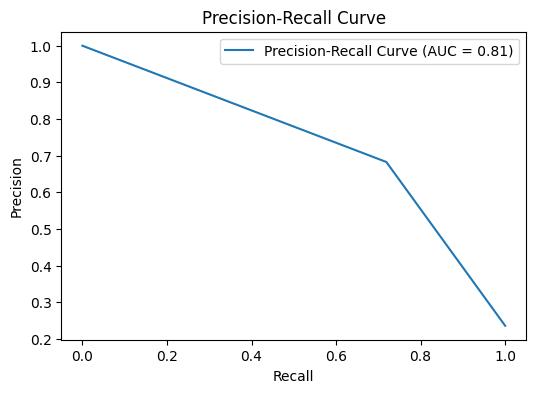

In [ ]:
from scipy.stats import randint, uniform
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

xgb_params = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 15),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.5, 0.5),
}

xgb_model = XGBClassifier(eval_metric='logloss')
xgb_random_search = RandomizedSearchCV(xgb_model, xgb_params, n_iter=10, scoring='f1', cv=5, random_state=42)

xgb_random_search.fit(X_train_resampled, y_train_resampled)

best_xgb_random = xgb_random_search.best_estimator_
y_pred = best_xgb_random.predict(X_test)

# Best parameters and score
print("Best parameters:", xgb_random_search.best_params_)

accuracy,precision,recall,f1 = evaluate_model(y_test, y_pred)

if "XGBoost-Randomized" not in results:

  results["XGBoost-Randomized"] = {
          "Model": "XGBoost-Randomized",
          "Train-Type" : "Randomized-Search",
          "Accuracy": accuracy,
          "Precision": precision,
          "Recall": recall,
          "F1-score": f1
      }


#### LightGBM

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[LightGBM] [Info] Number of positive: 24720, number of negative: 24720
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1644
[LightGBM] [Info] Number of data points in the train set: 49440, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best parameters: {'colsample_bytree': np.float64(0.8254442364744264), 'learning_rate': np.float64(0.02692347370813008), 'max_depth': 10, 'n_estimators': 285, 'num_leaves': 57, 'subsample': np.float64(0.5003893829205072)}
   Accuracy  Precision    Recall  F1 Score
0  0.852527   0.660377  0.773531   0.71249

Confusion Matrix:


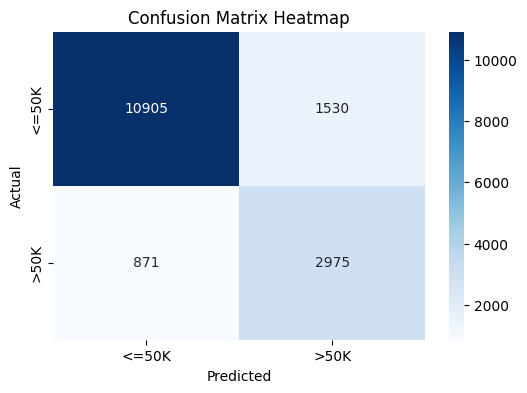

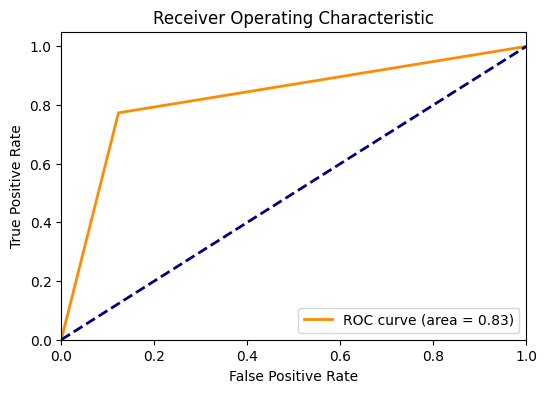

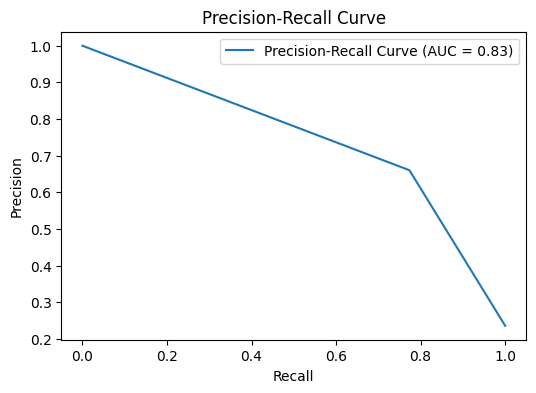

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

lgbm = LGBMClassifier()

param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 12),
    'learning_rate': uniform(0.01, 0.3),
    'num_leaves': randint(20, 150),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5)
}

random_search = RandomizedSearchCV(lgbm,param_dist,n_iter=3,scoring='f1',cv=5,verbose=1,random_state=42,n_jobs=-1)
random_search.fit(X_train_resampled, y_train_resampled)

best_lgbm_random = random_search.best_estimator_
y_pred = best_lgbm_random.predict(X_test)

# Best parameters and score
print("Best parameters:", random_search.best_params_)

accuracy,precision,recall,f1 = evaluate_model(y_test, y_pred)

if "LightGBM-Randomized" not in results:

  results["LightGBM-Randomized"] = {
          "Model": "LightGBM-Randomized",
          "Train-Type" : "Randomized-Search",
          "Accuracy": accuracy,
          "Precision": precision,
          "Recall": recall,
          "F1-score": f1
      }

#### Logistic Regresion

Best parameters: {'C': np.float64(7.090725777960454), 'max_iter': 200, 'penalty': 'l2', 'solver': 'saga'}
   Accuracy  Precision    Recall  F1 Score
0  0.805602    0.56183  0.804472  0.661606

Confusion Matrix:


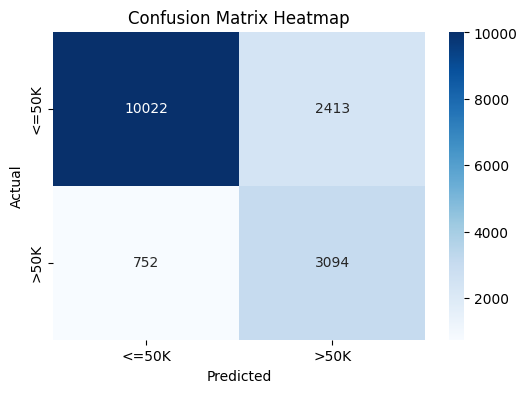

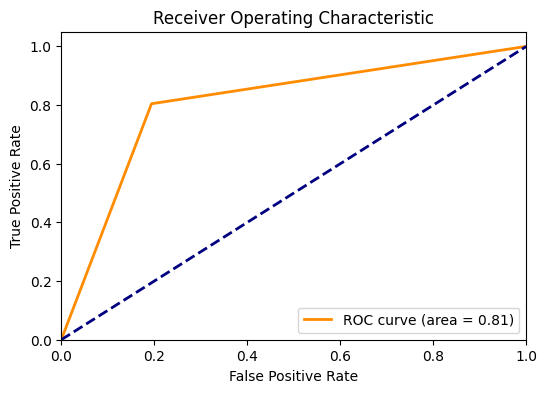

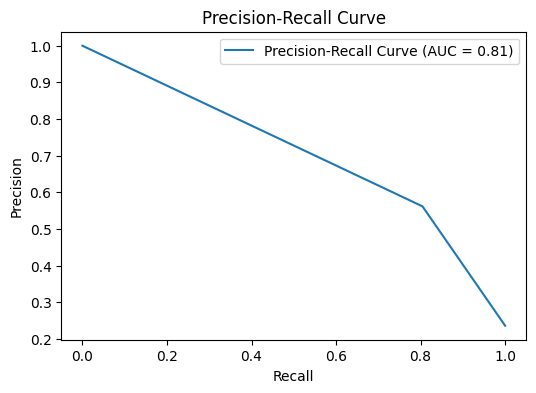

In [ ]:
from sklearn.linear_model import LogisticRegression
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

lr_params = {
    'C': uniform(0.01, 10),
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga'],
    'max_iter': [200],
}
lr_model = LogisticRegression()
lr_random_search = RandomizedSearchCV(lr_model, lr_params, n_iter=10, scoring='f1', cv=5, random_state=42)

lr_random_search.fit(X_train_resampled, y_train_resampled)

best_lr_random = lr_random_search.best_estimator_
y_pred = best_lr_random.predict(X_test)

# Best parameters and score
print("Best parameters:", lr_random_search.best_params_)

accuracy,precision,recall,f1 = evaluate_model(y_test, y_pred)

if "Logistic-Randomized" not in results:

  results["Logistic-Randomized"] = {
          "Model": "Logistic-Randomized",
          "Train-Type" : "Randomized-Search",
          "Accuracy": accuracy,
          "Precision": precision,
          "Recall": recall,
          "F1-score": f1
      }

#### SVM

In [ ]:
from sklearn.svm import SVC

svm_params = {
    'C': uniform(0.1, 10),
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
}


svm_model = SVC()
svm_random_search = RandomizedSearchCV(svm_model, svm_params, n_iter=10, scoring='f1', cv=5, random_state=42)

svm_random_search.fit(X_train_resampled, y_train_resampled)

best_svm_random = svm_random_search.best_estimator_
y_pred = best_svm_random.predict(X_test)

# Best parameters and score
print("Best parameters:", svm_random_search.best_params_)

accuracy,precision,recall,f1 = evaluate_model(y_test, y_pred)

if "SVM-Randomized" not in results:

  results["SVM-Randomized"] = {
          "Model": "SVM-Randomized",
          "Train-Type" : "Randomized-Search",
          "Accuracy": accuracy,
          "Precision": precision,
          "Recall": recall,
          "F1-score": f1
      }

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-155-82d6e81cbdd7>", line 13, in <cell line: 0>
    svm_random_search.fit(X_train_resampled, y_train_resampled)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py", line 1024, in fit
    self._run_search(evaluate_candidates)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py", line 1951, in _run_search
    evaluate_candidates(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py", line 970, in evaluate_candidates
    out = parallel(
          ^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packa

TypeError: object of type 'NoneType' has no len()

2. Answer this question:What’s the main difference from Grid Search?

<b> <font color='red'>Your Answer:</font></b><br>

The main difference between **Randomized Search** and **Grid Search** lies in their approach to exploring the hyperparameter space:

- **Grid Search**:
  - **Exhaustive Search**: Evaluates **all possible combinations** of hyperparameters specified in a predefined grid.
  - **Example**: For 3 parameters with 5 values each, it tests \(5 * 5 * 5 = 125\) combinations.
  - **Pros**: Guarantees finding the best combination within the grid.
  - **Cons**: Computationally expensive, especially for large search spaces, as the number of combinations grows exponentially.

- **Randomized Search**:
  - **Random Sampling**: Samples a **fixed number of random combinations** (`n_iter`) from the parameter space, which can include continuous or discrete distributions.
  - **Example**: For the same 3 parameters, you might test only 20 random combinations, regardless of the total possible combinations.
  - **Pros**: Much faster for large search spaces, often finds near-optimal parameters with fewer trials, and allows flexible parameter distributions
  - **Cons**: May miss the absolute best combination since it doesn’t evaluate all possibilities.

**Key Difference**: Grid Search is exhaustive and tests every combination, while Randomized Search randomly samples a subset of combinations, making it more efficient for large or complex hyperparameter spaces.


### 3) Bayesian Optimization (optional, e.g., with libraries like Optuna or Hyperopt)

Bayesian Optimization is a smarter way of tuning hyperparameters. It builds a model of the performance (objective function) based on past results and decides which hyperparameters to try next by predicting which ones might work better. Libraries like Optuna or Hyperopt help automate this process.

In [ ]:
!pip install scikit-optimize


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 5.0 MB/s eta 0:00:00


Best parameters: OrderedDict([('colsample_bytree', 1.0), ('learning_rate', 0.07675164793656461), ('max_depth', 10), ('n_estimators', 211), ('subsample', 1.0)])
   Accuracy  Precision   Recall  F1 Score
0    0.8591   0.683192  0.75247  0.716159

Confusion Matrix:


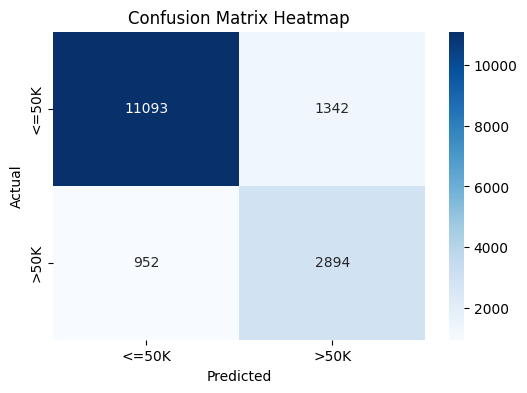

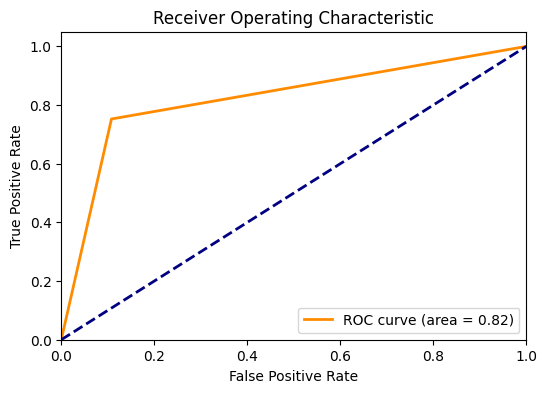

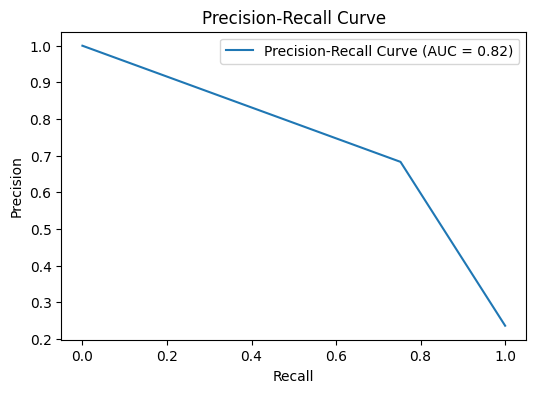

In [ ]:
from xgboost import XGBClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Integer

# Define search space
search_space = {
    'n_estimators': Integer(50, 300),
    'max_depth': Integer(3, 10),
    'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'subsample': Real(0.5, 1.0),
    'colsample_bytree': Real(0.5, 1.0),
}

# Define model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Setup BayesSearchCV
opt = BayesSearchCV(
    estimator=xgb,
    search_spaces=search_space,
    n_iter=20,
    scoring='f1',
    cv=5,
    random_state=42,
    n_jobs=-1
)

# Fit to training data
opt.fit(X_train_resampled, y_train_resampled)

best_xgb_bayesian = opt.best_estimator_
y_pred = best_xgb_bayesian.predict(X_test)

# Best parameters and score
print("Best parameters:", opt.best_params_)

accuracy,precision,recall,f1 = evaluate_model(y_test, y_pred)

if "XGBoost-Bayesian" not in results:

  results["XGBoost-Bayesian"] = {
          "Model": "XGBoost-Bayesian",
          "Train-Type" : "Bayesian-Optimization",
          "Accuracy": accuracy,
          "Precision": precision,
          "Recall": recall,
          "F1-score": f1
      }

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91     12435
           1       0.68      0.75      0.72      3846

    accuracy                           0.86     16281
   macro avg       0.80      0.82      0.81     16281
weighted avg       0.86      0.86      0.86     16281



2. Answer this question:What makes Bayesian Optimization smart?

<b> <font color='red'>Your Answer:</font></b><br>

Bayesian Optimization is considered **smart** because it intelligently balances **exploration** (trying new regions) and **exploitation** (focusing on the best-known regions) when searching for optimal hyperparameters.

---

**Why It's Smart**:

1. **Uses a Probabilistic Model**

It builds a **surrogate model** (usually Gaussian Process or Tree-structured Parzen Estimator) of the objective function (e.g., F1 score), which predicts both:

* the **expected value** of the score
* the **uncertainty** of that prediction

This allows it to make informed decisions about **where to search next**.

---

2. **Acquisition Function**

It uses an **acquisition function** (like Expected Improvement or UCB) to decide where to sample next. This function:

* Favors regions with **high predicted score**
* Also favors regions with **high uncertainty**

This tradeoff is what makes it efficient.

---

3. **Learns from the Past**

Every new sample **updates the model**, making future decisions smarter. It avoids wasting time testing areas that are already known to perform poorly.

---


Bayesian Optimization is smart because it **models what it doesn’t know**, and it updates its strategy as it learns more. This makes it **much faster and more efficient** than blindly trying combinations.


# Step 13:Evaluation
This part of the project focuses on assessing the performance of the trained models. It involves comparing the model's predictions with the actual outcomes from the test dataset. This step helps determine how well each model generalizes to unseen data.

**Your Task**:

1.Answer this question: What are the formulas for Accuracy, Precision, Recall, F1-score?

<b> <font color='red'>Your Answer:</font></b><br>



1. **Accuracy** : Proportion of correct predictions (both positive and negative)



$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$



---


2. **Precision** : How many predicted positives are actually positive:

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

---

3. **Recall** : How many actual positives are correctly identified:

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

---

4. F1-Score
Harmonic mean of Precision and Recall (balances both):

$$
\text{F1-score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$



2.Answer this question: What are the ROC Curve & AUC curve?

<b> <font color='red'>Your Answer:</font></b><br>

**ROC Curve (Receiver Operating Characteristic Curve)** :

The ROC curve is a graphical plot that illustrates a binary classifier's performance by plotting the True Positive Rate (TPR) (also called Sensitivity or Recall)  (fraction of positive instances correctly classified) against the False Positive Rate (FPR)   (fraction of negative instances incorrectly classified as positive) at various classification thresholds.



---


$$
\text{TPR} = \frac{True Positives}{True Positives + False Negatives}
$$


$$
\text{FPR} = \frac{False Positives}{False Positives + True Negatives}
$$



---



The classifier outputs a probability or score for each instance. By varying the threshold for classifying an instance as positive (e.g., from 0 to 1), you get different TPR and FPR values.
Each point on the ROC curve represents a (FPR, TPR) pair for a specific threshold.

The curve starts at (0,0) (no positives predicted) and ends at (1,1) (all positives predicted).
A curve closer to the top-left corner indicates better performance, as it reflects high TPR with low FPR.
A diagonal line (from (0,0) to (1,1)) represents a random classifier (no discriminative power).


---

**AUC (Area Under the ROC Curve)** :

AUC is a single scalar value summarizing the overall performance of the classifier. It represents the area under the ROC curve, ranging from 0 to 1


* AUC = 1: Perfect classifier (perfect separation of classes).
* AUC = 0.5: Random classifier (no better than guessing).
* AUC < 0.5: Worse than random (rare, indicates the model is systematically wrong).

* Higher AUC values indicate better model performance across all thresholds.

3.Answer this question: What is a Confusion Matrix?

<b> <font color='red'>Your Answer:</font></b><br>

A Confusion Matrix is a table used to evaluate the performance of a classification model, especially for binary or multi-class classification tasks. It shows the counts of correct and incorrect predictions compared to the actual labels.



---


**Confusion Matrix (Binary Classification)**


|                     | Predicted Positive  | Predicted Negative  |
| ------------------- | ------------------- | ------------------- |
| **Actual Positive** | True Positive (TP)  | False Negative (FN) |
| **Actual Negative** | False Positive (FP) | True Negative (TN)  |



---


**Definitions:**

* True Positive (TP): Model correctly predicts positive

* True Negative (TN): Model correctly predicts negative

* False Positive (FP): Model predicts positive, but it’s actually negative (Type I error)

* False Negative (FN): Model predicts negative, but it’s actually positive (Type II error)


# Step 14: Cross-Validation (Optional)
To ensure the models generalize well to unseen data, you will use **cross-validation**. This technique splits the dataset into multiple subsets (folds), and each model is trained on different combinations of training and validation sets. This will give you a more robust estimate of the model's performance.

**"Note: You should implement cross-validation for only one model."**

In [ ]:
#TODO

from sklearn.model_selection import cross_val_score, KFold
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(best_xgb_bayesian, X_train_resampled, y_train_resampled, cv=kf)

print("Cross-Validation Results (Accuracy):")

for i, result in enumerate(cross_val_results, 1):
    print(f"  Fold {i}: {result * 100:.2f}%")

print(f'Mean Accuracy: {cross_val_results.mean()* 100:.2f}%')


Cross-Validation Results (Accuracy):
  Fold 1: 89.82%
  Fold 2: 89.61%
  Fold 3: 89.83%
  Fold 4: 90.00%
  Fold 5: 89.80%
Mean Accuracy: 89.81%


In [ ]:
from sklearn.metrics import classification_report

y_pred = best_xgb_bayesian.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91     12435
           1       0.68      0.75      0.72      3846

    accuracy                           0.86     16281
   macro avg       0.80      0.82      0.81     16281
weighted avg       0.86      0.86      0.86     16281



   Accuracy  Precision    Recall  F1 Score
0    0.8591    0.75247  0.683192  0.716159

Confusion Matrix:


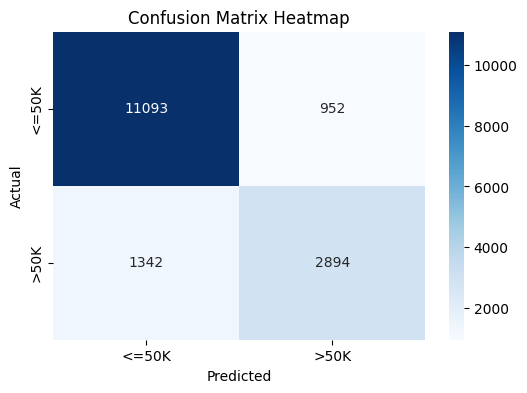

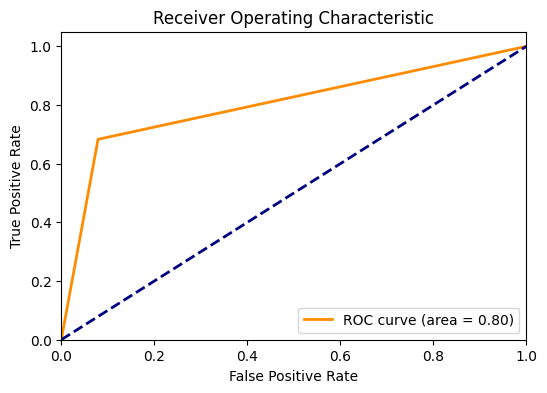

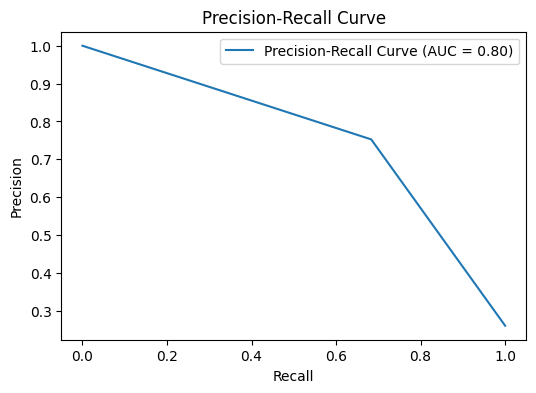

(0.8590995639088508,
 0.7524700988039521,
 0.6831916902738433,
 0.7161593664934423)

In [ ]:
evaluate_model(y_pred,y_test)

# Step 15: Model Comparison
After evaluating all the models, you will compare them based on their performance metrics. The goal is to select the best model that performs well across multiple metrics and generalizes effectively to unseen data.

(Optional) you should apply **statistical tests** (such as **McNemar’s test**) to assess whether differences between model performances are statistically significant. This will help ensure the selection of the optimal model is based on solid evidence.

In [ ]:
results_df = pd.DataFrame.from_dict(results, orient="index").reset_index()
results_df = results_df.rename(columns={"index": "Model"})
results_df = results_df.sort_values(by="F1-score", ascending=False)
results_df = results_df.loc[:, ~results_df.columns.duplicated()].reset_index(drop=True)

results_df

Model             Train-Type  Accuracy  Precision    Recall  \
0      XGBoost-Bayesian  Bayesian-Optimization  0.859100   0.683192  0.752470   
1   LightGBM-Randomized      Randomized-Search  0.852527   0.660377  0.773531   
2          XGBoost-Grid            Grid-Search  0.846570   0.640769  0.797712   
3               XGBoost                 Normal  0.854800   0.671369  0.754810   
4              LightGBM                 Normal  0.856643   0.679572  0.743890   
5         LightGBM-Grid            Grid-Search  0.842147   0.627804  0.814873   
6    XGBoost-Randomized      Randomized-Search  0.854739   0.682885  0.718929   
7         RF-Randomized      Randomized-Search  0.825195   0.593563  0.824753   
8                    RF                 Normal  0.840919   0.651398  0.702548   
9               RF-Grid            Grid-Search  0.800197   0.548742  0.867915   
10                  MLP                 Normal  0.819667   0.588971  0.783151   
11              DT-Grid            Grid-Search  0.804803   0.558067  0.834633   
12        DT-Randomized      Randomized-Search  0.813648   0.576633  0.794332   
13  Logistic-Randomized      Randomized-Search  0.805602   0.561830  0.804472   
14        Logistic-Grid            Grid-Search  0.804557   0.559820  0.807852   
15             Logistic                 Normal  0.801179   0.553713  0.816173   
16             SVM-Grid            Grid-Search  0.787974   0.532465  0.840094   
17                  SVM                 Normal  0.761563   0.497358  0.881175   
18                  KNN                 Normal  0.786991   0.533546  0.781591   
19             KNN-Grid            Grid-Search  0.789018   0.540334  0.715809   
20                   DT                 Normal  0.801486   0.572133  0.633125   
21       KNN-Randomized      Randomized-Search  0.787544   0.543927  0.622985   

    F1-score  
0   0.716159  
1   0.712490  
2   0.710679  
3   0.710649  
4   0.710278  
5   0.709210  
6   0.700443  
7   0.690316  
8   0.676007  
9   0.672374  
10  0.672321  
11  0.668889  
12  0.668198  
13  0.661606  
14  0.661345  
15  0.659800  
16  0.651806  
17  0.635835  
18  0.634177  
19  0.615815  
20  0.601086  
21  0.580778

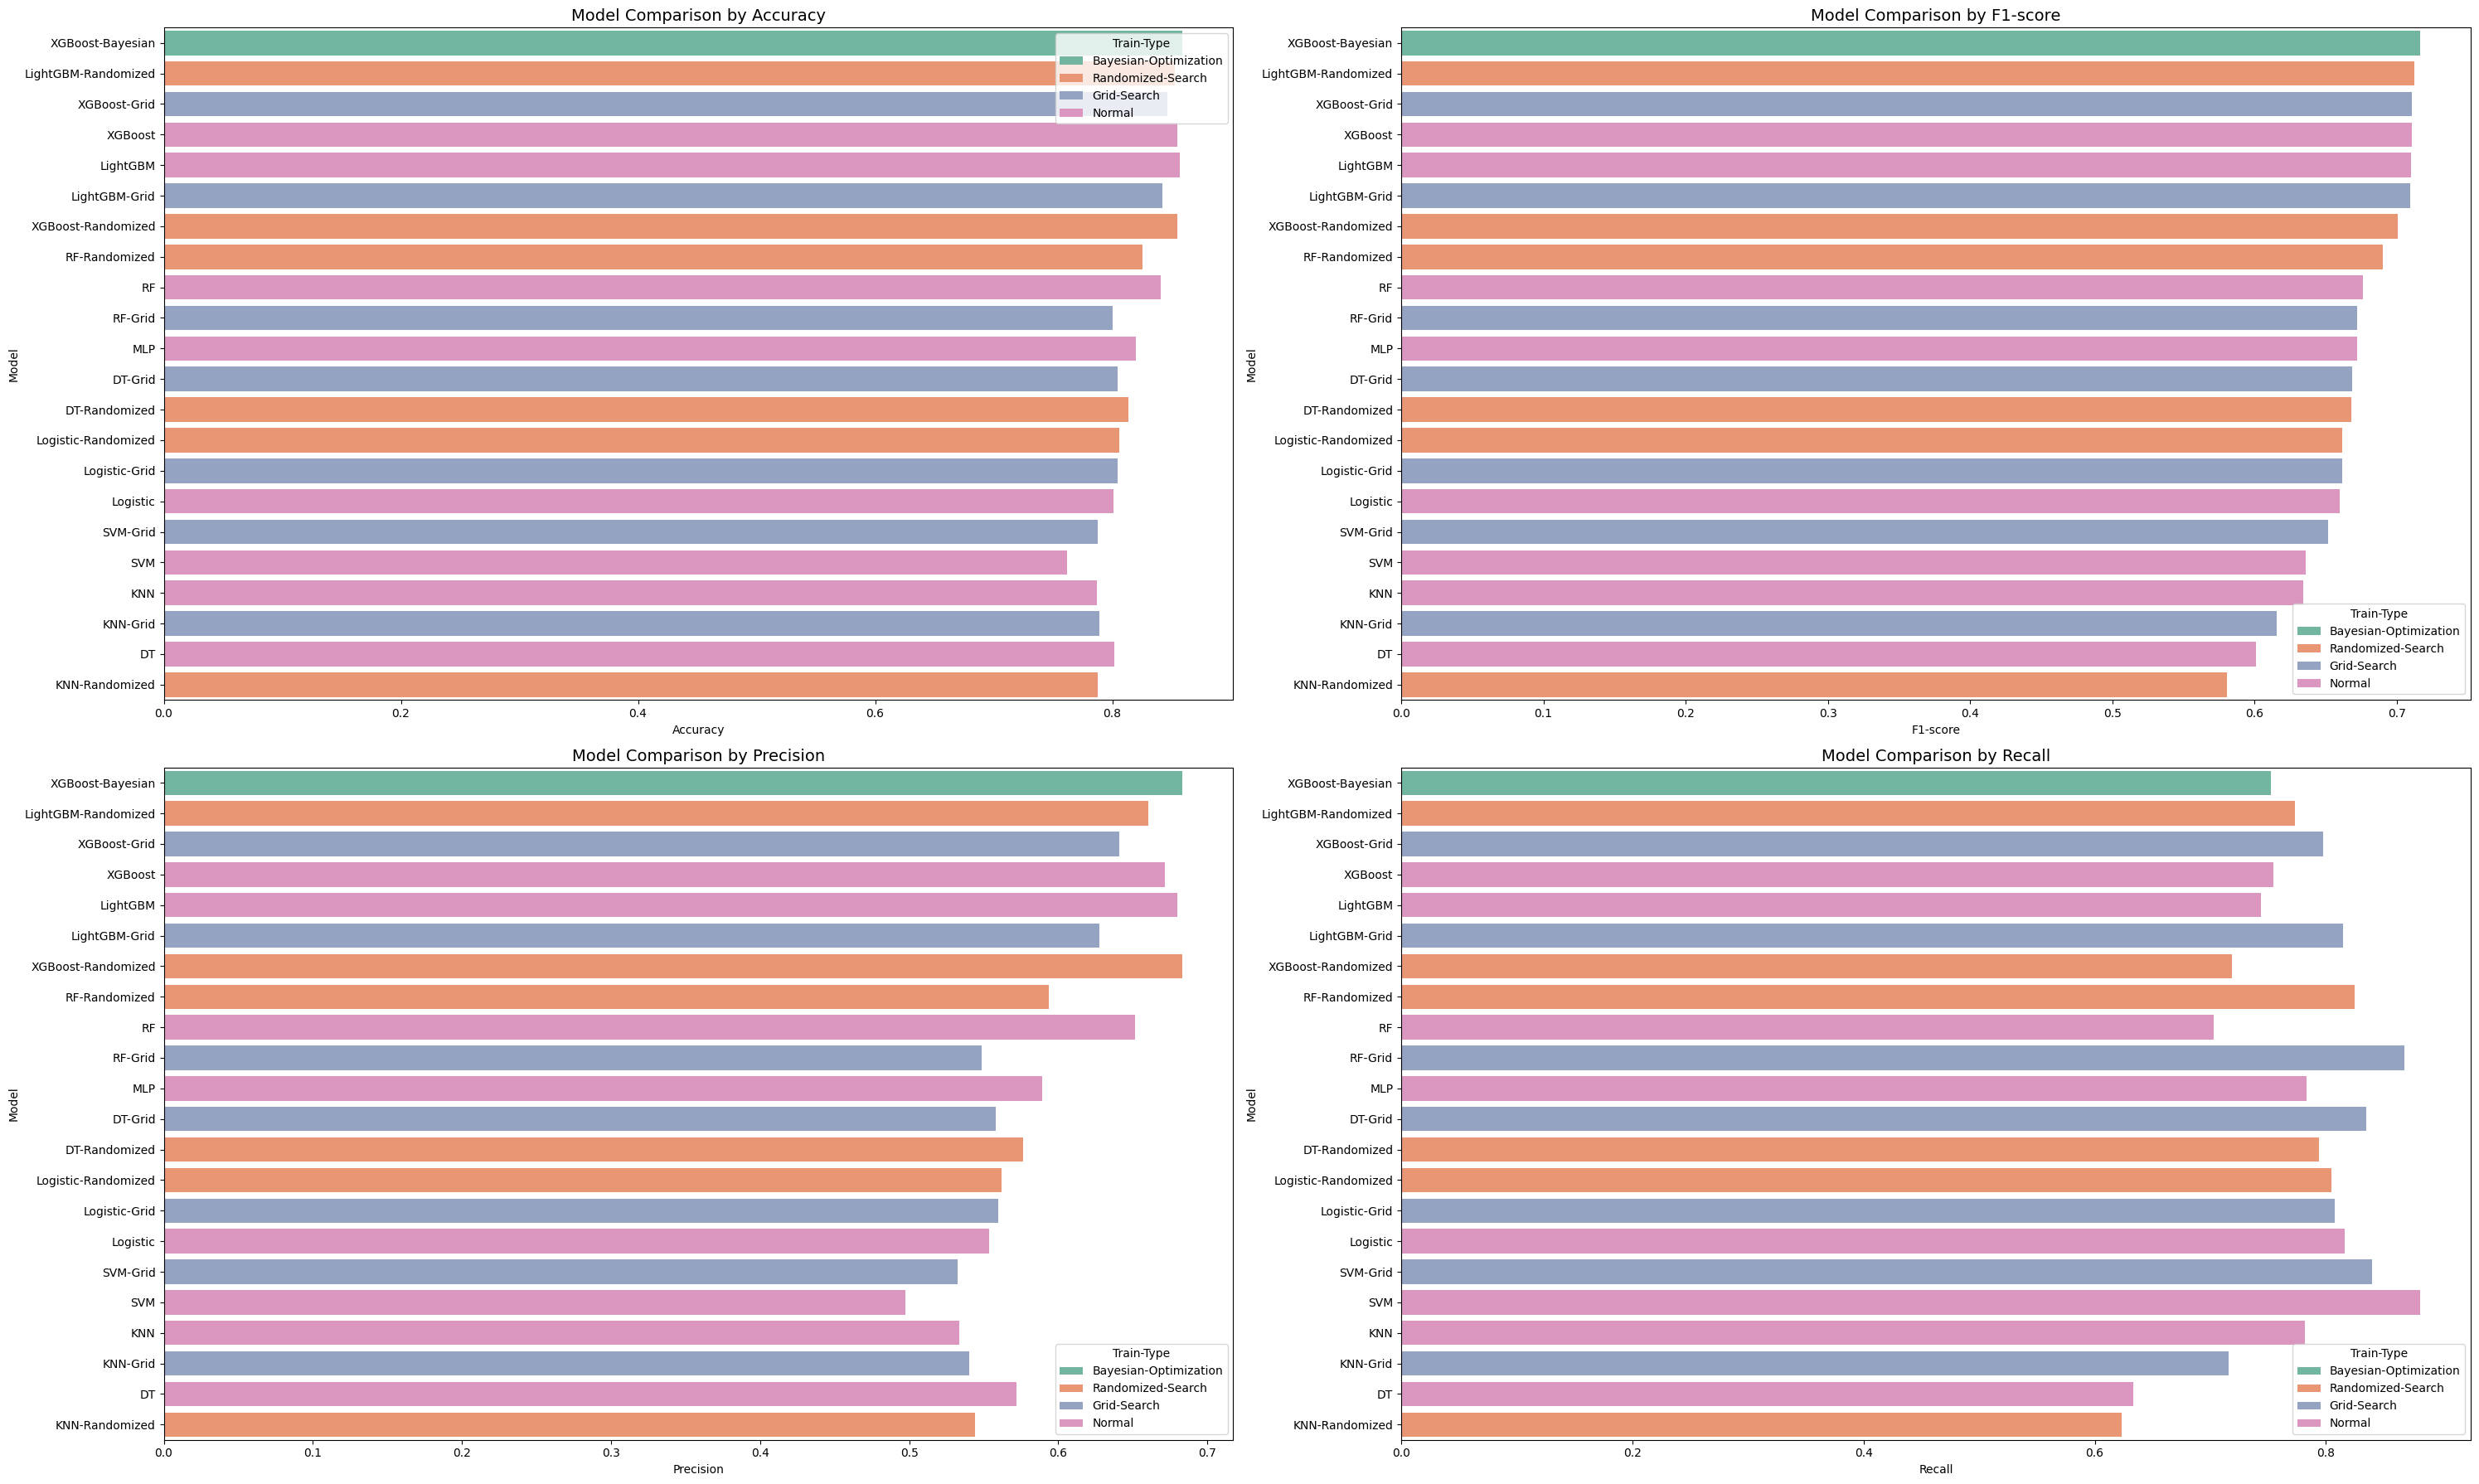

In [ ]:
metrics = ['Accuracy', 'F1-score', 'Precision', 'Recall']
fig, axes = plt.subplots(2, 2, figsize=(30, 18))

for ax, metric in zip(axes.flat, metrics):
    sns.barplot(data=results_df, y='Model', x=metric, hue='Train-Type', dodge=False, palette="Set2", ax=ax)
    ax.set_title(f'Model Comparison by {metric}', fontsize=14)
    ax.set_xlabel(metric)
    ax.set_ylabel("Model")

plt.tight_layout()
plt.show()


## Step 17: Conclusion
At the end of this step, you will identify the best-performing model based on the evaluation metrics. You should then decide if further improvements (e.g., feature engineering, model ensembling) are necessary to achieve better results.

In [ ]:
results_df.loc[0]

Model              XGBoost-Bayesian
Train-Type    Bayesian-Optimization
Accuracy                     0.8591
Precision                  0.683192
Recall                      0.75247
F1-score                   0.716159
Name: 0, dtype: object


<p align="justify">
<font size=4>
<b> <font color='Orange'>
XGBoost is the best Model with Accuracy of about 86% and F1-Score near 71%  on Test dataset and it also generalizes well
and also this XGBoost is optimized by Beyesian Optimizaion

</font></b><br>

</p>
</font>
<hr>